# Load Libraries & Dataset
## Libraries

In [19]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

import missingno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, LabelEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline, make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

## Dataset

In [20]:
pd.set_option("display.max_columns", None)
df_train = pd.read_csv("dataset/train.csv")
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [21]:
df_test = pd.read_csv("dataset/test.csv")
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

# Pre-Processing

## Mapping Ordinal Features

In [22]:
qualCond_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'None': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'None': 0}

In [23]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu', 'PoolQC']
for col in ord_col:
    df_train[col] = df_train[col].map(qualCond_map)
    df_test[col] = df_test[col].map(qualCond_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    df_train[col] = df_train[col].map(fintype_map)
    df_test[col] = df_test[col].map(fintype_map)

df_train['BsmtExposure'] = df_train['BsmtExposure'].map(expose_map)
df_test['BsmtExposure'] = df_test['BsmtExposure'].map(expose_map)
df_train['Fence'] = df_train['Fence'].map(fence_map)
df_test['Fence'] = df_test['Fence'].map(fence_map)

## Feature Engineering
### Remove Unnecessary Features

In [24]:
df_train = df_train.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)
df_test = df_test.drop(['Id', 'Utilities', 'Street', 'PoolQC',], axis=1)

## Mapping Numerical & Categorical Features

In [25]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype(str)
df_test["MSSubClass"] = df_test["MSSubClass"].astype(str)

In [26]:
def classify_variables(data):
    continuous_vars = []
    discrete_vars = []
    nominal_vars = []
    ordinal_vars = []

    for col in data.columns:
        if np.issubdtype(data[col].dtype, np.number):  # numerical
            if data[col].nunique() <= 12:  # heuristic: if less than 10 unique values, consider it discrete
                print(f'{col} is likely a discrete numerical variable.')
                discrete_vars.append(col)
            else:
                print(f'{col} is likely a continuous numerical variable.')
                continuous_vars.append(col)
        else:  # categorical
            if pd.api.types.is_categorical_dtype(data[col]):  # if the column type is already categorical
                if hasattr(data[col].cat, 'ordered') and data[col].cat.ordered:  # if it's an ordered category
                    print(f'{col} is likely an ordinal categorical variable.')
                    ordinal_vars.append(col)
                else:
                    print(f'{col} is likely a nominal categorical variable.')
                    nominal_vars.append(col)
            else:  # if it's object or something else
                print(f'{col} is likely a nominal categorical variable.')  # default to nominal, as we can't infer order
                nominal_vars.append(col)
                
    return continuous_vars, discrete_vars, nominal_vars, ordinal_vars

def len_variable(var, var_name):
    return f"{var_name} has {len(var)} index data"

In [27]:
continuous_vars, discrete_vars, nominal_vars, ordinal_vars = classify_variables(df_train)

ordinal_vars = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", 
 "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC", 
 "Fence"]

# continuous_vars.remove("Id")
continuous_vars = [i for i in continuous_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
discrete_vars = [i for i in discrete_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i not in ordinal_vars and i in df_train.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train.columns.tolist()]

# discrete_vars.append(["YearBuilt", "YearRemodAdd", "GarageYrBlt"])

print("\n==============\n")
print(len_variable(continuous_vars, "Continuous Variable"))
print(len_variable(discrete_vars, "Discrete Variable"))
print(len_variable(nominal_vars, "Nominal Variable"))
print(len_variable(ordinal_vars, "Ordinal Variable"))

numeric_vars = continuous_vars + discrete_vars

MSSubClass is likely a nominal categorical variable.
MSZoning is likely a nominal categorical variable.
LotFrontage is likely a continuous numerical variable.
LotArea is likely a continuous numerical variable.
Alley is likely a nominal categorical variable.
LotShape is likely a nominal categorical variable.
LandContour is likely a nominal categorical variable.
LotConfig is likely a nominal categorical variable.
LandSlope is likely a nominal categorical variable.
Neighborhood is likely a nominal categorical variable.
Condition1 is likely a nominal categorical variable.
Condition2 is likely a nominal categorical variable.
BldgType is likely a nominal categorical variable.
HouseStyle is likely a nominal categorical variable.
OverallQual is likely a discrete numerical variable.
OverallCond is likely a discrete numerical variable.
YearBuilt is likely a continuous numerical variable.
YearRemodAdd is likely a continuous numerical variable.
RoofStyle is likely a nominal categorical variable.
R

### Combining Features

In [28]:
df_train['AgeSold'] = df_train['YrSold'] - df_train['YearBuilt']
df_train['AgeRemodSold'] = df_train['YrSold'] - df_train['YearRemodAdd']
df_train['OverallHouseScore'] = (df_train['OverallQual'] + df_train['OverallCond'])/2
df_train['GarageAge'] = df_train['YrSold'] - df_train['GarageYrBlt']
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train["GarageCars"]
df_train['TotalLot'] = df_train['LotFrontage'] + df_train['LotArea']
df_train['TotalBsmtFin'] = df_train['BsmtFinSF1'] + df_train['BsmtFinSF2']
df_train['YrBltAndRemod']=df_train['YearBuilt']+df_train['YearRemodAdd']
df_train['TotalSF']=df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train['Total_sqr_footage'] = (df_train['BsmtFinSF1'] + df_train['BsmtFinSF2'] +
                                 df_train['1stFlrSF'] + df_train['2ndFlrSF'])
df_train['Total_Bathrooms'] = (df_train['FullBath'] + (0.5 * df_train['HalfBath']) +
                               df_train['BsmtFullBath'] + (0.5 * df_train['BsmtHalfBath']))
df_train['Total_porch_sf'] = (df_train['OpenPorchSF'] + df_train['3SsnPorch'] +
                              df_train['EnclosedPorch'] + df_train['ScreenPorch'] +
                              df_train['WoodDeckSF'])

df_train['haspool'] = df_train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['has2ndfloor'] = df_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasgarage'] = df_train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmt'] = df_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasfireplace'] = df_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasmasvnr'] = df_train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_train['hasbsmtfin'] = df_train['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_train["hasporch"] = df_train["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

In [29]:
df_test['AgeSold'] = df_test['YrSold'] - df_test['YearBuilt']
df_test['AgeRemodSold'] = df_test['YrSold'] - df_test['YearRemodAdd']
df_test['OverallHouseScore'] = (df_test['OverallQual'] + df_test['OverallCond'])/2
df_test['GarageAge'] = df_test['YrSold'] - df_test['GarageYrBlt']
df_test['GarageAreaRatio'] = df_test['GarageArea'] / df_test["GarageCars"]
df_test['TotalLot'] = df_test['LotFrontage'] + df_test['LotArea']
df_test['TotalBsmtFin'] = df_test['BsmtFinSF1'] + df_test['BsmtFinSF2']
df_test['YrBltAndRemod']=df_test['YearBuilt']+df_test['YearRemodAdd']
df_test['TotalSF']=df_test['TotalBsmtSF'] + df_test['1stFlrSF'] + df_test['2ndFlrSF']
df_test['Total_sqr_footage'] = (df_test['BsmtFinSF1'] + df_test['BsmtFinSF2'] +
                                 df_test['1stFlrSF'] + df_test['2ndFlrSF'])
df_test['Total_Bathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))
df_test['Total_porch_sf'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] +
                              df_test['WoodDeckSF'])

df_test['haspool'] = df_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['has2ndfloor'] = df_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasgarage'] = df_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmt'] = df_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasfireplace'] = df_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasmasvnr'] = df_test['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
df_test['hasbsmtfin'] = df_test['TotalBsmtFin'].apply(lambda x: 1 if x > 0 else 0)
df_test["hasporch"] = df_test["Total_porch_sf"].apply(lambda x: 1 if x > 0 else 0)

### Remove Features that mostly contain only 1 value

In [30]:
# categorical
cat_col = df_train.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df_train = df_train.drop(overfit_cat, axis=1)
df_test = df_test.drop(overfit_cat, axis=1)

# numerical
num_col = df_train.select_dtypes(exclude=['object']).columns
overfit_num = []
for i in num_col:
    counts = df_train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df_train) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df_train = df_train.drop(overfit_num, axis=1)
df_test = df_test.drop(overfit_num, axis=1)

## Check Outliers

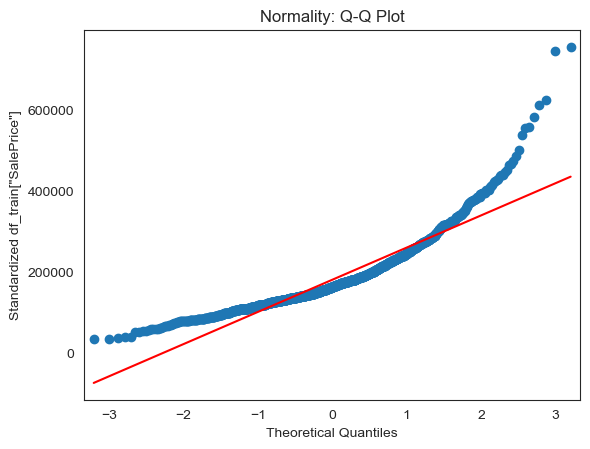

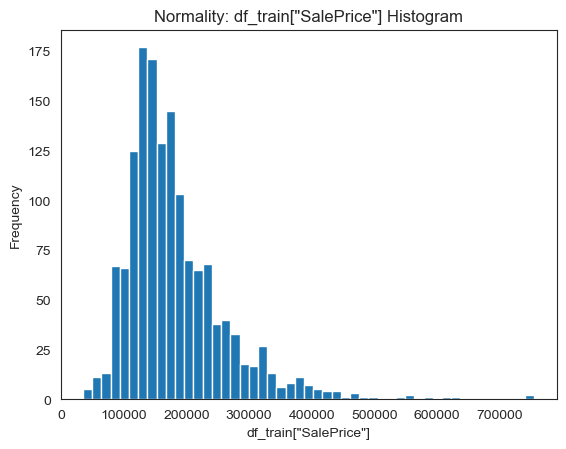

Shapiro-Wilk Test:
Test Statistic: 0.869672954082489
p-value: 3.2072044604461286e-33
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [31]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

## Transform Target Feature
### Log

In [32]:
# log(1+x) transform
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

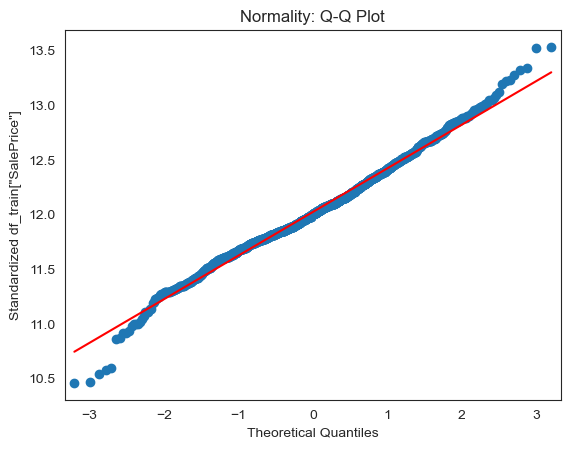

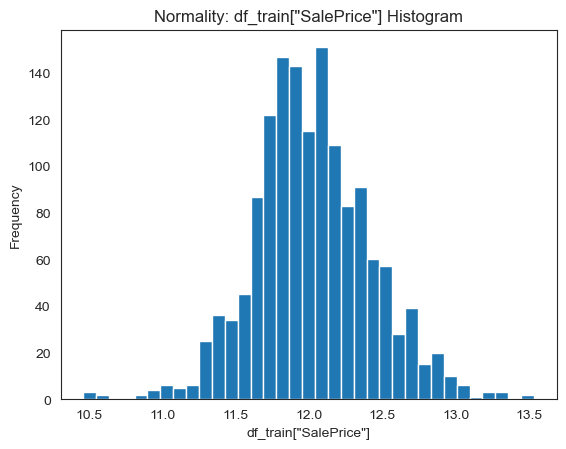

Shapiro-Wilk Test:
Test Statistic: 0.9912075400352478
p-value: 1.1504476304935451e-07
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [34]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

#### Remove Outliers

In [35]:
df_train = df_train[(df_train["SalePrice"] >= 11.0) & (df_train["SalePrice"] <= 13.0)]

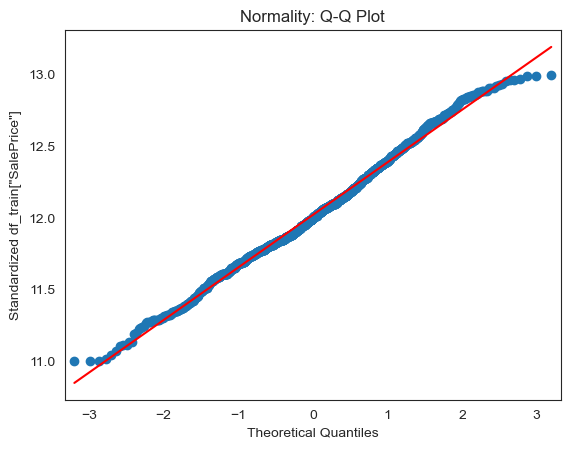

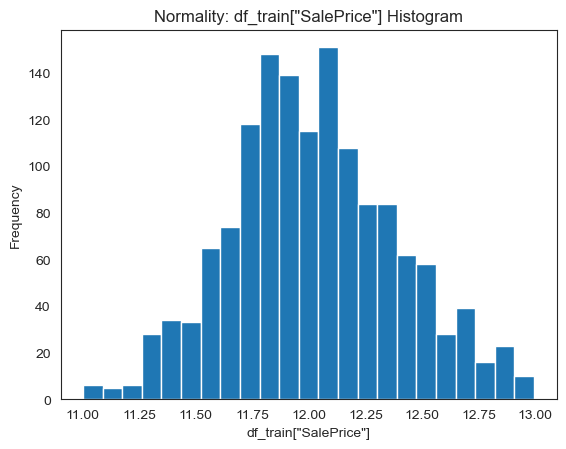

Shapiro-Wilk Test:
Test Statistic: 0.9944359660148621
p-value: 3.459872823441401e-05
The df_train["SalePrice"] do not appear to be normally distributed (reject H0)


In [36]:
sm.qqplot(df_train["SalePrice"], line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized df_train["SalePrice"]')
plt.title('Normality: Q-Q Plot')
plt.show()

plt.hist(df_train["SalePrice"], bins='auto')
plt.xlabel('df_train["SalePrice"]')
plt.ylabel('Frequency')
plt.title('Normality: df_train["SalePrice"] Histogram')
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(df_train["SalePrice"])
print('Shapiro-Wilk Test:')
print('Test Statistic:', stat)
print('p-value:', p_value)

alpha = 0.05
if p_value > alpha:
    print('The df_train["SalePrice"] appear to be normally distributed (fail to reject H0)')
else:
    print('The df_train["SalePrice"] do not appear to be normally distributed (reject H0)')

### Yeo-Johnson

In [ ]:
# # Create a PowerTransformer instance to apply the Yeo-Johnson transformation to the target feature
# transformer = PowerTransformer(method='yeo-johnson', standardize=True)  # Handle skewed on target feature

# # Fit the transformer on the target feature
# transformer.fit(df_train["SalePrice"].values.reshape(-1, 1))

# # Transform the target variable for both the training and test sets
# df_train["SalePrice_transformed"] = transformer.transform(df_train["SalePrice"].values.reshape(-1, 1))

In [ ]:
# sm.qqplot(df_train["SalePrice_transformed"], line='s')
# plt.xlabel('Theoretical Quantiles')
# plt.ylabel('Standardized df_train["SalePrice_transformed"]')
# plt.title('Normality: Q-Q Plot')
# plt.show()

# plt.hist(df_train["SalePrice_transformed"], bins='auto')
# plt.xlabel('df_train["SalePrice_transformed"]')
# plt.ylabel('Frequency')
# plt.title('Normality: df_train["SalePrice_transformed"] Histogram')
# plt.show()

# # Shapiro-Wilk test for normality
# stat, p_value = stats.shapiro(df_train["SalePrice_transformed"])
# print('Shapiro-Wilk Test:')
# print('Test Statistic:', stat)
# print('p-value:', p_value)

# alpha = 0.05
# if p_value > alpha:
#     print('The df_train["SalePrice_transformed"] appear to be normally distributed (fail to reject H0)')
# else:
#     print('The df_train["SalePrice_transformed"] do not appear to be normally distributed (reject H0)')

## Splitting Data

We split train data into train and validation sets

In [37]:
df_train_X = df_train.drop(["SalePrice"], axis=1)
df_train_y = df_train["SalePrice"]

# Split the df into training and validation sets
X_train_val, X_val, y_train_val, y_val = train_test_split(df_train_X, df_train_y, test_size=0.3, random_state=42)

In [38]:
numeric_vars = [i for i in numeric_vars if i in df_train_X.columns.tolist()]
nominal_vars = [i for i in nominal_vars if i in df_train_X.columns.tolist()]
ordinal_vars = [i for i in ordinal_vars if i in df_train_X.columns.tolist()]

# Helper Function

## Pipeline
### Fill Missing Values

In [39]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_train_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_train_val.loc[:, col] = np.where(
            X_train_val[col] != 0,
            X_train_val["GarageYrBlt"].fillna(X_train_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_train_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_train_val.loc[:, col] = X_train_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_train_val.loc[:, col] = X_train_val[col].fillna("None")

# fill missing values in ordinal features

# X_train_val[ordinal_vars] = X_train_val[ordinal_vars].fillna(0)
# X_val[ordinal_vars] = X_val[ordinal_vars].fillna(0)

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\1510324511.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [40]:
# fill missing values in numerical features
for col in numeric_vars:
    if col not in ["YearRemodAdd", "GarageYrBlt", "YrSold"]:
        median_num_features = X_val.groupby(["Neighborhood", "BldgType"])[col].median()
        X_val.loc[:, col] = X_val.apply(
            lambda row: median_num_features.loc[row["Neighborhood"], row["BldgType"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        #Fill GarageYrBlt column
        X_val.loc[:, col] = np.where(
            X_val[col] != 0,
            X_val["GarageYrBlt"].fillna(X_val["YearBuilt"]),
            0
        )

# fill missing values in nominal features
for col in nominal_vars:
    if col not in ['Alley', 'Utilities', 'PoolQC', 'MiscFeature']:
        mode_col = X_val.groupby("Neighborhood")[col].apply(lambda x: x.mode()[0])
        X_val.loc[:, col] = X_val.apply(
            lambda row: mode_col.loc[row["Neighborhood"]]
                         if pd.isnull(row[col])
                         else row[col],
            axis=1
        )
    else:
        X_val.loc[:, col] = X_val[col].fillna("None")

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\2616927637.py:13: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



### Create Pipeline Function

In [41]:
def create_pipeline(numeric_vars, nominal_vars, ordinal_vars, use_transformer=False, transformer_method='yeo-johnson',
                    use_scaler=False, scaler_method='robust', include_pca=False, pca_n_components=None,
                    model_name="linreg", model=LinearRegression()):
    """
    Create a customizable scikit-learn pipeline.

    Parameters:
    - numeric_vars (list): A list of column names for numerical variables.
    - nominal_vars (list): A list of column names for nominal variables.
    - ordinal_vars (list): A list of column names for ordinal variables.
    - use_transformer (bool): Whether to use a transformer (e.g., PowerTransformer) in the pipeline.
    - transformer_method (str): The method to use for the transformer if use_transformer is True.
    - use_scaler (bool): Whether to use a scaler (e.g., StandardScaler) in the pipeline.
    - scaler_method (str): The method to use for the scaler if use_scaler is True.
    - include_pca (bool): Whether to include PCA (Principal Component Analysis) in the pipeline.
    - pca_n_components (int): The number of components to keep in PCA if include_pca is True.
    - model (object): The machine learning model to use as the final estimator in the pipeline.
                      Default is LinearRegression().

    Returns:
    - pipeline (Pipeline): The scikit-learn pipeline.
    """

    # Nominal Features
    nom_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Replace missing values with most frequent
        ('label', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Ordinal Features
    
    ord_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0))
    ])
    
    # Num Features
    num_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),  # Replace missing values with median
#         ('boxcox', PowerTransformer(method='yeo-johnson', standardize=False)),
#         ('scaler', RobustScaler())
    ])
    
    # Define the scaler based on the specified method
    if scaler_method == 'z-score':
        scaler = StandardScaler()
    elif scaler_method == 'robust':
        scaler = RobustScaler()
    elif scaler_method == 'minmax':
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler method specified. Choose 'standard', 'robust', or 'minmax'.")

    # Define the transformer based on the specified method
    if transformer_method == 'yeo-johnson':
        transformer = PowerTransformer(method='yeo-johnson')
    elif transformer_method == 'log':
        transformer = FunctionTransformer(np.log1p)
    elif transformer_method == 'box-cox':
        transformer = PowerTransformer(method='box-cox')
    else:
        raise ValueError("Invalid transformer method specified. Choose 'yeo-johnson', 'log', or 'box-cox'.")

    # Define the PCA transformer if included
    if include_pca:
        pca = PCA(n_components=pca_n_components)
    else:
        pca = None
        
    if use_transformer:
        num_transformer.steps.insert(1, (transformer_method, transformer))
        
    if use_scaler:
        num_transformer.steps.insert(2, (scaler_method, scaler))
        
    if include_pca:
        num_transformer.steps.insert(3, ('pca', pca))
    
    # Combine the pre-processing steps into one using ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('nom', nom_transformer, nominal_vars),
        ('ord', ord_transformer, ordinal_vars),
        ('num', num_transformer, numeric_vars)
    ])

    # Define the pipeline that includes the preprocessor and the estimator
    pipe_linreg = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (model_name, model)
    ])
    
    return pipe_linreg


## Evaluation Metric
### Log Version

In [42]:
def evaluate_model_log(predictions, actual_values):
#     actual_values = np.expm1(actual_values) 
#     predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

### Original Version

In [43]:
def evaluate_model(predictions, actual_values):
    actual_values = np.expm1(actual_values) 
    predictions = np.expm1(predictions)
    
    actual_values_non_negative = np.clip(actual_values, 0, None)
    predictions_non_negative = np.clip(predictions, 0, None)
    
    mae = mean_absolute_error(actual_values, predictions)
    mse = mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    rmsle = np.sqrt(mean_squared_log_error(actual_values_non_negative, predictions_non_negative))
    mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100
    
    return mae, mse, rmse, r2, rmsle, mape

## Residual Plot

In [44]:
def check_normality(residuals):
    sm.qqplot(residuals, line='s')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')
    plt.title('Normality: Q-Q Plot')
    plt.show()

    plt.hist(residuals, bins='auto')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Normality: Residuals Histogram')
    plt.show()

    # Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(residuals)
    print('Shapiro-Wilk Test:')
    print('Test Statistic:', stat)
    print('p-value:', p_value)
    
    alpha = 0.05
    if p_value > alpha:
        print('The residuals appear to be normally distributed (fail to reject H0)')
    else:
        print('The residuals do not appear to be normally distributed (reject H0)')


def residual_plot(y_true, y_pred, r2_train=None, r2_test=None):
    residuals = y_true - y_pred
    g = sns.jointplot(x=y_pred, y=residuals, kind='resid', height=6)
    g.set_axis_labels('Predicted Values', 'Residuals')
    g.fig.suptitle('Residual Plot', y=1.02)

    if r2_train is not None and r2_test is not None:
        legend_text = ['R2 Train: {:.2f}'.format(r2_train), 'R2 Test: {:.2f}'.format(r2_test)]
        g.ax_joint.legend(legend_text, markerscale=0, handlelength=0)

    plt.show()
    
    check_normality(residuals)


## Learning Curve Plot

In [45]:
def plot_learning_curve(estimator, X, y, cv, scoring):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Build Regression Model

- Linear Regression
- Lasso Regression
- Kernel Ridge
- Elastic Net
- KNN Regressor
- SVR
- Gradient Boosting Regressor
- Extra Trees Regressor
- XGBOOST
- LightGBM
- Stacking Regressor
- Blending Regressor 
- Weight Regressor
- Voting Regressor

In [46]:
evaluation_metrics_models = []
evaluation_metrics_log_models = []

## Linear Regression Model
### With Transformer

In [47]:
#define ML models
linreg_tf = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_tf, X_train_val, y_train_val, cv=kf, scoring='r2')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 20054884290.53 +/- 17914714931.85


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [48]:
evaluation_metrics = {}

pipe_linreg_tf.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_tf_pred = pipe_linreg_tf.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_tf = pipe_linreg_tf.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_tf, mse_linreg_tf, rmse_linreg_tf, r2_linreg_tf, rmsle_linreg_tf, mape_linreg_tf = evaluate_model(linreg_tf_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_tf"
evaluation_metrics['MAE'] = f'{mae_linreg_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\958664168.py:3: RuntimeWarning:

overflow encountered in expm1



ValueError: Input contains infinity or a value too large for dtype('float64').

In [49]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_tf, mse_linreg_tf, rmse_linreg_tf, r2_linreg_tf, rmsle_linreg_tf, mape_linreg_tf = evaluate_model_log(linreg_tf_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_tf"
evaluation_metrics_log['MAE'] = f'{mae_linreg_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: linreg_tf
MAE: 62275329.297145
MSE: 875522367614555776.000000
RMSE: 935693522.268139
R2_train: 0.931809
R2: -6615016646118776832.000000
RMSLE: 1.834166
MAPE: 536121132.640180


In [50]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_tf, r2_test=r2_linreg_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

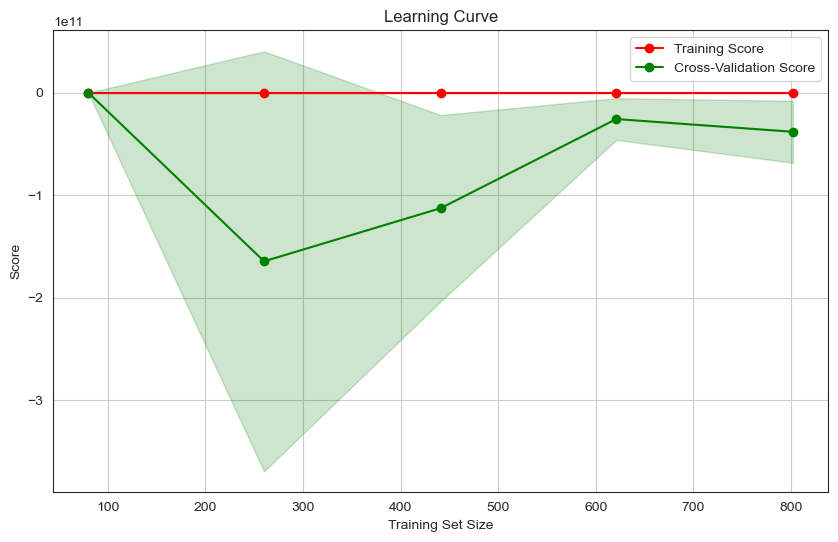

In [51]:
plot_learning_curve(pipe_linreg_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [52]:
#define ML models
linreg_ts = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts, X_train_val, y_train_val, cv=kf, scoring='r2')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 11926586783.78 +/- 15074527279.26


In [53]:
evaluation_metrics = {}

pipe_linreg_ts.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_ts_pred = pipe_linreg_ts.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts = pipe_linreg_ts.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts, mse_linreg_ts, rmse_linreg_ts, r2_linreg_ts, rmsle_linreg_ts, mape_linreg_ts = evaluate_model(linreg_ts_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts"
evaluation_metrics['MAE'] = f'{mae_linreg_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\AppData\Local\Temp\ipykernel_21024\958664168.py:3: RuntimeWarning:

overflow encountered in expm1



ValueError: Input contains infinity or a value too large for dtype('float64').

In [54]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_ts, mse_linreg_ts, rmse_linreg_ts, r2_linreg_ts, rmsle_linreg_ts, mape_linreg_ts = evaluate_model_log(linreg_ts_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_ts"
evaluation_metrics_log['MAE'] = f'{mae_linreg_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: linreg_ts
MAE: 396830310.538308
MSE: 19477594260471545856.000000
RMSE: 4413342753.568042
R2_train: 0.931810
R2: -147163128008272658432.000000
RMSLE: 2.366922
MAPE: 3411930090.077022


In [55]:
# residual_plot(y_val, predictions, r2_train=r2_train_linreg_ts, r2_test=r2_linreg_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

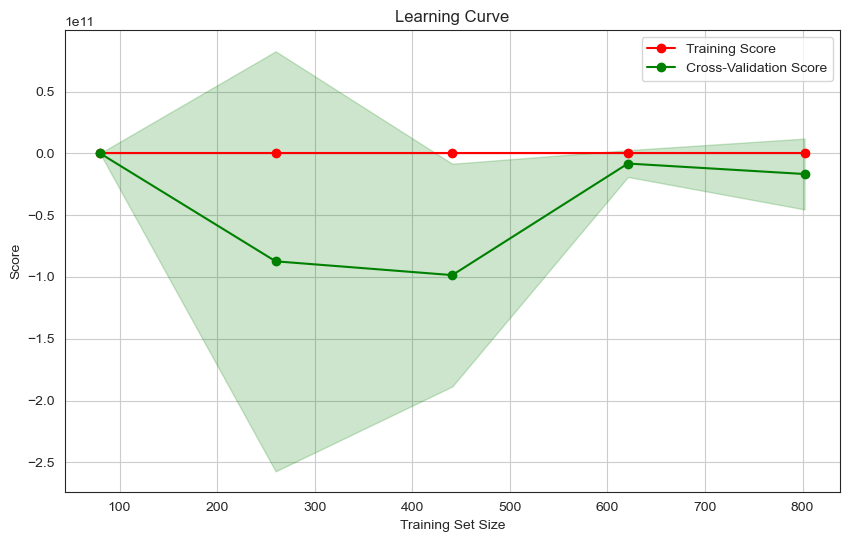

In [56]:
plot_learning_curve(pipe_linreg_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [57]:
#define ML models
linreg_ts_pca = LinearRegression(n_jobs=-1)

#define the pipeline that includes the preprocessor and the estimator
pipe_linreg_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model=LinearRegression())

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



RMSE: 0.14 +/- 0.01


In [58]:
evaluation_metrics = {}

pipe_linreg_ts_pca.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
linreg_ts_pca_pred = pipe_linreg_ts_pca.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_linreg_ts_pca = pipe_linreg_ts_pca.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_linreg_ts_pca, mse_linreg_ts_pca, rmse_linreg_ts_pca, r2_linreg_ts_pca, rmsle_linreg_ts_pca, mape_linreg_ts_pca = evaluate_model(linreg_ts_pca_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "linreg_ts_pca"
evaluation_metrics['MAE'] = f'{mae_linreg_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_linreg_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_linreg_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_linreg_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_linreg_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_linreg_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_linreg_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: linreg_ts_pca
MAE: 16495.869703
MSE: 589870998.375515
RMSE: 24287.260001
R2_train: 0.915563
R2: 0.868880
RMSLE: 0.132573
MAPE: 9.597195


In [59]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_linreg_ts_pca, mse_linreg_ts_pca, rmse_linreg_ts_pca, r2_linreg_ts_pca, rmsle_linreg_ts_pca, mape_linreg_ts_pca = evaluate_model_log(linreg_ts_pca_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "linreg_ts_pca"
evaluation_metrics_log['MAE'] = f'{mae_linreg_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_linreg_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_linreg_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_linreg_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_linreg_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_linreg_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_linreg_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: linreg_ts_pca
MAE: 0.095374
MSE: 0.017576
RMSE: 0.132573
R2_train: 0.915563
R2: 0.867207
RMSLE: 0.010267
MAPE: 0.796596


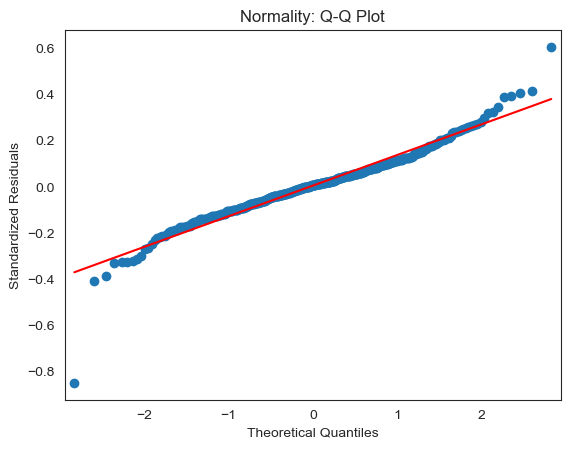

Shapiro-Wilk Test:
Test Statistic: 0.9521445631980896
p-value: 1.3436574075598173e-10
The residuals do not appear to be normally distributed (reject H0)


In [60]:
residual_plot(y_val, linreg_ts_pca_pred, r2_train=r2_train_linreg_ts_pca, r2_test=r2_linreg_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

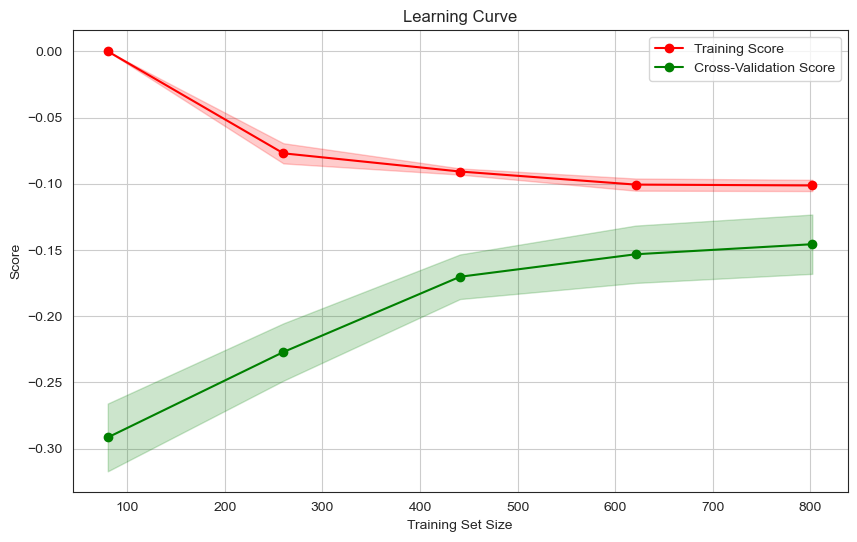

In [61]:
plot_learning_curve(pipe_linreg_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Lasso Regression
### With Transformer

In [62]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_tf = GridSearchCV(pipe_lasso_tf, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [63]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_tf = round(grid_search_lasso_tf.cv_results_["std_test_score"][grid_search_lasso_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_tf.best_params_)
print("Best score: ", grid_search_lasso_tf.best_score_, f" ({std_lasso_tf})")

# valuate model on validation data
r2_train_lasso_tf = grid_search_lasso_tf.score(X_val, y_val)

best_model_lasso_tf = grid_search_lasso_tf.best_estimator_
y_pred_val_lasso_tf = best_model_lasso_tf.predict(X_val)

# Compute the evaluation metrics
mae_lasso_tf, mse_lasso_tf, rmse_lasso_tf, r2_lasso_tf, rmsle_lasso_tf, mape_lasso_tf = evaluate_model(y_pred_val_lasso_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_tf"
evaluation_metrics['best_params_'] = grid_search_lasso_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.8763085289299084  (0.0579)
model: lasso_tf
best_params_: {'lasso__alpha': 0.001}
MAE: 13727.879111
MSE: 439747138.942382
RMSE: 20970.148758
R2_train: 0.907456
R2: 0.902250
RMSLE: 0.110673
MAPE: 8.018431


In [64]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_tf, mse_lasso_tf, rmse_lasso_tf, r2_lasso_tf, rmsle_lasso_tf, mape_lasso_tf = evaluate_model_log(y_pred_val_lasso_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_tf"
evaluation_metrics_log['best_params_'] = grid_search_lasso_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_tf
best_params_: {'lasso__alpha': 0.001}
MAE: 0.079032
MSE: 0.012249
RMSE: 0.110673
R2_train: 0.907456
R2: 0.907456
RMSLE: 0.008539
MAPE: 0.660316


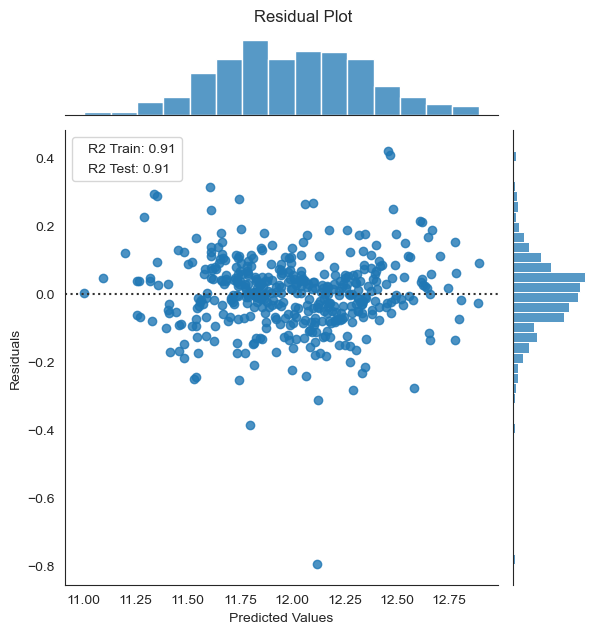

Shapiro-Wilk Test:
Test Statistic: 0.9405508041381836
p-value: 4.134843075570549e-12
The residuals do not appear to be normally distributed (reject H0)


In [65]:
residual_plot(y_val, y_pred_val_lasso_tf, r2_train=r2_train_lasso_tf, r2_test=r2_lasso_tf)

In [66]:
plot_learning_curve(pipe_lasso_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

### With Transformer + Scaler

In [67]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts = GridSearchCV(pipe_lasso_ts, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [68]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts = round(grid_search_lasso_ts.cv_results_["std_test_score"][grid_search_lasso_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts.best_params_)
print("Best score: ", grid_search_lasso_ts.best_score_, f" ({std_lasso_ts})")

# valuate model on validation data
r2_train_lasso_ts = grid_search_lasso_ts.score(X_val, y_val)

best_model_lasso_ts = grid_search_lasso_ts.best_estimator_
y_pred_val_lasso_ts = best_model_lasso_ts.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts, mse_lasso_ts, rmse_lasso_ts, r2_lasso_ts, rmsle_lasso_ts, mape_lasso_ts = evaluate_model(y_pred_val_lasso_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts"
evaluation_metrics['best_params_'] = grid_search_lasso_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.876109374646713  (0.0584)
model: lasso_ts
best_params_: {'lasso__alpha': 0.001}
MAE: 13860.472218
MSE: 444166698.023036
RMSE: 21075.262704
R2_train: 0.906458
R2: 0.901268
RMSLE: 0.111268
MAPE: 8.087384


In [69]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_ts, mse_lasso_ts, rmse_lasso_ts, r2_lasso_ts, rmsle_lasso_ts, mape_lasso_ts = evaluate_model_log(y_pred_val_lasso_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_ts"
evaluation_metrics_log['best_params_'] = grid_search_lasso_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_ts
best_params_: {'lasso__alpha': 0.001}
MAE: 0.079697
MSE: 0.012381
RMSE: 0.111268
R2_train: 0.906458
R2: 0.906458
RMSLE: 0.008585
MAPE: 0.665822


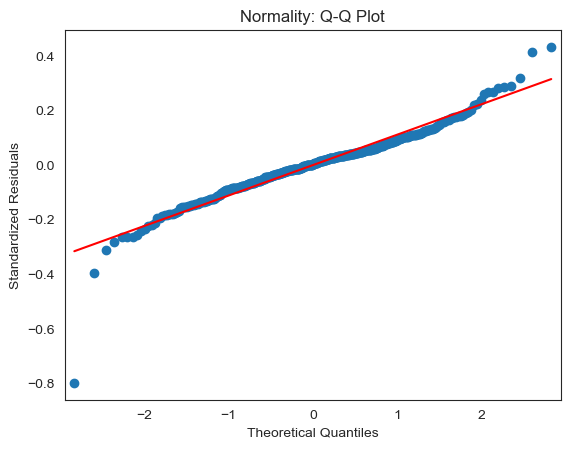

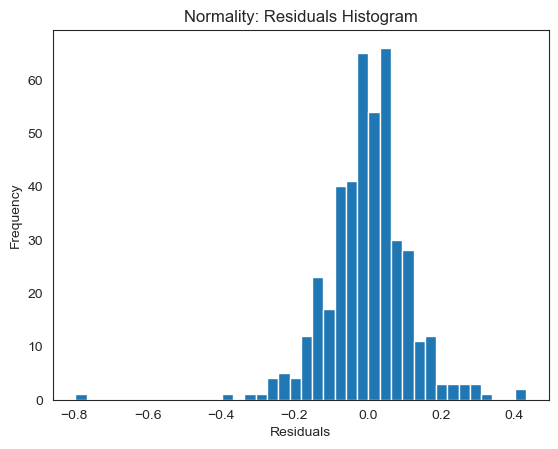

Shapiro-Wilk Test:
Test Statistic: 0.9412776827812195
p-value: 5.072756884688667e-12
The residuals do not appear to be normally distributed (reject H0)


In [70]:
residual_plot(y_val, y_pred_val_lasso_ts, r2_train=r2_train_lasso_ts, r2_test=r2_lasso_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

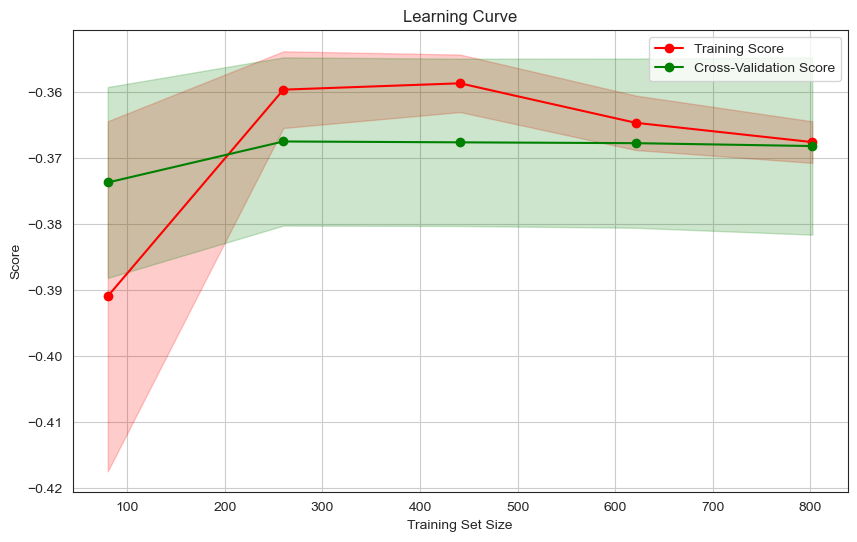

In [71]:
plot_learning_curve(pipe_lasso_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [75]:
#define ML models
lasso = Lasso(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_lasso_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lasso", model=lasso)

# Define the hyperparameters to search over
param_grid_lasso = {
        'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    }

# Perform grid search with 5-fold cross-validation
grid_search_lasso_ts_pca = GridSearchCV(pipe_lasso_ts_pca, param_grid_lasso, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_lasso_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'GrLivArea',
                                                                          'GarageYrBlt',
                                                                          'GarageArea',
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('lasso', Lasso(tol=0.01))]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='r2', verbose=1)

In [76]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lasso_ts_pca = round(grid_search_lasso_ts_pca.cv_results_["std_test_score"][grid_search_lasso_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_lasso_ts_pca.best_params_)
print("Best score: ", grid_search_lasso_ts_pca.best_score_, f" ({std_lasso_ts_pca})")

# valuate model on validation data
r2_train_lasso_ts_pca = grid_search_lasso_ts_pca.score(X_val, y_val)

best_model_lasso_ts_pca = grid_search_lasso_ts_pca.best_estimator_
y_pred_val_lasso_ts_pca = best_model_lasso_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lasso_ts_pca, mse_lasso_ts_pca, rmse_lasso_ts_pca, r2_lasso_ts_pca, rmsle_lasso_ts_pca, mape_lasso_ts_pca = evaluate_model(y_pred_val_lasso_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lasso_ts_pca"
evaluation_metrics['best_params_'] = grid_search_lasso_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lasso_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lasso_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lasso_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lasso_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lasso_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lasso_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lasso_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lasso__alpha': 0.001}
Best score:  0.8650039850108691  (0.0502)
model: lasso_ts_pca
best_params_: {'lasso__alpha': 0.001}
MAE: 15432.840192
MSE: 540447864.981892
RMSE: 23247.534600
R2_train: 0.888485
R2: 0.879866
RMSLE: 0.121488
MAPE: 8.915521


In [77]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lasso_ts_pca, mse_lasso_ts_pca, rmse_lasso_ts_pca, r2_lasso_ts_pca, rmsle_lasso_ts_pca, mape_lasso_ts_pca = evaluate_model_log(y_pred_val_lasso_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lasso_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_lasso_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lasso_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lasso_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lasso_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lasso_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lasso_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lasso_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lasso_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lasso_ts_pca
best_params_: {'lasso__alpha': 0.001}
MAE: 0.088062
MSE: 0.014759
RMSE: 0.121488
R2_train: 0.888485
R2: 0.888485
RMSLE: 0.009370
MAPE: 0.735230


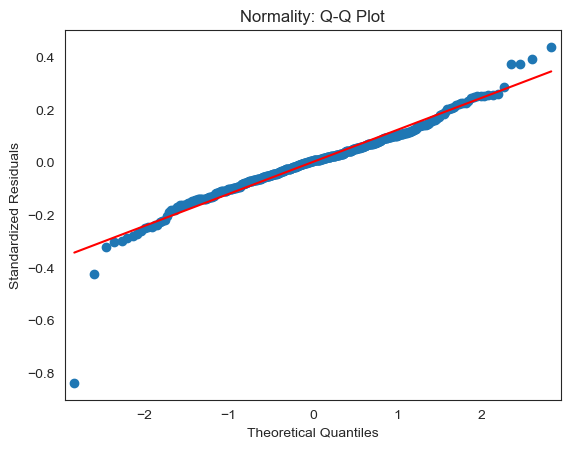

Shapiro-Wilk Test:
Test Statistic: 0.951427698135376
p-value: 1.0673538441974273e-10
The residuals do not appear to be normally distributed (reject H0)


In [78]:
residual_plot(y_val, y_pred_val_lasso_ts_pca, r2_train=r2_train_lasso_ts_pca, r2_test=r2_lasso_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

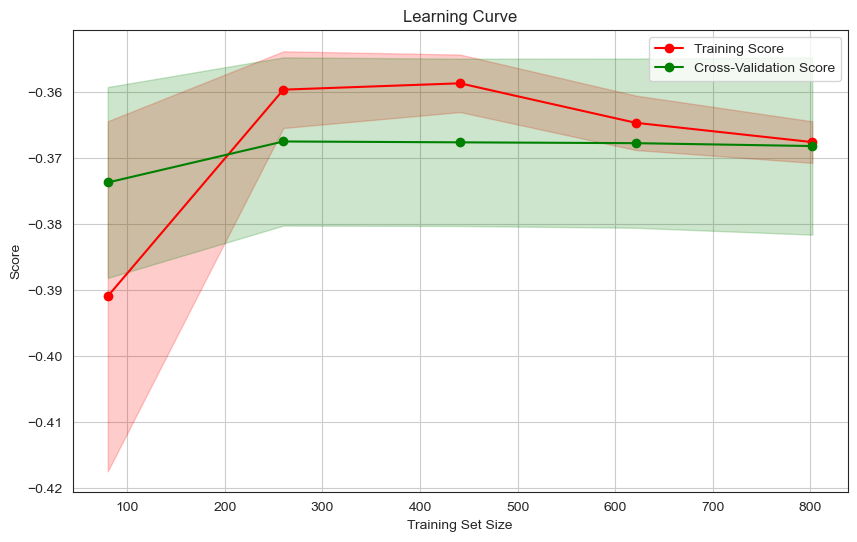

In [79]:
plot_learning_curve(pipe_lasso_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Ridge Regression
### With Transformer

In [80]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_tf = GridSearchCV(pipe_krr_tf, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [81]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_tf = round(grid_search_krr_tf.cv_results_["std_test_score"][grid_search_krr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_tf.best_params_)
print("Best score: ", grid_search_krr_tf.best_score_, f" ({std_krr_tf})")

# valuate model on validation data
r2_train_krr_tf = grid_search_krr_tf.score(X_val, y_val)

best_model_krr_tf = grid_search_krr_tf.best_estimator_
y_pred_val_krr_tf = best_model_krr_tf.predict(X_val)

# Compute the evaluation metrics
mae_krr_tf, mse_krr_tf, rmse_krr_tf, r2_krr_tf, rmsle_krr_tf, mape_krr_tf = evaluate_model(y_pred_val_krr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_tf"
evaluation_metrics['best_params_'] = grid_search_krr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8548482683550569  (0.0578)
model: krr_tf
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 15233.078584
MSE: 529475517.767123
RMSE: 23010.335021
R2_train: 0.881236
R2: 0.882305
RMSLE: 0.125375
MAPE: 8.992524


In [82]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_tf, mse_krr_tf, rmse_krr_tf, r2_krr_tf, rmsle_krr_tf, mape_krr_tf = evaluate_model_log(y_pred_val_krr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_tf"
evaluation_metrics_log['best_params_'] = grid_search_krr_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_tf
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.089297
MSE: 0.015719
RMSE: 0.125375
R2_train: 0.881236
R2: 0.881236
RMSLE: 0.009704
MAPE: 0.746781


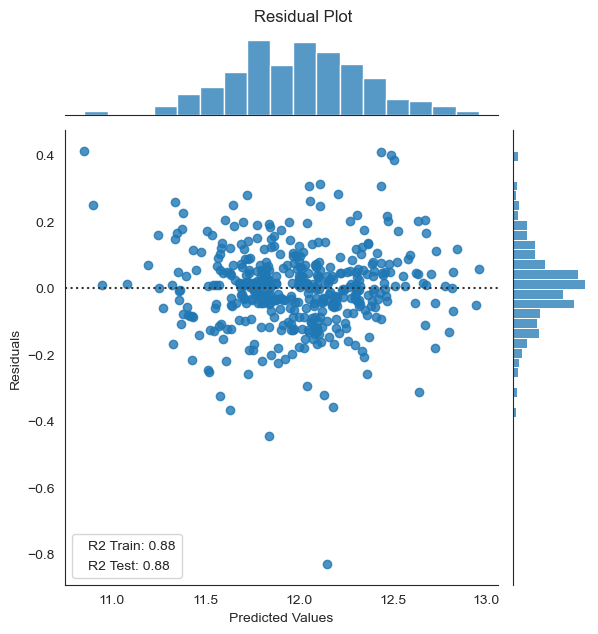

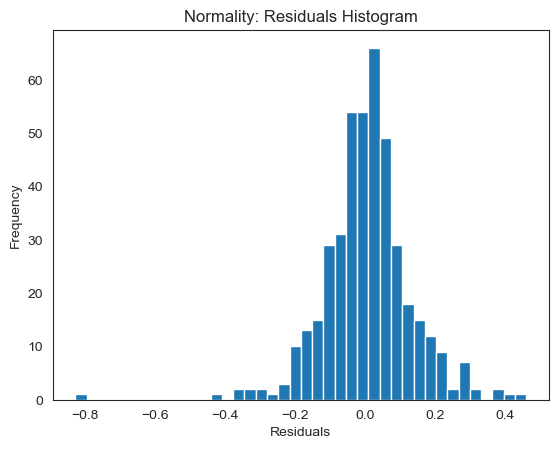

Shapiro-Wilk Test:
Test Statistic: 0.9487808346748352
p-value: 4.646886694881225e-11
The residuals do not appear to be normally distributed (reject H0)


In [83]:
residual_plot(y_val, y_pred_val_krr_tf, r2_train=r2_train_krr_tf, r2_test=r2_krr_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

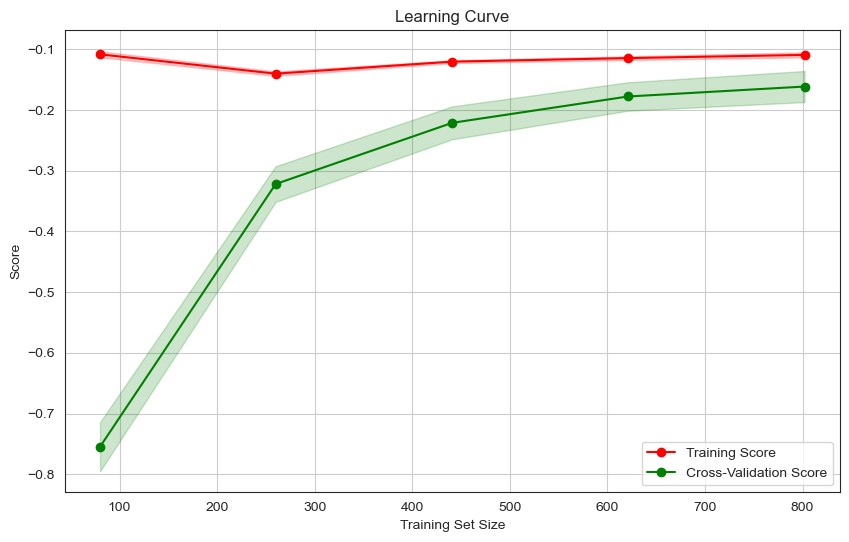

In [84]:
plot_learning_curve(pipe_krr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [85]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts = GridSearchCV(pipe_krr_ts, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [86]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts = round(grid_search_krr_ts.cv_results_["std_test_score"][grid_search_krr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts.best_params_)
print("Best score: ", grid_search_krr_ts.best_score_, f" ({std_krr_ts})")

# valuate model on validation data
r2_train_krr_ts = grid_search_krr_ts.score(X_val, y_val)

best_model_krr_ts = grid_search_krr_ts.best_estimator_
y_pred_val_krr_ts = best_model_krr_ts.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts, mse_krr_ts, rmse_krr_ts, r2_krr_ts, rmsle_krr_ts, mape_krr_ts = evaluate_model(y_pred_val_krr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts"
evaluation_metrics['best_params_'] = grid_search_krr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8536021911665189  (0.0591)
model: krr_ts
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 15298.736840
MSE: 535919528.068328
RMSE: 23149.935811
R2_train: 0.880450
R2: 0.880873
RMSLE: 0.125789
MAPE: 9.011885


In [87]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_ts, mse_krr_ts, rmse_krr_ts, r2_krr_ts, rmsle_krr_ts, mape_krr_ts = evaluate_model_log(y_pred_val_krr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_ts"
evaluation_metrics_log['best_params_'] = grid_search_krr_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_ts
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.089539
MSE: 0.015823
RMSE: 0.125789
R2_train: 0.880450
R2: 0.880450
RMSLE: 0.009734
MAPE: 0.748659


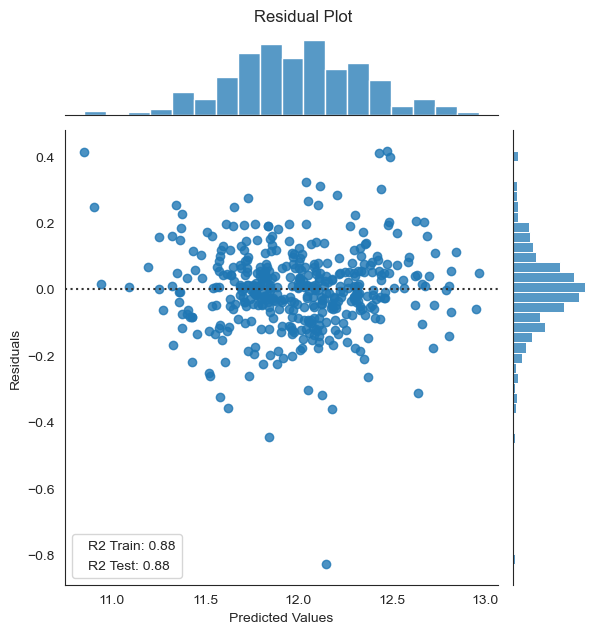

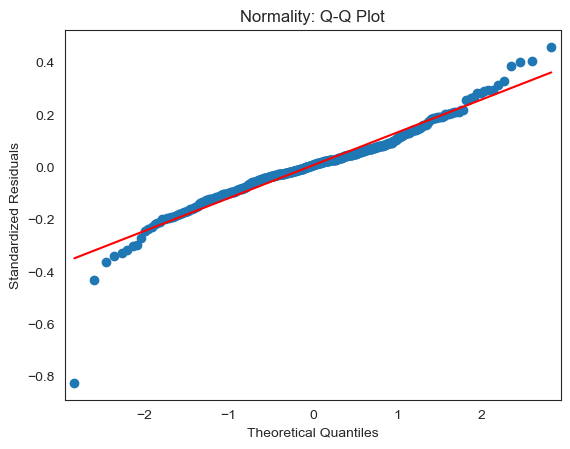

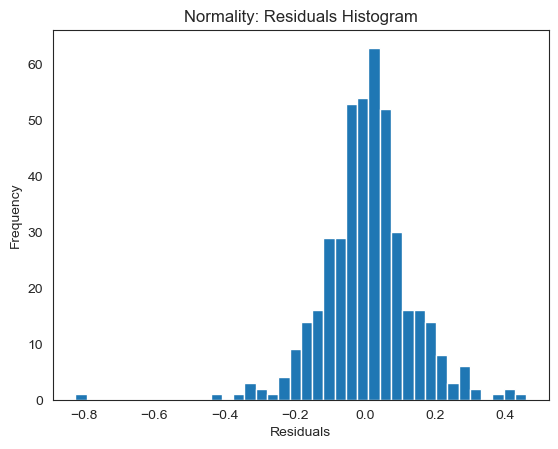

Shapiro-Wilk Test:
Test Statistic: 0.9491725564002991
p-value: 5.246145184933937e-11
The residuals do not appear to be normally distributed (reject H0)


In [88]:
residual_plot(y_val, y_pred_val_krr_ts, r2_train=r2_train_krr_ts, r2_test=r2_krr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

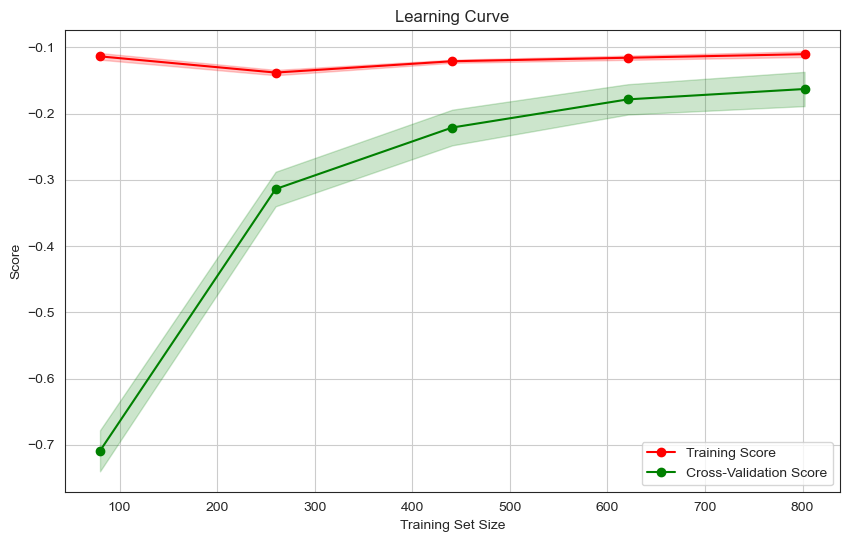

In [89]:
plot_learning_curve(pipe_krr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [90]:
#define ML models
krr = KernelRidge()

#define the pipeline that includes the preprocessor and the estimator
pipe_krr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="krr", model=krr)

# Define the hyperparameters to search over
param_grid_krr = {
        'krr__alpha': [0.1, 1, 10, 100],
        'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'krr__degree': [1, 2, 3, 4],
        'krr__gamma': [0.1, 1, 10, 100]
    }

# Perform grid search with 5-fold cross-validation
grid_search_krr_ts_pca = GridSearchCV(pipe_krr_ts_pca, param_grid_krr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_krr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('krr', KernelRidge())]),
             n_jobs=-1,
             param_grid={'krr__alpha': [0.1, 1, 10, 100],
                         'krr__degree': [1, 2, 3, 4],
                         'krr__gamma': [0.1, 1, 10, 100],
                         'krr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2', verbose=1)

In [91]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_krr_ts_pca = round(grid_search_krr_ts_pca.cv_results_["std_test_score"][grid_search_krr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_krr_ts_pca.best_params_)
print("Best score: ", grid_search_krr_ts_pca.best_score_, f" ({std_krr_ts_pca})")

# valuate model on validation data
r2_train_krr_ts_pca = grid_search_krr_ts_pca.score(X_val, y_val)

best_model_krr_ts_pca = grid_search_krr_ts_pca.best_estimator_
y_pred_val_krr_ts_pca = best_model_krr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_krr_ts_pca, mse_krr_ts_pca, rmse_krr_ts_pca, r2_krr_ts_pca, rmsle_krr_ts_pca, mape_krr_ts_pca = evaluate_model(y_pred_val_krr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "krr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_krr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_krr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_krr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_krr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_krr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_krr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_krr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_krr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
Best score:  0.8423009900640339  (0.0498)
model: krr_ts_pca
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 16805.843808
MSE: 611500893.250334
RMSE: 24728.544099
R2_train: 0.868734
R2: 0.864072
RMSLE: 0.131809
MAPE: 9.735626


In [92]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_krr_ts_pca, mse_krr_ts_pca, rmse_krr_ts_pca, r2_krr_ts_pca, rmsle_krr_ts_pca, mape_krr_ts_pca = evaluate_model_log(y_pred_val_krr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "krr_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_krr_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_krr_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_krr_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_krr_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_krr_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_krr_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_krr_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_krr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: krr_ts_pca
best_params_: {'krr__alpha': 0.1, 'krr__degree': 1, 'krr__gamma': 0.1, 'krr__kernel': 'poly'}
MAE: 0.096892
MSE: 0.017374
RMSE: 0.131809
R2_train: 0.868734
R2: 0.868734
RMSLE: 0.010184
MAPE: 0.809104


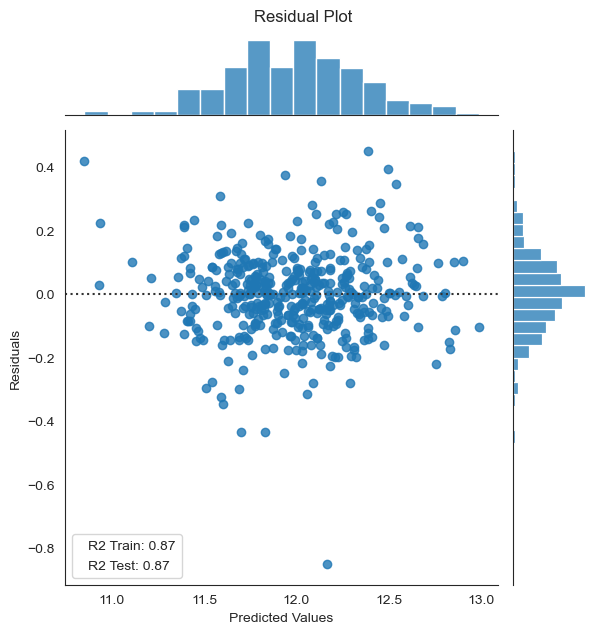

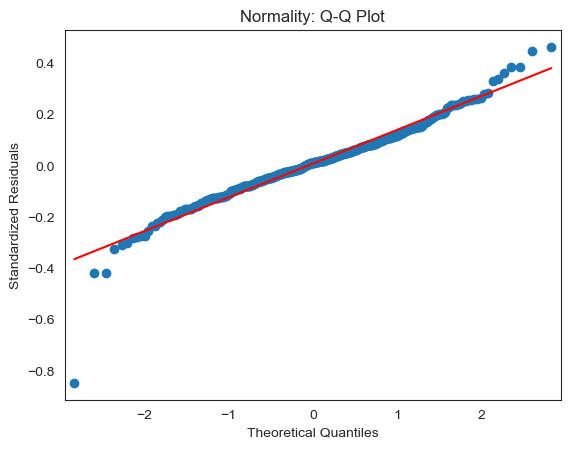

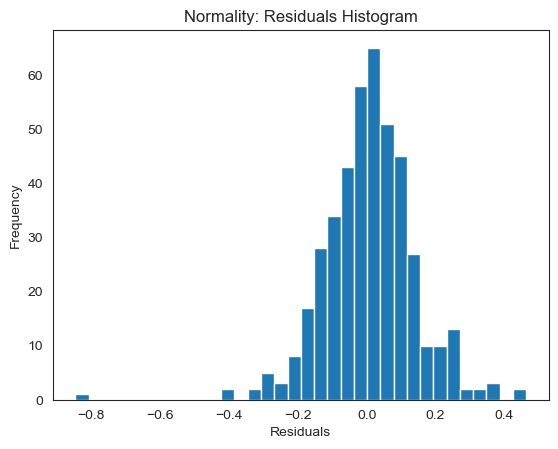

Shapiro-Wilk Test:
Test Statistic: 0.9603620171546936
p-value: 2.232275697622299e-09
The residuals do not appear to be normally distributed (reject H0)


In [93]:
residual_plot(y_val, y_pred_val_krr_ts_pca, r2_train=r2_train_krr_ts_pca, r2_test=r2_krr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

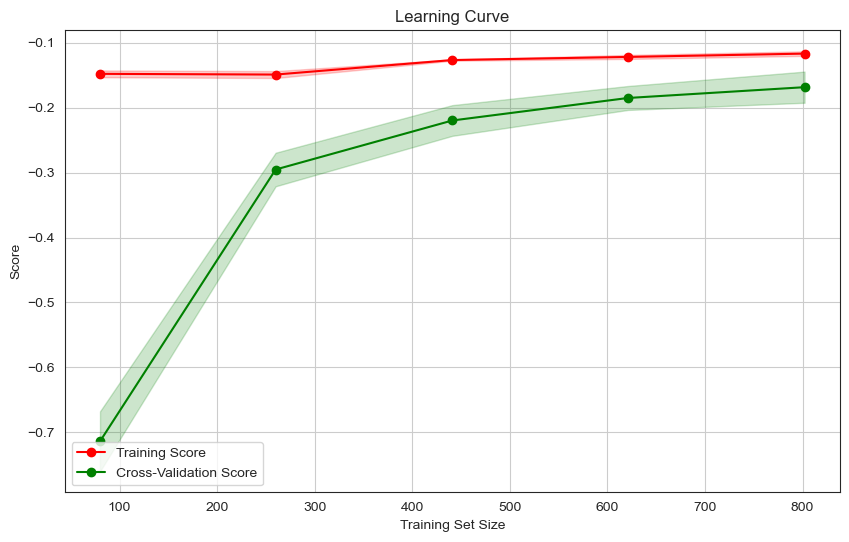

In [94]:
plot_learning_curve(pipe_krr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Elastic Net
### With Transformer

In [95]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_tf = GridSearchCV(pipe_enet_tf, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [96]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_tf = round(grid_search_enet_tf.cv_results_["std_test_score"][grid_search_enet_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_tf.best_params_)
print("Best score: ", grid_search_enet_tf.best_score_, f" ({std_enet_tf})")

# valuate model on validation data
r2_train_enet_tf = grid_search_enet_tf.score(X_val, y_val)

best_model_enet_tf = grid_search_enet_tf.best_estimator_
y_pred_val_enet_tf = best_model_enet_tf.predict(X_val)

# Compute the evaluation metrics
mae_enet_tf, mse_enet_tf, rmse_enet_tf, r2_enet_tf, rmsle_enet_tf, mape_enet_tf = evaluate_model(y_pred_val_enet_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_tf"
evaluation_metrics['best_params_'] = grid_search_enet_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
Best score:  0.8764078409223884  (0.0577)
model: enet_tf
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
MAE: 13701.440997
MSE: 438618879.197687
RMSE: 20943.229913
R2_train: 0.907622
R2: 0.902501
RMSLE: 0.110574
MAPE: 8.004202


In [97]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_tf, mse_enet_tf, rmse_enet_tf, r2_enet_tf, rmsle_enet_tf, mape_enet_tf = evaluate_model_log(y_pred_val_enet_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_tf"
evaluation_metrics_log['best_params_'] = grid_search_enet_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_tf
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
MAE: 0.078905
MSE: 0.012227
RMSE: 0.110574
R2_train: 0.907622
R2: 0.907622
RMSLE: 0.008532
MAPE: 0.659267


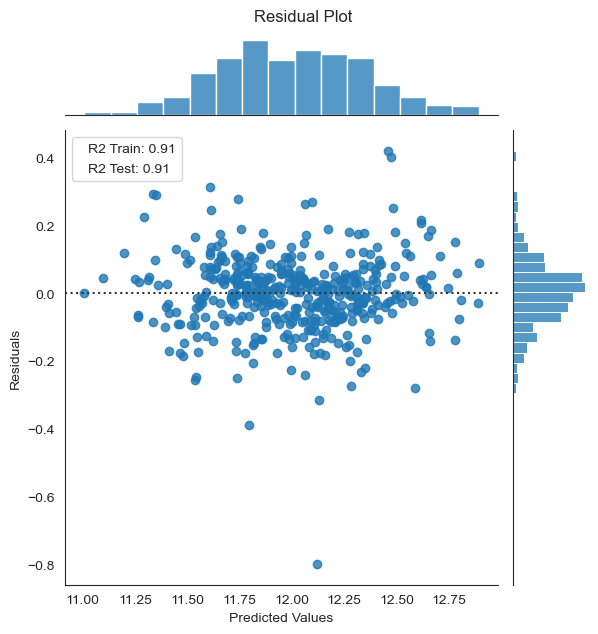

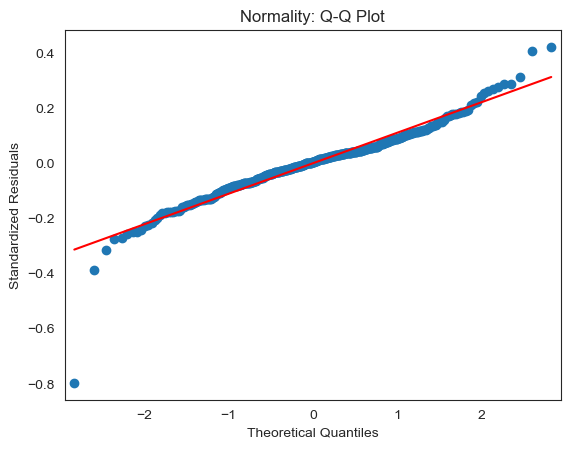

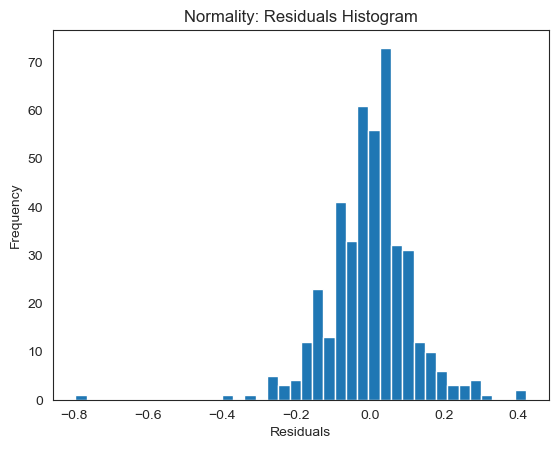

Shapiro-Wilk Test:
Test Statistic: 0.9403669834136963
p-value: 3.927518466700919e-12
The residuals do not appear to be normally distributed (reject H0)


In [98]:
residual_plot(y_val, y_pred_val_enet_tf, r2_train=r2_train_enet_tf, r2_test=r2_enet_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

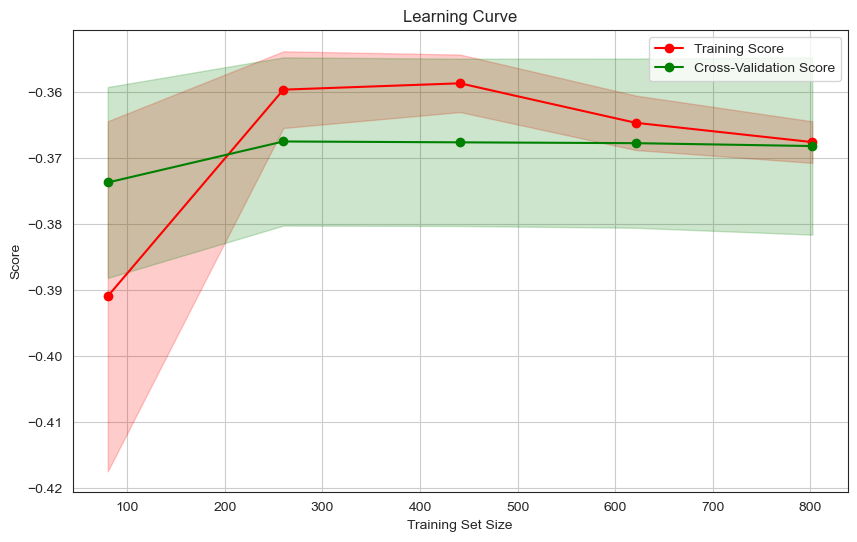

In [99]:
plot_learning_curve(pipe_enet_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [100]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts = GridSearchCV(pipe_enet_ts, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [101]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts = round(grid_search_enet_ts.cv_results_["std_test_score"][grid_search_enet_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts.best_params_)
print("Best score: ", grid_search_enet_ts.best_score_, f" ({std_enet_ts})")

# valuate model on validation data
r2_train_enet_ts = grid_search_enet_ts.score(X_val, y_val)

best_model_enet_ts = grid_search_enet_ts.best_estimator_
y_pred_val_enet_ts = best_model_enet_ts.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts, mse_enet_ts, rmse_enet_ts, r2_enet_ts, rmsle_enet_ts, mape_enet_ts = evaluate_model(y_pred_val_enet_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts"
evaluation_metrics['best_params_'] = grid_search_enet_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
Best score:  0.8761994177601957  (0.0583)
model: enet_ts
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
MAE: 13815.074762
MSE: 442010807.141375
RMSE: 21024.053062
R2_train: 0.906826
R2: 0.901747
RMSLE: 0.111049
MAPE: 8.063092


In [102]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_ts, mse_enet_ts, rmse_enet_ts, r2_enet_ts, rmsle_enet_ts, mape_enet_ts = evaluate_model_log(y_pred_val_enet_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_ts"
evaluation_metrics_log['best_params_'] = grid_search_enet_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_ts
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.9}
MAE: 0.079470
MSE: 0.012332
RMSE: 0.111049
R2_train: 0.906826
R2: 0.906826
RMSLE: 0.008569
MAPE: 0.663942


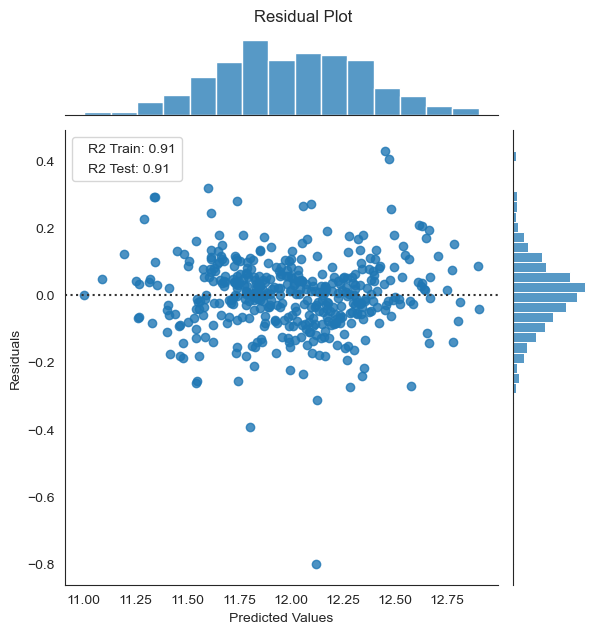

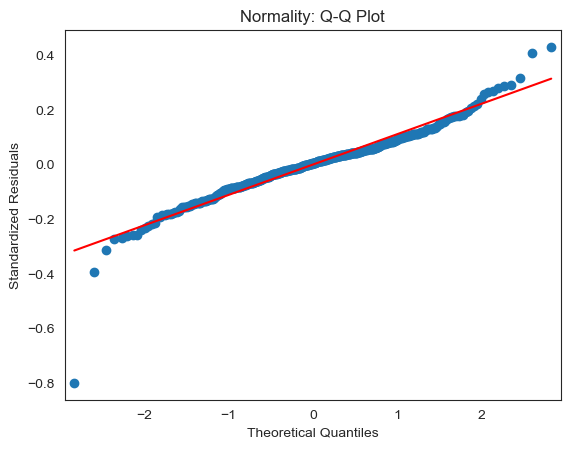

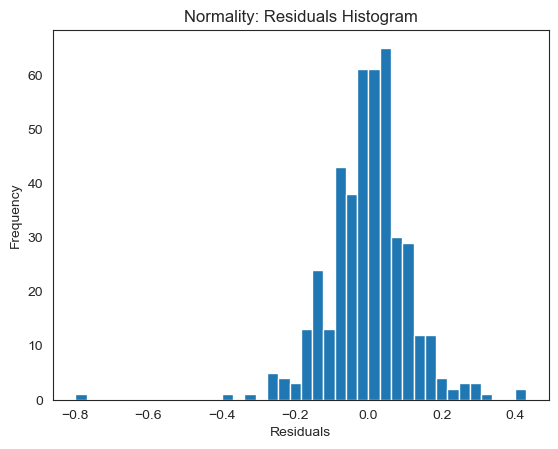

Shapiro-Wilk Test:
Test Statistic: 0.9409358501434326
p-value: 4.60677850033786e-12
The residuals do not appear to be normally distributed (reject H0)


In [103]:
residual_plot(y_val, y_pred_val_enet_ts, r2_train=r2_train_enet_ts, r2_test=r2_enet_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

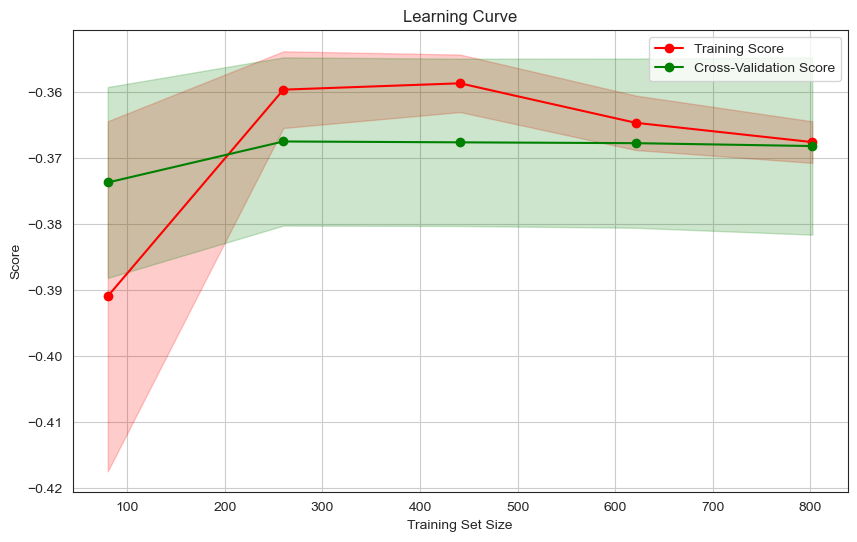

In [104]:
plot_learning_curve(pipe_enet_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [105]:
#define ML models
enet = ElasticNet(tol=0.01)

#define the pipeline that includes the preprocessor and the estimator
pipe_enet_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="enet", model=enet)

# Define the hyperparameters to search over
param_grid_enet = {'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                  'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]}

# Perform grid search with 5-fold cross-validation
grid_search_enet_ts_pca = GridSearchCV(pipe_enet_ts_pca, param_grid_enet, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_enet_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'WoodDeckSF',
                                                                          'OpenPorchSF',
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('enet', ElasticNet(tol=0.01))]),
             n_jobs=-1,
             param_grid={'enet__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'enet__l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.99]},
             scoring='r2', verbose=1)

In [106]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_enet_ts_pca = round(grid_search_enet_ts_pca.cv_results_["std_test_score"][grid_search_enet_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_enet_ts_pca.best_params_)
print("Best score: ", grid_search_enet_ts_pca.best_score_, f" ({std_enet_ts_pca})")

# valuate model on validation data
r2_train_enet_ts_pca = grid_search_enet_ts_pca.score(X_val, y_val)

best_model_enet_ts_pca = grid_search_enet_ts_pca.best_estimator_
y_pred_val_enet_ts_pca = best_model_enet_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_enet_ts_pca, mse_enet_ts_pca, rmse_enet_ts_pca, r2_enet_ts_pca, rmsle_enet_ts_pca, mape_enet_ts_pca = evaluate_model(y_pred_val_enet_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "enet_ts_pca"
evaluation_metrics['best_params_'] = grid_search_enet_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_enet_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_enet_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_enet_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_enet_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_enet_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_enet_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_enet_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'enet__alpha': 0.001, 'enet__l1_ratio': 0.5}
Best score:  0.8654598160994844  (0.0502)
model: enet_ts_pca
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.5}
MAE: 15394.908496
MSE: 533519545.394272
RMSE: 23098.042025
R2_train: 0.889526
R2: 0.881406
RMSLE: 0.120920
MAPE: 8.858416


In [107]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_enet_ts_pca, mse_enet_ts_pca, rmse_enet_ts_pca, r2_enet_ts_pca, rmsle_enet_ts_pca, mape_enet_ts_pca = evaluate_model_log(y_pred_val_enet_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "enet_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_enet_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_enet_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_enet_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_enet_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_enet_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_enet_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_enet_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_enet_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: enet_ts_pca
best_params_: {'enet__alpha': 0.001, 'enet__l1_ratio': 0.5}
MAE: 0.087614
MSE: 0.014622
RMSE: 0.120920
R2_train: 0.889526
R2: 0.889526
RMSLE: 0.009325
MAPE: 0.731122


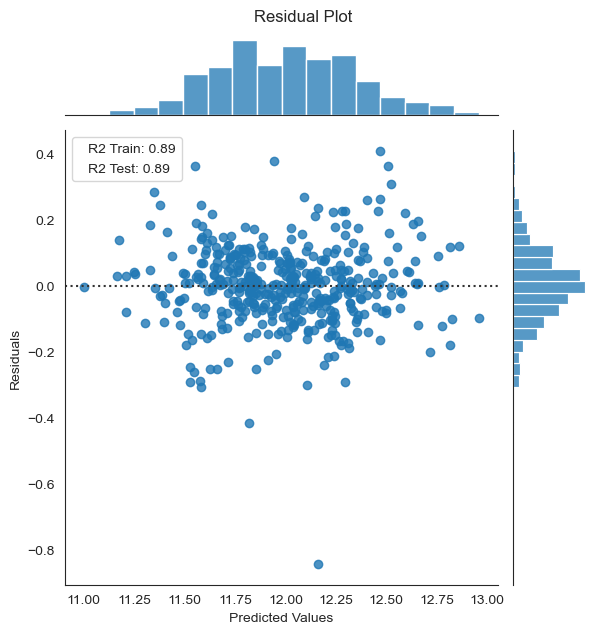

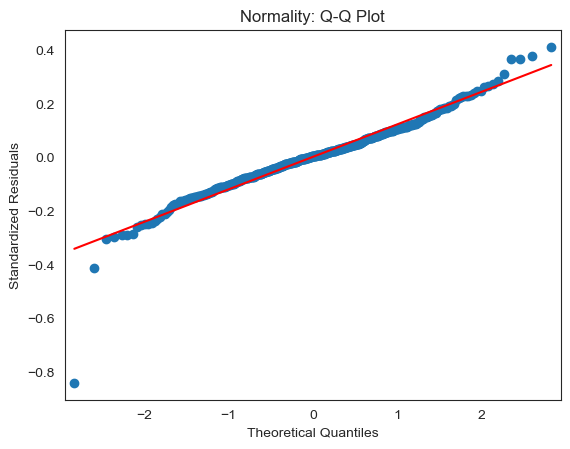

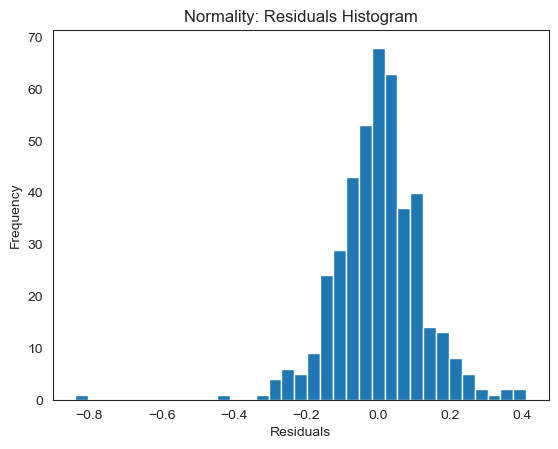

Shapiro-Wilk Test:
Test Statistic: 0.9524666666984558
p-value: 1.4911363810377054e-10
The residuals do not appear to be normally distributed (reject H0)


In [108]:
residual_plot(y_val, y_pred_val_enet_ts_pca, r2_train=r2_train_enet_ts_pca, r2_test=r2_enet_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

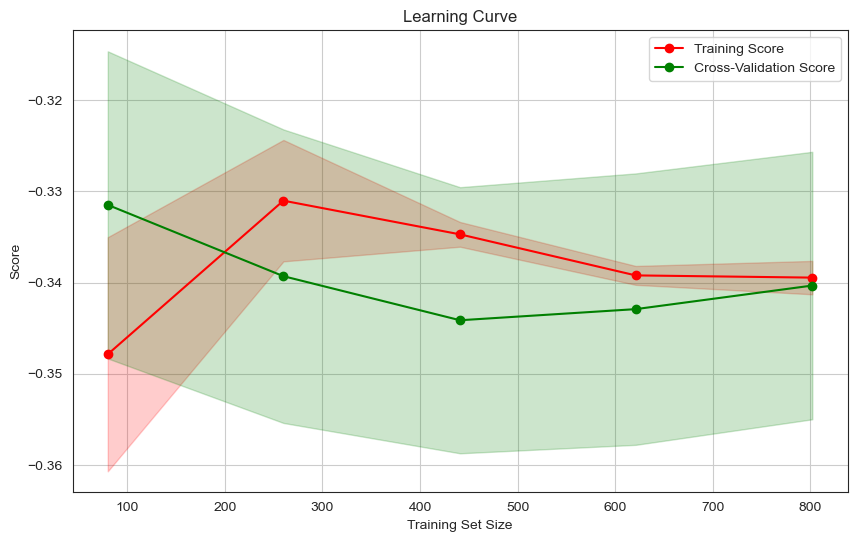

In [109]:
plot_learning_curve(pipe_enet_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Gradient Boosting Regressor
### With Transformer

In [114]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_tf = RandomizedSearchCV(estimator=pipe_gb_tf, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 24.4 s
Wall time: 12min 14s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [115]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_tf = round(random_search_gb_tf.cv_results_["std_test_score"][random_search_gb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_tf.best_params_)
print("Best score: ", random_search_gb_tf.best_score_, f" ({std_gb_tf})")

# valuate model on validation data
r2_train_gb_tf = random_search_gb_tf.score(X_val, y_val)

best_model_gb_tf = random_search_gb_tf.best_estimator_
y_pred_val_gb_tf = best_model_gb_tf.predict(X_val)

# Compute the evaluation metrics
mae_gb_tf, mse_gb_tf, rmse_gb_tf, r2_gb_tf, rmsle_gb_tf, mape_gb_tf = evaluate_model(y_pred_val_gb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_tf"
evaluation_metrics['best_params_'] = random_search_gb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
Best score:  0.8912473724045225  (0.0259)
model: gb_tf
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 14217.617840
MSE: 500606643.837471
RMSE: 22374.240632
R2_train: 0.895584
R2: 0.888722
RMSLE: 0.117558
MAPE: 8.382564


In [116]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_tf, mse_gb_tf, rmse_gb_tf, r2_gb_tf, rmsle_gb_tf, mape_gb_tf = evaluate_model_log(y_pred_val_gb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_tf"
evaluation_metrics_log['best_params_'] = random_search_gb_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_tf
best_params_: {'gb__subsample': 0.7, 'gb__n_estimators': 500, 'gb__min_samples_split': 2, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 0.082490
MSE: 0.013820
RMSE: 0.117558
R2_train: 0.895584
R2: 0.895584
RMSLE: 0.009069
MAPE: 0.689855


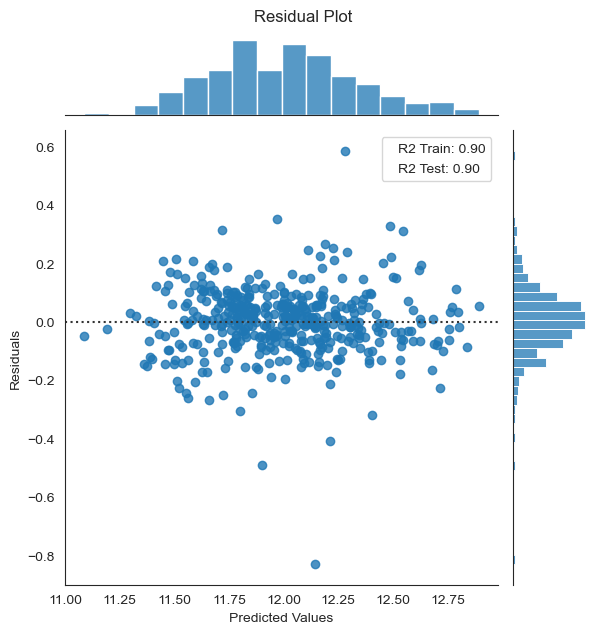

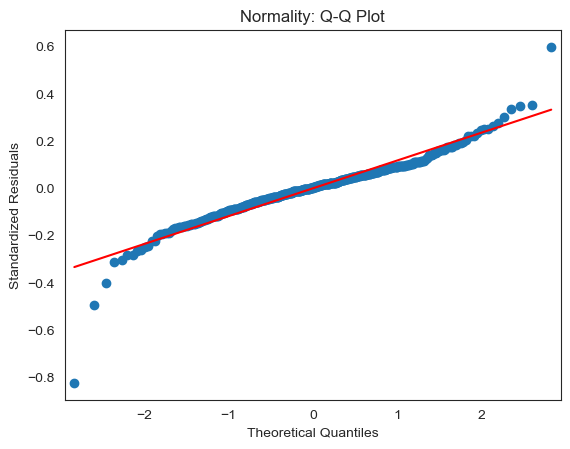

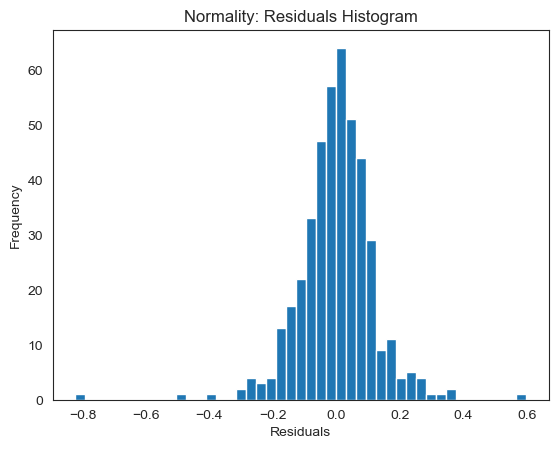

Shapiro-Wilk Test:
Test Statistic: 0.9288157820701599
p-value: 1.8799888132792902e-13
The residuals do not appear to be normally distributed (reject H0)


In [117]:
residual_plot(y_val, y_pred_val_gb_tf, r2_train=r2_train_gb_tf, r2_test=r2_gb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

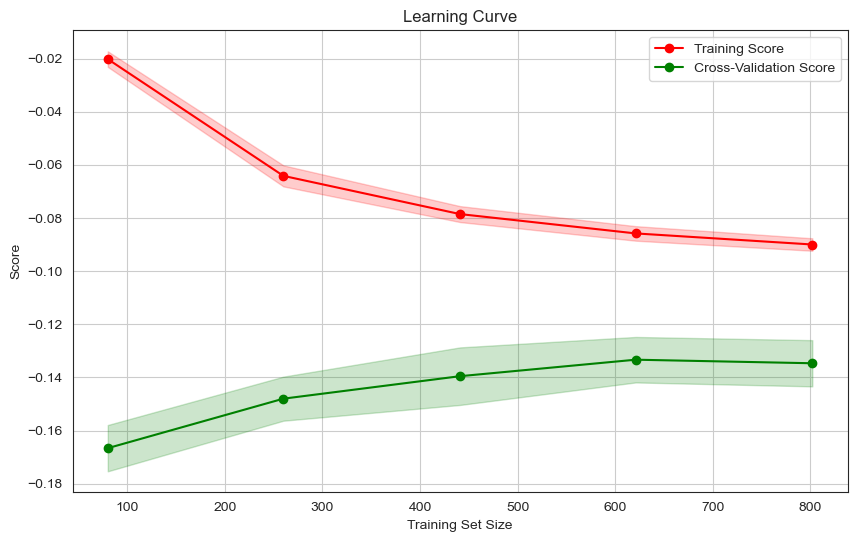

In [118]:
plot_learning_curve(pipe_gb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [119]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts = RandomizedSearchCV(estimator=pipe_gb_ts, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 26.3 s
Wall time: 11min 42s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [120]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts = round(random_search_gb_ts.cv_results_["std_test_score"][random_search_gb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts.best_params_)
print("Best score: ", random_search_gb_ts.best_score_, f" ({std_gb_ts})")

# valuate model on validation data
r2_train_gb_ts = random_search_gb_ts.score(X_val, y_val)

best_model_gb_ts = random_search_gb_ts.best_estimator_
y_pred_val_gb_ts = best_model_gb_ts.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts, mse_gb_ts, rmse_gb_ts, r2_gb_ts, rmsle_gb_ts, mape_gb_ts = evaluate_model(y_pred_val_gb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts"
evaluation_metrics['best_params_'] = random_search_gb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
Best score:  0.8919549140893042  (0.0218)
model: gb_ts
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 13677.415378
MSE: 454331893.287221
RMSE: 21315.062592
R2_train: 0.900214
R2: 0.899008
RMSLE: 0.114922
MAPE: 8.213744


In [121]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_ts, mse_gb_ts, rmse_gb_ts, r2_gb_ts, rmsle_gb_ts, mape_gb_ts = evaluate_model_log(y_pred_val_gb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_ts"
evaluation_metrics_log['best_params_'] = random_search_gb_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_ts
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 10, 'gb__min_samples_leaf': 1, 'gb__max_depth': 5, 'gb__loss': 'huber', 'gb__learning_rate': 0.05}
MAE: 0.080662
MSE: 0.013207
RMSE: 0.114922
R2_train: 0.900214
R2: 0.900214
RMSLE: 0.008891
MAPE: 0.675723


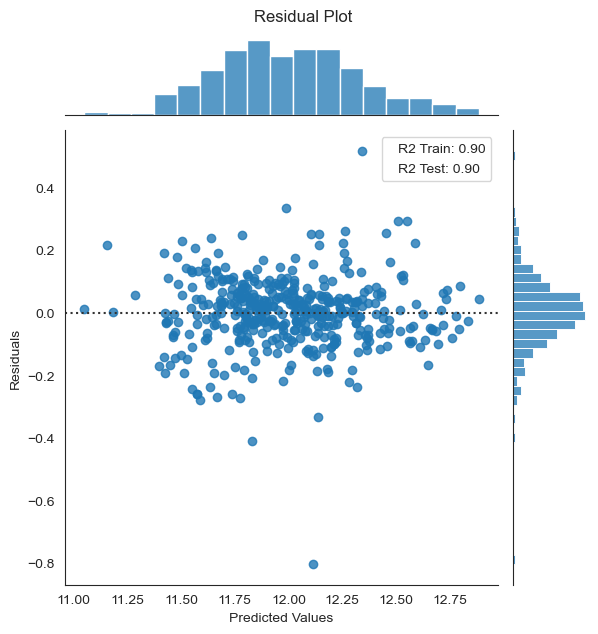

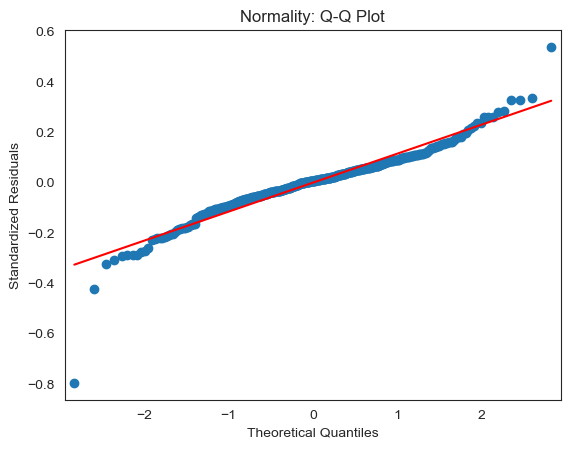

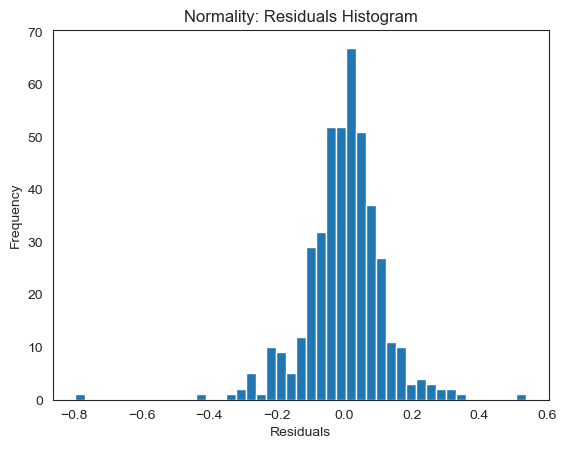

Shapiro-Wilk Test:
Test Statistic: 0.9346907734870911
p-value: 8.429760795652941e-13
The residuals do not appear to be normally distributed (reject H0)


In [122]:
residual_plot(y_val, y_pred_val_gb_ts, r2_train=r2_train_gb_ts, r2_test=r2_gb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

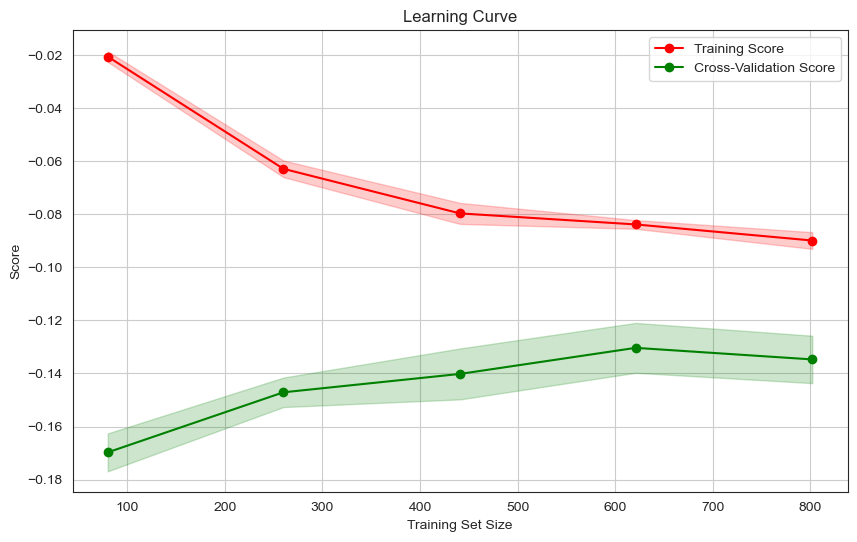

In [123]:
plot_learning_curve(pipe_gb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [124]:
%%time

#define ML models
gb = GradientBoostingRegressor(tol=0.01, max_features='log2')

#define the pipeline that includes the preprocessor and the estimator
pipe_gb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="gb", model=gb)

# Define the hyperparameters to search over
param_grid_gb = {
    'gb__loss':  ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'gb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [50, 100, 200, 500],
    'gb__subsample': [0.5, 0.7, 1.0],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
}

# Perform randomized search with 5-fold cross-validation
random_search_gb_ts_pca = RandomizedSearchCV(estimator=pipe_gb_ts_pca, param_distributions=param_grid_gb, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_gb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 20.5 s
Wall time: 10min 22s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                              GradientBoostingRegressor(max_features='log2',
                                                                        tol=0.01))]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'gb__learning_rate': [0.01, 0.05, 0.1,
                                                              0.2],
                                        'gb__loss': ['squared_error',
                                                     'absolute_error', 'huber',
                                                     'quantile'],
                                        'gb__max_depth': [3, 5, 7, 9],
                                        'gb__min_samples_leaf': [1, 2, 4],
                                        'gb__min_samples_split': [2, 5, 10],
                                        'gb__n_estimators': [50, 100, 200, 500],
                                        'gb__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [125]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_gb_ts_pca = round(random_search_gb_ts_pca.cv_results_["std_test_score"][random_search_gb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_gb_ts_pca.best_params_)
print("Best score: ", random_search_gb_ts_pca.best_score_, f" ({std_gb_ts_pca})")

# valuate model on validation data
r2_train_gb_ts_pca = random_search_gb_ts_pca.score(X_val, y_val)

best_model_gb_ts_pca = random_search_gb_ts_pca.best_estimator_
y_pred_val_gb_ts_pca = best_model_gb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_gb_ts_pca, mse_gb_ts_pca, rmse_gb_ts_pca, r2_gb_ts_pca, rmsle_gb_ts_pca, mape_gb_ts_pca = evaluate_model(y_pred_val_gb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "gb_ts_pca"
evaluation_metrics['best_params_'] = random_search_gb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_gb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_gb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_gb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_gb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_gb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_gb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_gb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 5, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.1}
Best score:  0.8675926577437278  (0.0116)
model: gb_ts_pca
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 5, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.1}
MAE: 16126.988280
MSE: 583282190.588429
RMSE: 24151.235798
R2_train: 0.873106
R2: 0.870345
RMSLE: 0.129595
MAPE: 9.503118


In [126]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_gb_ts_pca, mse_gb_ts_pca, rmse_gb_ts_pca, r2_gb_ts_pca, rmsle_gb_ts_pca, mape_gb_ts_pca = evaluate_model_log(y_pred_val_gb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "gb_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_gb_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_gb_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_gb_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_gb_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_gb_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_gb_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_gb_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_gb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: gb_ts_pca
best_params_: {'gb__subsample': 1.0, 'gb__n_estimators': 500, 'gb__min_samples_split': 5, 'gb__min_samples_leaf': 4, 'gb__max_depth': 5, 'gb__loss': 'squared_error', 'gb__learning_rate': 0.1}
MAE: 0.093713
MSE: 0.016795
RMSE: 0.129595
R2_train: 0.873106
R2: 0.873106
RMSLE: 0.010009
MAPE: 0.783604


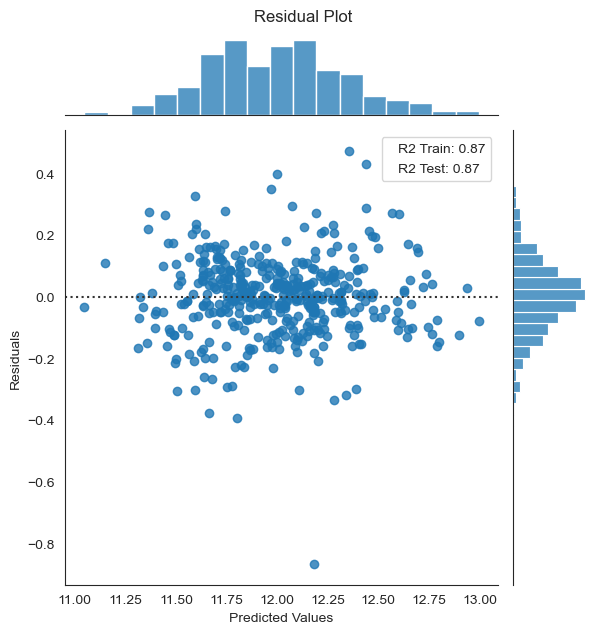

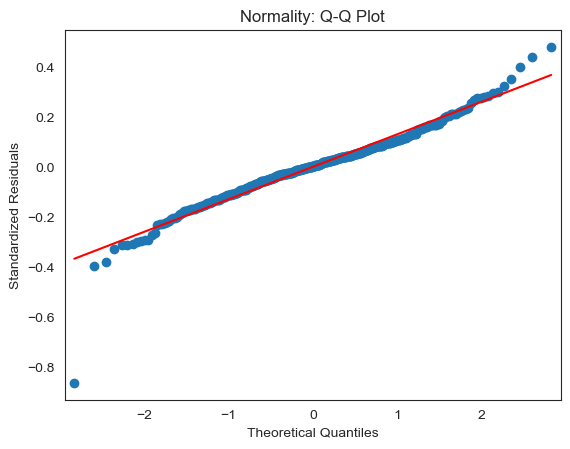

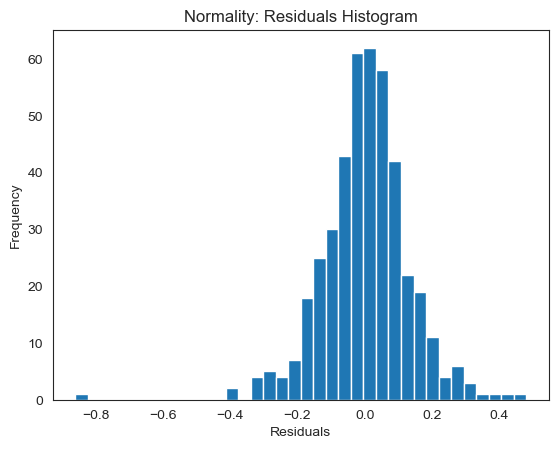

Shapiro-Wilk Test:
Test Statistic: 0.9557515978813171
p-value: 4.4296746826155697e-10
The residuals do not appear to be normally distributed (reject H0)


In [127]:
residual_plot(y_val, y_pred_val_gb_ts_pca, r2_train=r2_train_gb_ts_pca, r2_test=r2_gb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

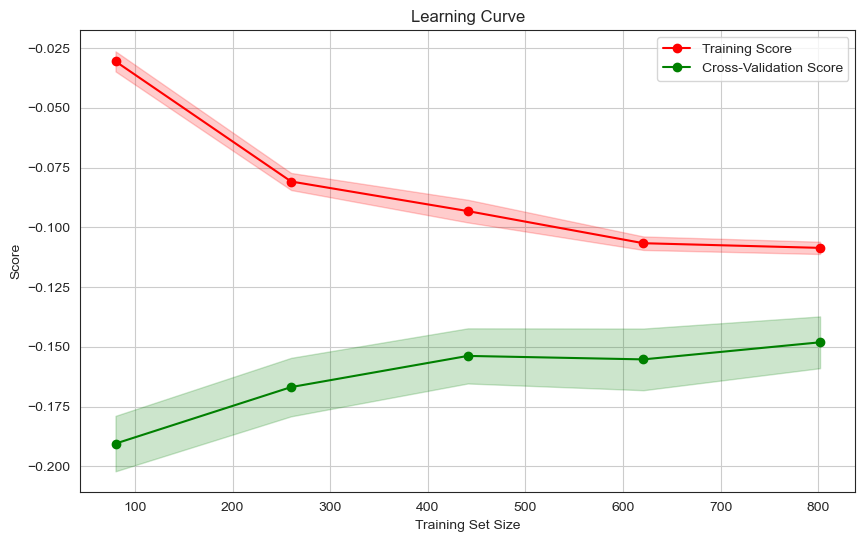

In [128]:
plot_learning_curve(pipe_gb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## XGBOOST
### With Transformer

In [129]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_tf = RandomizedSearchCV(estimator=pipe_xgb_tf, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 11 s
Wall time: 4min 34s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [130]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_tf = round(random_search_xgb_tf.cv_results_["std_test_score"][random_search_xgb_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_tf.best_params_)
print("Best score: ", random_search_xgb_tf.best_score_, f" ({std_xgb_tf})")

# valuate model on validation data
r2_train_xgb_tf = random_search_xgb_tf.score(X_val, y_val)

best_model_xgb_tf = random_search_xgb_tf.best_estimator_
y_pred_val_xgb_tf = best_model_xgb_tf.predict(X_val)

# Compute the evaluation metrics
mae_xgb_tf, mse_xgb_tf, rmse_xgb_tf, r2_xgb_tf, rmsle_xgb_tf, mape_xgb_tf = evaluate_model(y_pred_val_xgb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_tf"
evaluation_metrics['best_params_'] = random_search_xgb_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
Best score:  0.8894795583973621  (0.0247)
model: xgb_tf
best_params_: {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
MAE: 14169.155026
MSE: 475780927.696214
RMSE: 21812.403070
R2_train: 0.893713
R2: 0.894241
RMSLE: 0.118607
MAPE: 8.416708


In [131]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_tf, mse_xgb_tf, rmse_xgb_tf, r2_xgb_tf, rmsle_xgb_tf, mape_xgb_tf = evaluate_model_log(y_pred_val_xgb_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_tf"
evaluation_metrics_log['best_params_'] = random_search_xgb_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_tf
best_params_: {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 200, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
MAE: 0.083131
MSE: 0.014068
RMSE: 0.118607
R2_train: 0.893713
R2: 0.893713
RMSLE: 0.009164
MAPE: 0.695317


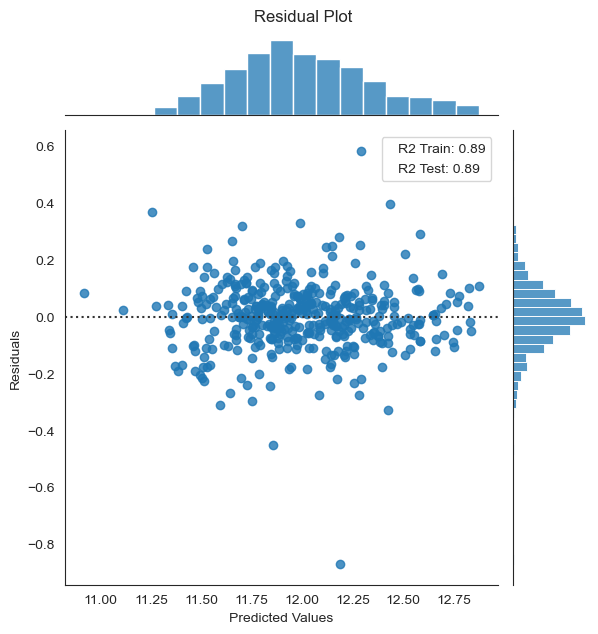

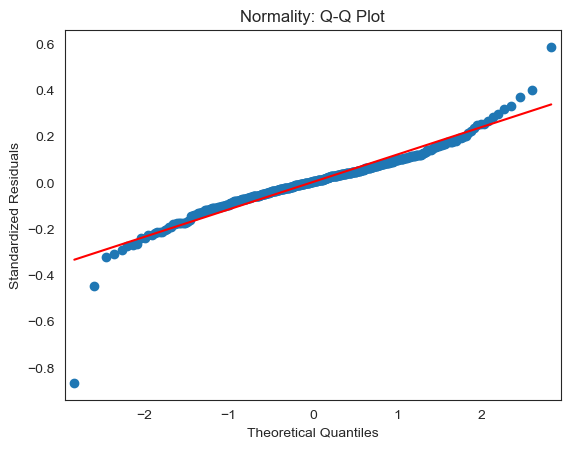

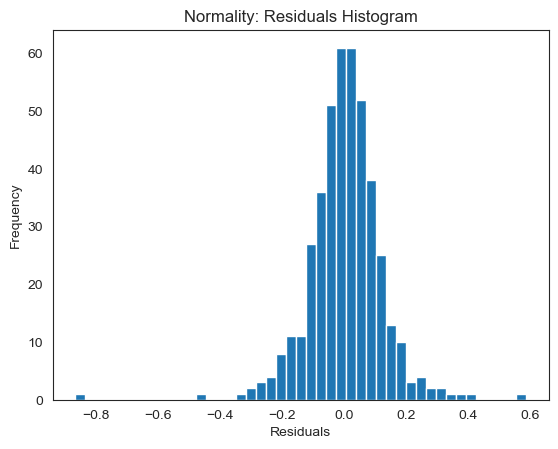

Shapiro-Wilk Test:
Test Statistic: 0.9277470111846924
p-value: 1.4440265118636358e-13
The residuals do not appear to be normally distributed (reject H0)


In [132]:
residual_plot(y_val, y_pred_val_xgb_tf, r2_train=r2_train_xgb_tf, r2_test=r2_xgb_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

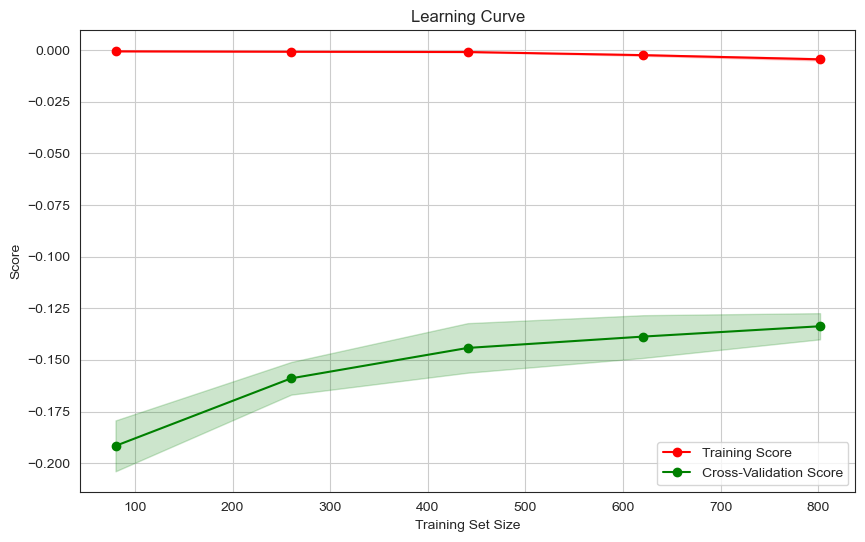

In [133]:
plot_learning_curve(pipe_xgb_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [134]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts = RandomizedSearchCV(estimator=pipe_xgb_ts, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 13 s
Wall time: 5min 13s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [135]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts = round(random_search_xgb_ts.cv_results_["std_test_score"][random_search_xgb_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts.best_params_)
print("Best score: ", random_search_xgb_ts.best_score_, f" ({std_xgb_ts})")

# valuate model on validation data
r2_train_xgb_ts = random_search_xgb_ts.score(X_val, y_val)

best_model_xgb_ts = random_search_xgb_ts.best_estimator_
y_pred_val_xgb_ts = best_model_xgb_ts.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts, mse_xgb_ts, rmse_xgb_ts, r2_xgb_ts, rmsle_xgb_ts, mape_xgb_ts = evaluate_model(y_pred_val_xgb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts"
evaluation_metrics['best_params_'] = random_search_xgb_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 1, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
Best score:  0.8889351320824466  (0.0143)
model: xgb_ts
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
MAE: 14728.387362
MSE: 513918819.075027
RMSE: 22669.777658
R2_train: 0.889779
R2: 0.885763
RMSLE: 0.120782
MAPE: 8.711501


In [136]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_ts, mse_xgb_ts, rmse_xgb_ts, r2_xgb_ts, rmsle_xgb_ts, mape_xgb_ts = evaluate_model_log(y_pred_val_xgb_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_ts"
evaluation_metrics_log['best_params_'] = random_search_xgb_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_ts
best_params_: {'xgb__subsample': 1, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.5, 'xgb__n_estimators': 300, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.5}
MAE: 0.085336
MSE: 0.014588
RMSE: 0.120782
R2_train: 0.889779
R2: 0.889779
RMSLE: 0.009330
MAPE: 0.713887


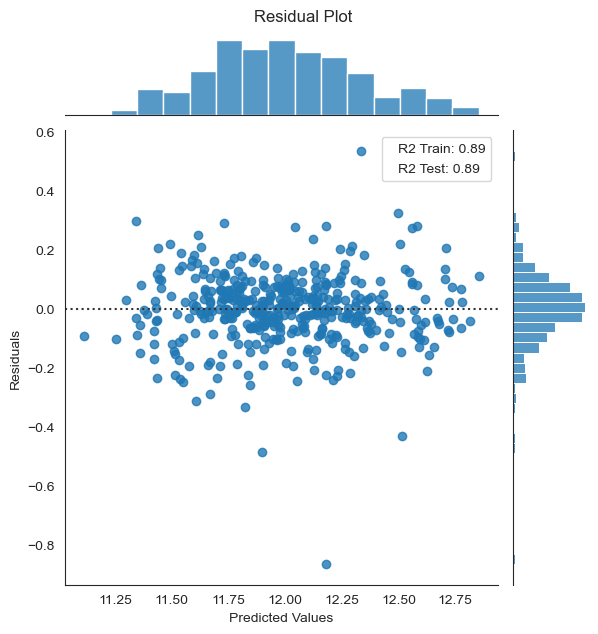

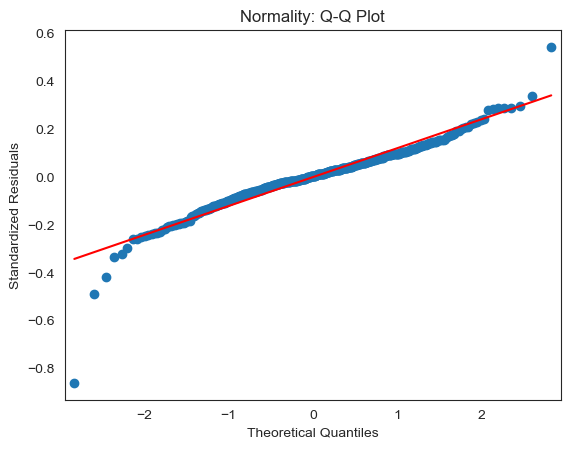

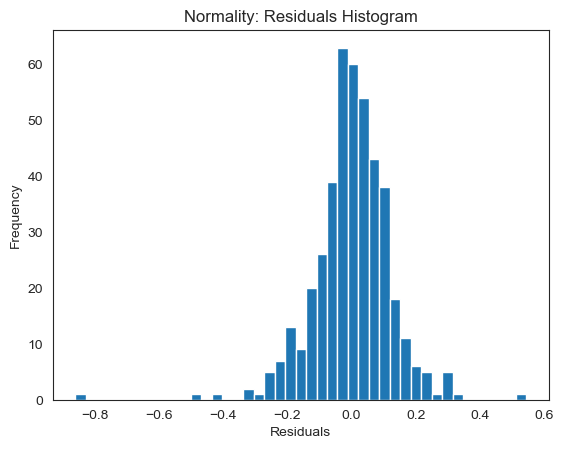

Shapiro-Wilk Test:
Test Statistic: 0.9347651600837708
p-value: 8.59646230068345e-13
The residuals do not appear to be normally distributed (reject H0)


In [137]:
residual_plot(y_val, y_pred_val_xgb_ts, r2_train=r2_train_xgb_ts, r2_test=r2_xgb_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

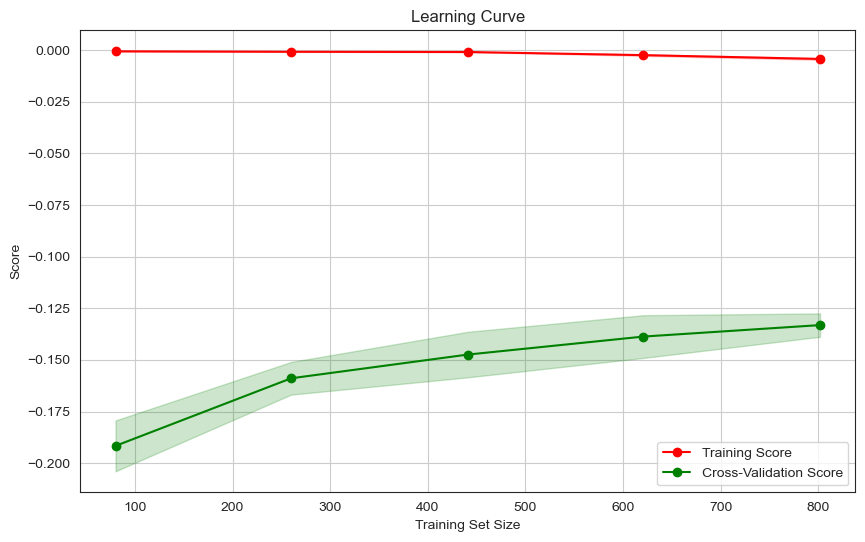

In [138]:
plot_learning_curve(pipe_xgb_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [139]:
%%time

#define ML models
xgb = XGBRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_xgb_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="xgb", model=xgb)

# Define the hyperparameters to search over
param_grid_xgb = {
        'xgb__max_depth': [3, 5, 7, 9],
        'xgb__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'xgb__n_estimators': [100, 200, 300, 400],
        'xgb__colsample_bytree': [0.5, 0.7, 1],
        'xgb__subsample': [0.5, 0.7, 1],
        'xgb__gamma': [0, 0.1, 0.5, 1],
        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
        'xgb__reg_lambda': [0, 0.1, 0.5, 1]
}

# Perform randomized search with 5-fold cross-validation
random_search_xgb_ts_pca = RandomizedSearchCV(estimator=pipe_xgb_ts_pca, param_distributions=param_grid_xgb, n_iter=100, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_xgb_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 10.5 s
Wall time: 2min 20s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                           random_state=None, ...))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.5, 0.7, 1],
                                        'xgb__gamma': [0, 0.1, 0.5, 1],
                                        'xgb__learning_rate': [0.01, 0.1, 0.2,
                                                               0.3],
                                        'xgb__max_depth': [3, 5, 7, 9],
                                        'xgb__n_estimators': [100, 200, 300,
                                                              400],
                                        'xgb__reg_alpha': [0, 0.1, 0.5, 1],
                                        'xgb__reg_lambda': [0, 0.1, 0.5, 1],
                                        'xgb__subsample': [0.5, 0.7, 1]},
                   scoring='r2', verbose=1)

In [140]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_xgb_ts_pca = round(random_search_xgb_ts_pca.cv_results_["std_test_score"][random_search_xgb_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_xgb_ts_pca.best_params_)
print("Best score: ", random_search_xgb_ts_pca.best_score_, f" ({std_xgb_ts_pca})")

# valuate model on validation data
r2_train_xgb_ts_pca = random_search_xgb_ts_pca.score(X_val, y_val)

best_model_xgb_ts_pca = random_search_xgb_ts_pca.best_estimator_
y_pred_val_xgb_ts_pca = best_model_xgb_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_xgb_ts_pca, mse_xgb_ts_pca, rmse_xgb_ts_pca, r2_xgb_ts_pca, rmsle_xgb_ts_pca, mape_xgb_ts_pca = evaluate_model(y_pred_val_xgb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "xgb_ts_pca"
evaluation_metrics['best_params_'] = random_search_xgb_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_xgb_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_xgb_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_xgb_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_xgb_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_xgb_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_xgb_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_xgb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
Best score:  0.8774421191170166  (0.0179)
model: xgb_ts_pca
best_params_: {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 15924.961382
MSE: 618288480.639613
RMSE: 24865.407309
R2_train: 0.868017
R2: 0.862563
RMSLE: 0.132168
MAPE: 9.225667


In [141]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_xgb_ts_pca, mse_xgb_ts_pca, rmse_xgb_ts_pca, r2_xgb_ts_pca, rmsle_xgb_ts_pca, mape_xgb_ts_pca = evaluate_model_log(y_pred_val_xgb_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "xgb_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_xgb_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_xgb_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_xgb_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_xgb_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_xgb_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_xgb_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_xgb_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_xgb_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: xgb_ts_pca
best_params_: {'xgb__subsample': 0.5, 'xgb__reg_lambda': 0, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 300, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.1, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}
MAE: 0.091033
MSE: 0.017468
RMSE: 0.132168
R2_train: 0.868017
R2: 0.868017
RMSLE: 0.010208
MAPE: 0.760337


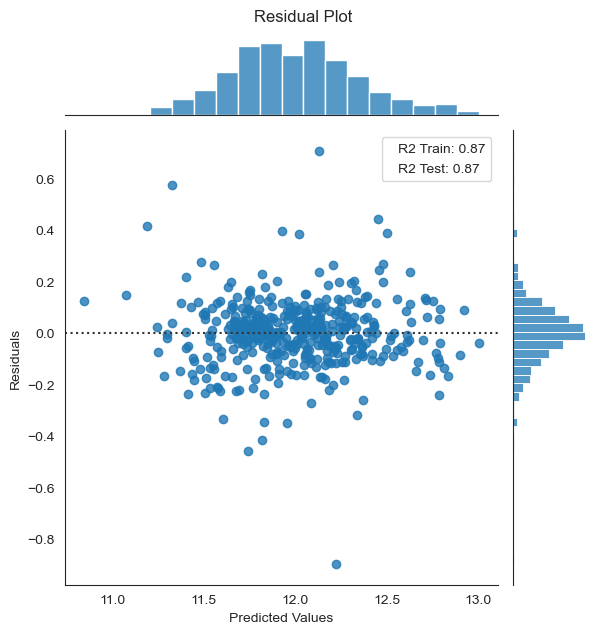

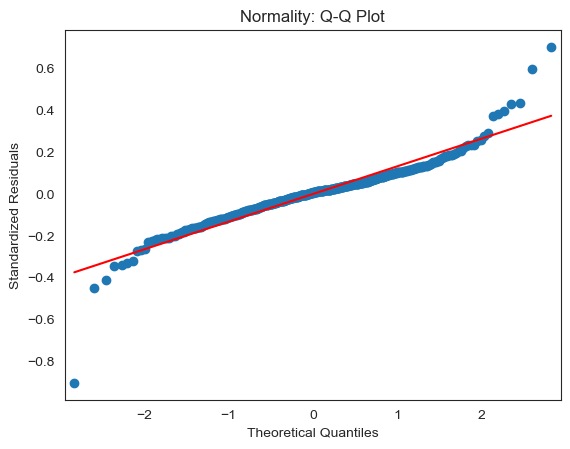

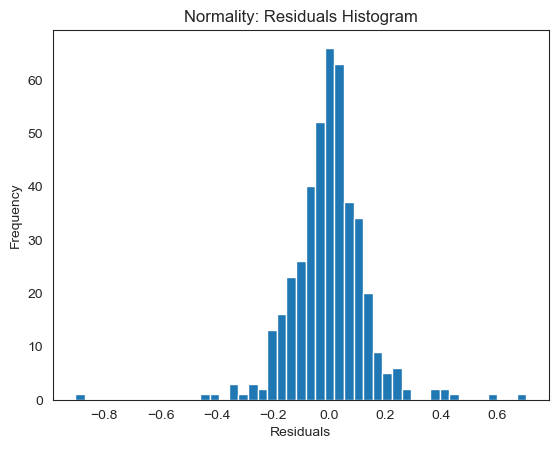

Shapiro-Wilk Test:
Test Statistic: 0.9172086715698242
p-value: 1.2240161412647305e-14
The residuals do not appear to be normally distributed (reject H0)


In [142]:
residual_plot(y_val, y_pred_val_xgb_ts_pca, r2_train=r2_train_xgb_ts_pca, r2_test=r2_xgb_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

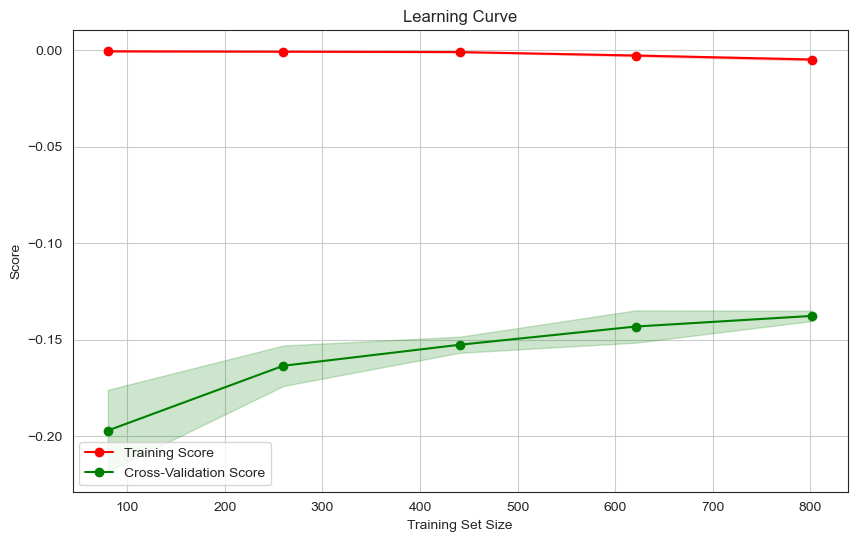

In [143]:
plot_learning_curve(pipe_xgb_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Light GBM
### With Transformer

In [144]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_tf = RandomizedSearchCV(estimator=pipe_lgbm_tf, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 18.7 s
Wall time: 2min 10s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [145]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_tf = round(random_search_lgbm_tf.cv_results_["std_test_score"][random_search_lgbm_tf.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_tf.best_params_)
print("Best score: ", random_search_lgbm_tf.best_score_, f" ({std_lgbm_tf})")

# valuate model on validation data
r2_train_lgbm_tf = random_search_lgbm_tf.score(X_val, y_val)

best_model_lgbm_tf = random_search_lgbm_tf.best_estimator_
y_pred_val_lgbm_tf = best_model_lgbm_tf.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_tf, mse_lgbm_tf, rmse_lgbm_tf, r2_lgbm_tf, rmsle_lgbm_tf, mape_lgbm_tf = evaluate_model(y_pred_val_lgbm_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_tf"
evaluation_metrics['best_params_'] = random_search_lgbm_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 1.0, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8905339973100318  (0.0263)
model: lgbm_tf
best_params_: {'lgbm__subsample': 1.0, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 14994.950322
MSE: 533145333.137727
RMSE: 23089.940085
R2_train: 0.889809
R2: 0.881489
RMSLE: 0.120765
MAPE: 8.711325


In [146]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_tf, mse_lgbm_tf, rmse_lgbm_tf, r2_lgbm_tf, rmsle_lgbm_tf, mape_lgbm_tf = evaluate_model_log(y_pred_val_lgbm_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_tf"
evaluation_metrics_log['best_params_'] = random_search_lgbm_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_tf
best_params_: {'lgbm__subsample': 1.0, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 0.085782
MSE: 0.014584
RMSE: 0.120765
R2_train: 0.889809
R2: 0.889809
RMSLE: 0.009312
MAPE: 0.716550


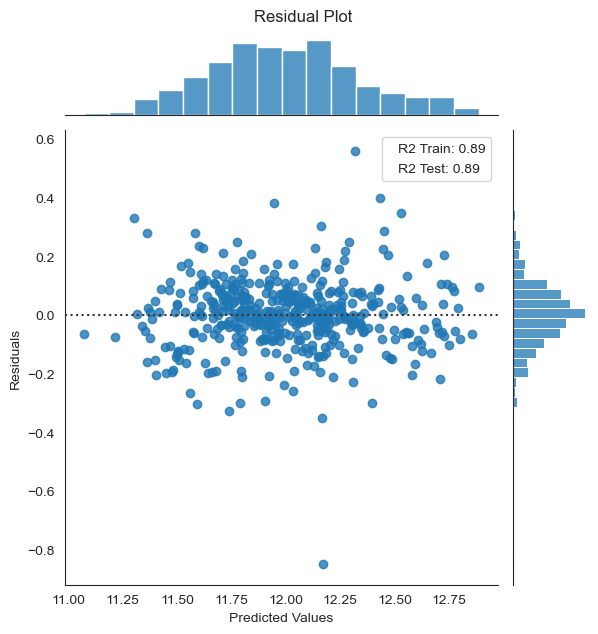

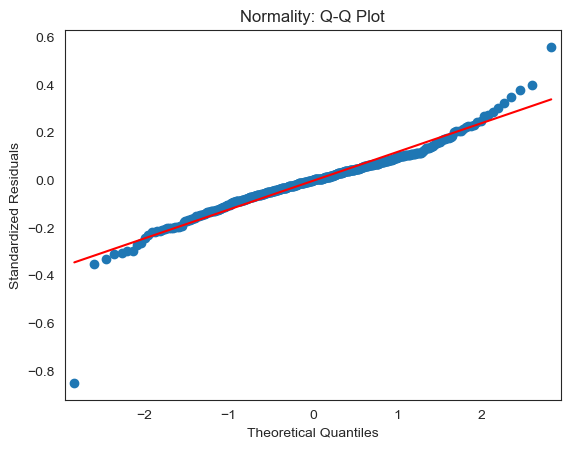

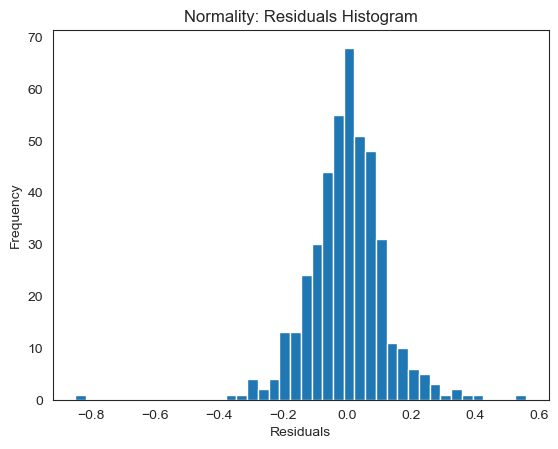

Shapiro-Wilk Test:
Test Statistic: 0.9407872557640076
p-value: 4.41836107631377e-12
The residuals do not appear to be normally distributed (reject H0)


In [147]:
residual_plot(y_val, y_pred_val_lgbm_tf, r2_train=r2_train_lgbm_tf, r2_test=r2_lgbm_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

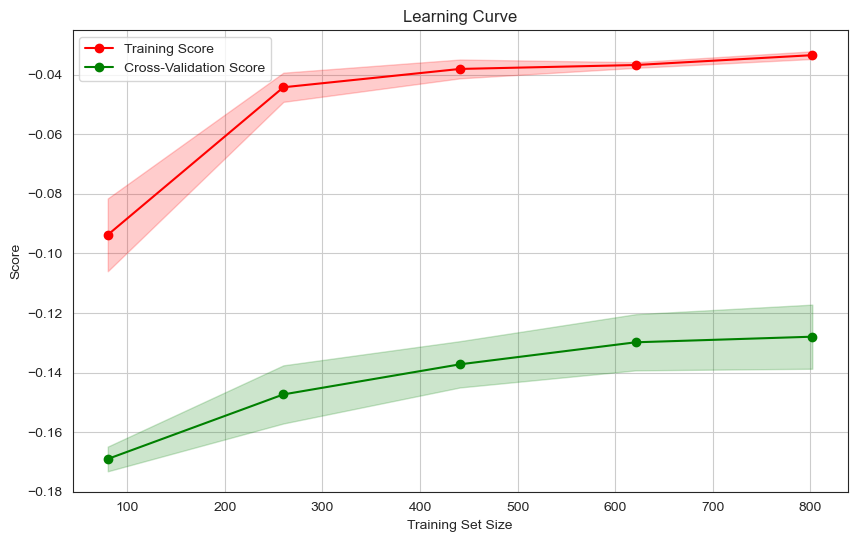

In [148]:
plot_learning_curve(pipe_lgbm_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [149]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts = RandomizedSearchCV(estimator=pipe_lgbm_ts, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 19.2 s
Wall time: 2min 5s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [150]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts = round(random_search_lgbm_ts.cv_results_["std_test_score"][random_search_lgbm_ts.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts.best_params_)
print("Best score: ", random_search_lgbm_ts.best_score_, f" ({std_lgbm_ts})")

# valuate model on validation data
r2_train_lgbm_ts = random_search_lgbm_ts.score(X_val, y_val)

best_model_lgbm_ts = random_search_lgbm_ts.best_estimator_
y_pred_val_lgbm_ts = best_model_lgbm_ts.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts, mse_lgbm_ts, rmse_lgbm_ts, r2_lgbm_ts, rmsle_lgbm_ts, mape_lgbm_ts = evaluate_model(y_pred_val_lgbm_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts"
evaluation_metrics['best_params_'] = random_search_lgbm_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8898516391929119  (0.0252)
model: lgbm_ts
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 0.5}
MAE: 15035.035022
MSE: 544656620.792190
RMSE: 23337.879526
R2_train: 0.883735
R2: 0.878931
RMSLE: 0.124049
MAPE: 8.849665


In [151]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_ts, mse_lgbm_ts, rmse_lgbm_ts, r2_lgbm_ts, rmsle_lgbm_ts, mape_lgbm_ts = evaluate_model_log(y_pred_val_lgbm_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_ts"
evaluation_metrics_log['best_params_'] = random_search_lgbm_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_ts
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 3, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 0.5}
MAE: 0.087012
MSE: 0.015388
RMSE: 0.124049
R2_train: 0.883735
R2: 0.883735
RMSLE: 0.009577
MAPE: 0.727520


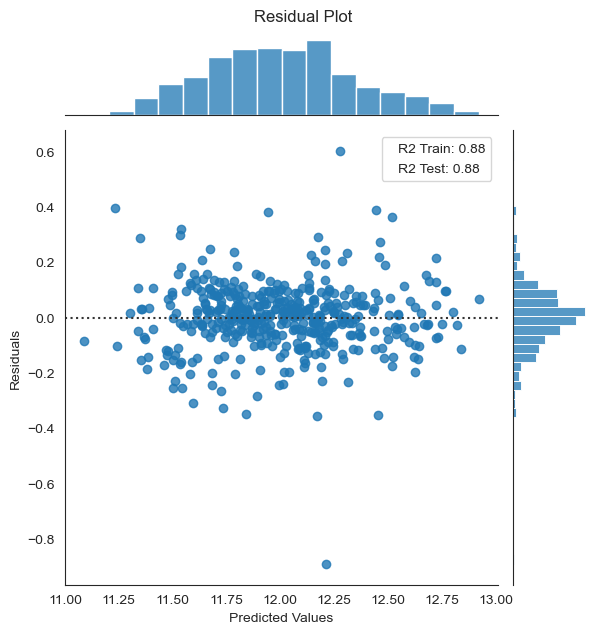

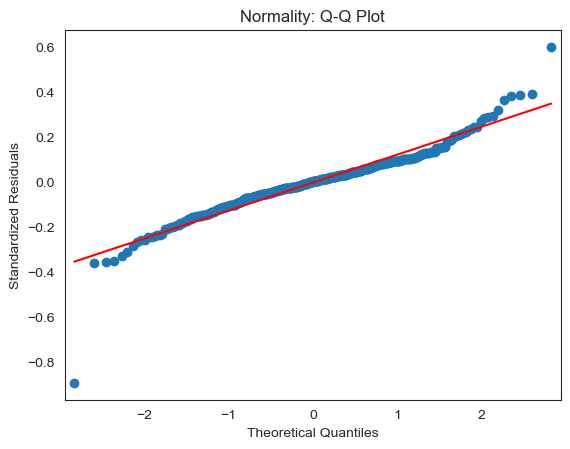

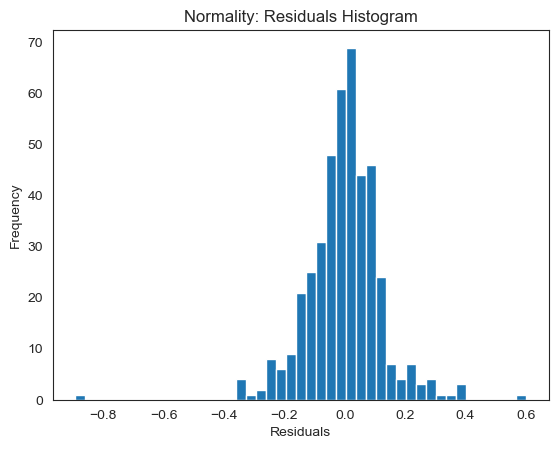

Shapiro-Wilk Test:
Test Statistic: 0.93022620677948
p-value: 2.6740258228172276e-13
The residuals do not appear to be normally distributed (reject H0)


In [152]:
residual_plot(y_val, y_pred_val_lgbm_ts, r2_train=r2_train_lgbm_ts, r2_test=r2_lgbm_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

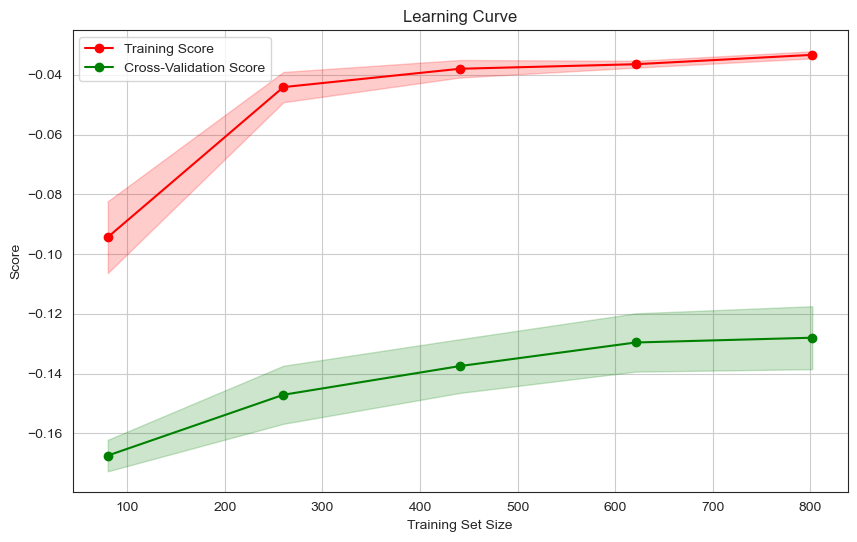

In [153]:
plot_learning_curve(pipe_lgbm_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [154]:
%%time

#define ML models
lgbm = LGBMRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_lgbm_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="lgbm", model=lgbm)

# Define the hyperparameters to search over
param_grid_lgbm = {
    'lgbm__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'lgbm__max_depth': [3, 5, 7, 9],
    'lgbm__n_estimators': [50, 100, 200, 500],
    'lgbm__subsample': [0.5, 0.7, 1.0],
    'lgbm__colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform randomized search with 5-fold cross-validation
random_search_lgbm_ts_pca = RandomizedSearchCV(estimator=pipe_lgbm_ts_pca, param_distributions=param_grid_lgbm, n_iter=250, cv=5, scoring='r2', verbose=1, n_jobs=-1)
random_search_lgbm_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



CPU times: total: 19.9 s
Wall time: 2min 7s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('label',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['MSSubClass',
                                                                                'MSZoning',
                                                                                'Alley',
                                                                                'LotShape',
                                                                                'LandContour',
                                                                                'LotConfig',
                                                                                'LandSlope',
                                                                                'Neighborhood',
                                                                                'Condition1',
                                                                                'BldgType',
                                                                                'Hous...
                                                                                'KitchenAbvGr',
                                                                                'TotRmsAbvGrd',
                                                                                'Fireplaces',
                                                                                'GarageCars',
                                                                                'MoSold',
                                                                                'YrSold'])])),
                                             ('lgbm', LGBMRegressor())]),
                   n_iter=250, n_jobs=-1,
                   param_distributions={'lgbm__colsample_bytree': [0.5, 0.7,
                                                                   1.0],
                                        'lgbm__learning_rate': [0.01, 0.05, 0.1,
                                                                0.2],
                                        'lgbm__max_depth': [3, 5, 7, 9],
                                        'lgbm__n_estimators': [50, 100, 200,
                                                               500],
                                        'lgbm__subsample': [0.5, 0.7, 1.0]},
                   scoring='r2', verbose=1)

In [155]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_lgbm_ts_pca = round(random_search_lgbm_ts_pca.cv_results_["std_test_score"][random_search_lgbm_ts_pca.best_index_], 4)
print("Best hyperparameters: ", random_search_lgbm_ts_pca.best_params_)
print("Best score: ", random_search_lgbm_ts_pca.best_score_, f" ({std_lgbm_ts_pca})")

# valuate model on validation data
r2_train_lgbm_ts_pca = random_search_lgbm_ts_pca.score(X_val, y_val)

best_model_lgbm_ts_pca = random_search_lgbm_ts_pca.best_estimator_
y_pred_val_lgbm_ts_pca = best_model_lgbm_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_lgbm_ts_pca, mse_lgbm_ts_pca, rmse_lgbm_ts_pca, r2_lgbm_ts_pca, rmsle_lgbm_ts_pca, mape_lgbm_ts_pca = evaluate_model(y_pred_val_lgbm_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "lgbm_ts_pca"
evaluation_metrics['best_params_'] = random_search_lgbm_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_lgbm_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_lgbm_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_lgbm_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_lgbm_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_lgbm_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_lgbm_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
Best score:  0.8752476603424816  (0.0163)
model: lgbm_ts_pca
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 16342.667975
MSE: 607981910.068822
RMSE: 24657.289187
R2_train: 0.876518
R2: 0.864854
RMSLE: 0.127841
MAPE: 9.427372


In [156]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_lgbm_ts_pca, mse_lgbm_ts_pca, rmse_lgbm_ts_pca, r2_lgbm_ts_pca, rmsle_lgbm_ts_pca, mape_lgbm_ts_pca = evaluate_model_log(y_pred_val_lgbm_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "lgbm_ts_pca"
evaluation_metrics_log['best_params_'] = random_search_lgbm_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_lgbm_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_lgbm_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_lgbm_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_lgbm_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_lgbm_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_lgbm_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_lgbm_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: lgbm_ts_pca
best_params_: {'lgbm__subsample': 0.5, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 5, 'lgbm__learning_rate': 0.05, 'lgbm__colsample_bytree': 0.5}
MAE: 0.092734
MSE: 0.016343
RMSE: 0.127841
R2_train: 0.876518
R2: 0.876518
RMSLE: 0.009851
MAPE: 0.774076


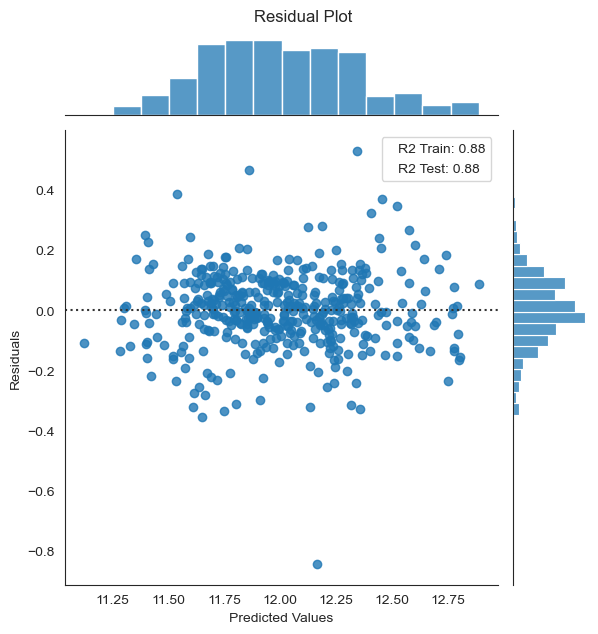

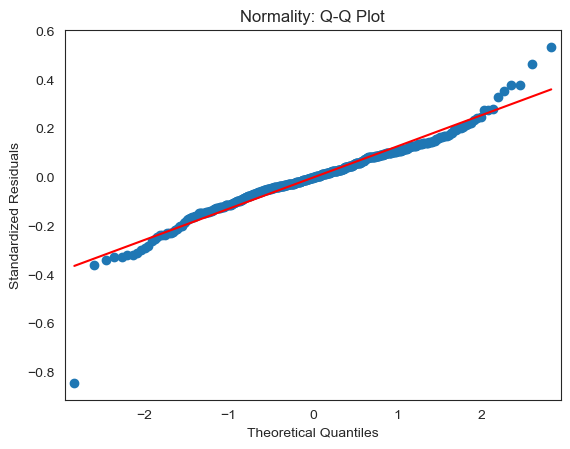

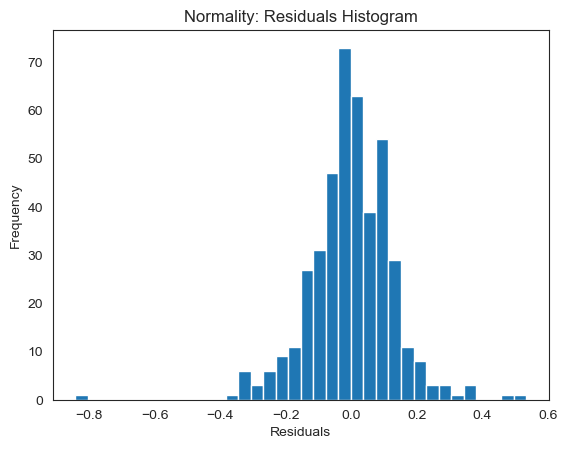

Shapiro-Wilk Test:
Test Statistic: 0.951949417591095
p-value: 1.2617576428120003e-10
The residuals do not appear to be normally distributed (reject H0)


In [157]:
residual_plot(y_val, y_pred_val_lgbm_ts_pca, r2_train=r2_train_lgbm_ts_pca, r2_test=r2_lgbm_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

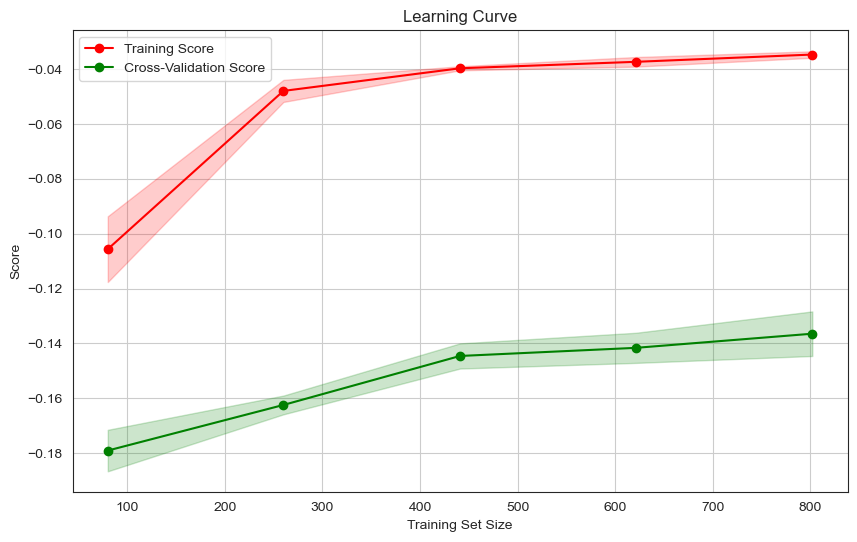

In [158]:
plot_learning_curve(pipe_lgbm_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## KNN Regressor
### With Transformer

In [159]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_tf = GridSearchCV(pipe_knn_tf, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [160]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_tf = round(grid_search_knn_tf.cv_results_["std_test_score"][grid_search_knn_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_tf.best_params_)
print("Best score: ", grid_search_knn_tf.best_score_, f" ({std_knn_tf})")

# valuate model on validation data
r2_train_knn_tf = grid_search_knn_tf.score(X_val, y_val)

best_model_knn_tf = grid_search_knn_tf.best_estimator_
y_pred_val_knn_tf = best_model_knn_tf.predict(X_val)

# Compute the evaluation metrics
mae_knn_tf, mse_knn_tf, rmse_knn_tf, r2_knn_tf, rmsle_knn_tf, mape_knn_tf = evaluate_model(y_pred_val_knn_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_tf"
evaluation_metrics['best_params_'] = grid_search_knn_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.8211960765582192  (0.0165)
model: knn_tf
best_params_: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 18404.026267
MSE: 788278638.014498
RMSE: 28076.300291
R2_train: 0.841461
R2: 0.824777
RMSLE: 0.144856
MAPE: 10.630550


In [161]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_tf, mse_knn_tf, rmse_knn_tf, r2_knn_tf, rmsle_knn_tf, mape_knn_tf = evaluate_model_log(y_pred_val_knn_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_tf"
evaluation_metrics_log['best_params_'] = grid_search_knn_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_tf
best_params_: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 0.105425
MSE: 0.020983
RMSE: 0.144856
R2_train: 0.841461
R2: 0.841461
RMSLE: 0.011169
MAPE: 0.880377


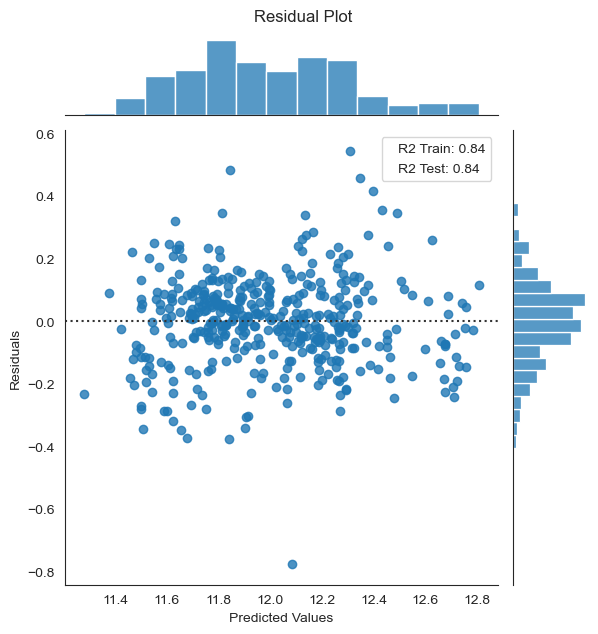

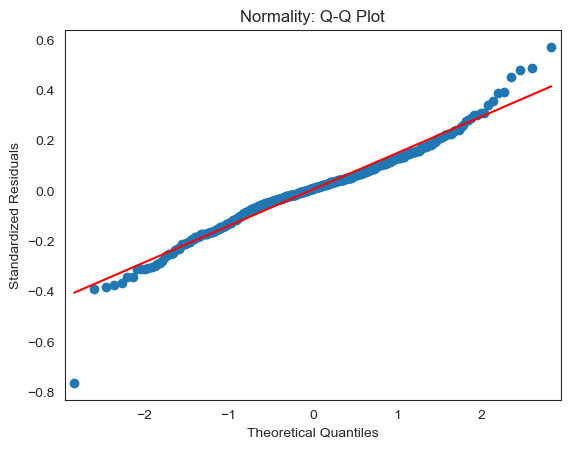

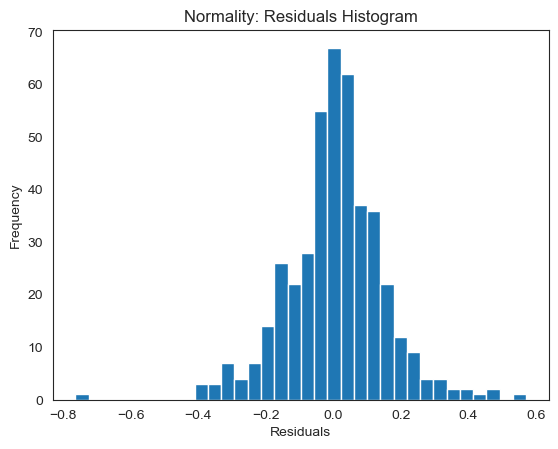

Shapiro-Wilk Test:
Test Statistic: 0.9705822467803955
p-value: 1.2748566291520547e-07
The residuals do not appear to be normally distributed (reject H0)


In [162]:
residual_plot(y_val, y_pred_val_knn_tf, r2_train=r2_train_knn_tf, r2_test=r2_knn_tf)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

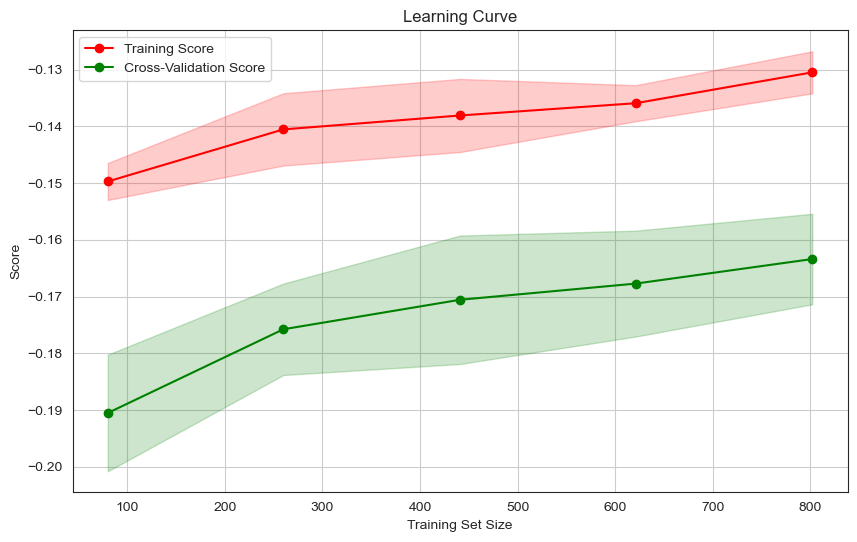

In [163]:
plot_learning_curve(pipe_knn_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler

In [164]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts = GridSearchCV(pipe_knn_ts, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [165]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts = round(grid_search_knn_ts.cv_results_["std_test_score"][grid_search_knn_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts.best_params_)
print("Best score: ", grid_search_knn_ts.best_score_, f" ({std_knn_ts})")

# valuate model on validation data
r2_train_knn_ts = grid_search_knn_ts.score(X_val, y_val)

best_model_knn_ts = grid_search_knn_ts.best_estimator_
y_pred_val_knn_ts = best_model_knn_ts.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts, mse_knn_ts, rmse_knn_ts, r2_knn_ts, rmsle_knn_ts, mape_knn_ts = evaluate_model(y_pred_val_knn_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts"
evaluation_metrics['best_params_'] = grid_search_knn_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
Best score:  0.8214612785056083  (0.0194)
model: knn_ts
best_params_: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 18424.246417
MSE: 806691779.551383
RMSE: 28402.319968
R2_train: 0.840093
R2: 0.820684
RMSLE: 0.145479
MAPE: 10.579553


In [166]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_ts, mse_knn_ts, rmse_knn_ts, r2_knn_ts, rmsle_knn_ts, mape_knn_ts = evaluate_model_log(y_pred_val_knn_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_ts"
evaluation_metrics_log['best_params_'] = grid_search_knn_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_ts
best_params_: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'distance'}
MAE: 0.105352
MSE: 0.021164
RMSE: 0.145479
R2_train: 0.840093
R2: 0.840093
RMSLE: 0.011210
MAPE: 0.879373


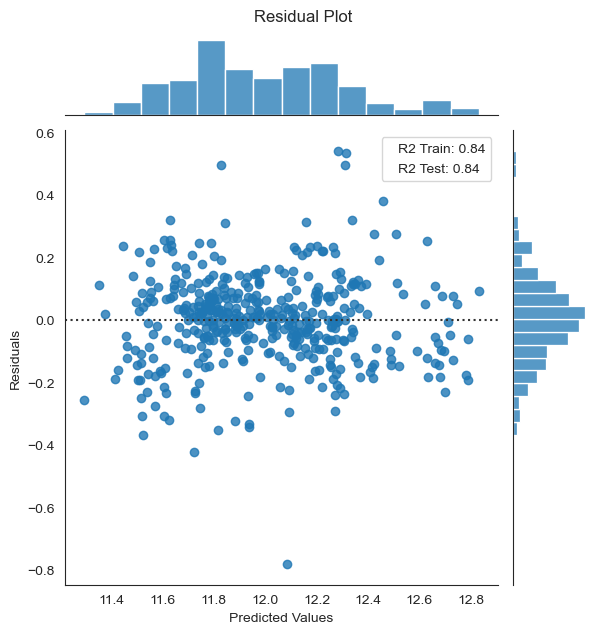

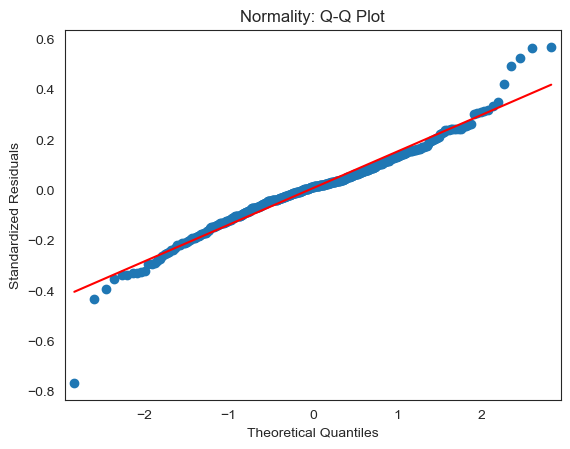

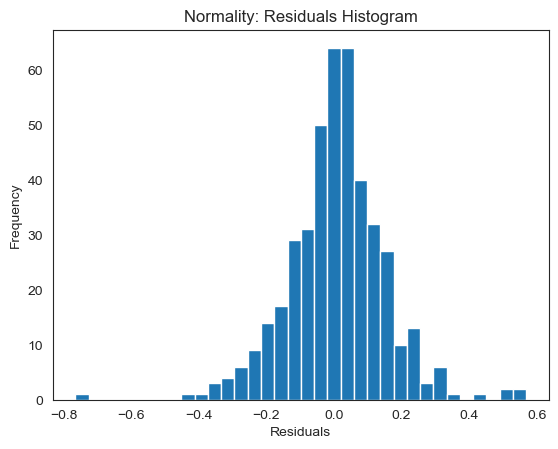

Shapiro-Wilk Test:
Test Statistic: 0.9666002988815308
p-value: 2.4195390579961895e-08
The residuals do not appear to be normally distributed (reject H0)


In [167]:
residual_plot(y_val, y_pred_val_knn_ts, r2_train=r2_train_knn_ts, r2_test=r2_knn_ts)

In [168]:
plot_learning_curve(pipe_knn_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

### With Transformer + Scaler + PCA

In [169]:
#define ML models
knn = KNeighborsRegressor()

#define the pipeline that includes the preprocessor and the estimator
pipe_knn_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="knn", model=knn)

# Define the hyperparameters to search over
param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

# Perform grid search with 5-fold cross-validation
grid_search_knn_ts_pca = GridSearchCV(pipe_knn_ts_pca, param_grid_knn, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_knn_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [170]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_knn_ts_pca = round(grid_search_knn_ts_pca.cv_results_["std_test_score"][grid_search_knn_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_knn_ts_pca.best_params_)
print("Best score: ", grid_search_knn_ts_pca.best_score_, f" ({std_knn_ts_pca})")

# valuate model on validation data
r2_train_knn_ts_pca = grid_search_knn_ts_pca.score(X_val, y_val)

best_model_knn_ts_pca = grid_search_knn_ts_pca.best_estimator_
y_pred_val_knn_ts_pca = best_model_knn_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_knn_ts_pca, mse_knn_ts_pca, rmse_knn_ts_pca, r2_knn_ts_pca, rmsle_knn_ts_pca, mape_knn_ts_pca = evaluate_model(y_pred_val_knn_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "knn_ts_pca"
evaluation_metrics['best_params_'] = grid_search_knn_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_knn_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_knn_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_knn_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_knn_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_knn_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_knn_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_knn_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}
Best score:  0.805983784095789  (0.019)
model: knn_ts_pca
best_params_: {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}
MAE: 19779.245183
MSE: 858686278.133396
RMSE: 29303.349265
R2_train: 0.821288
R2: 0.809126
RMSLE: 0.153796
MAPE: 11.562553


In [171]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_knn_ts_pca, mse_knn_ts_pca, rmse_knn_ts_pca, r2_knn_ts_pca, rmsle_knn_ts_pca, mape_knn_ts_pca = evaluate_model_log(y_pred_val_knn_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "knn_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_knn_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_knn_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_knn_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_knn_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_knn_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_knn_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_knn_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_knn_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: knn_ts_pca
best_params_: {'knn__n_neighbors': 11, 'knn__p': 2, 'knn__weights': 'distance'}
MAE: 0.113839
MSE: 0.023653
RMSE: 0.153796
R2_train: 0.821288
R2: 0.821288
RMSLE: 0.011862
MAPE: 0.951213


In [172]:
residual_plot(y_val, y_pred_val_knn_ts_pca, r2_train=r2_train_knn_ts_pca, r2_test=r2_knn_ts_pca)

Shapiro-Wilk Test:
Test Statistic: 0.9791117906570435
p-value: 7.240192644530907e-06
The residuals do not appear to be normally distributed (reject H0)


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

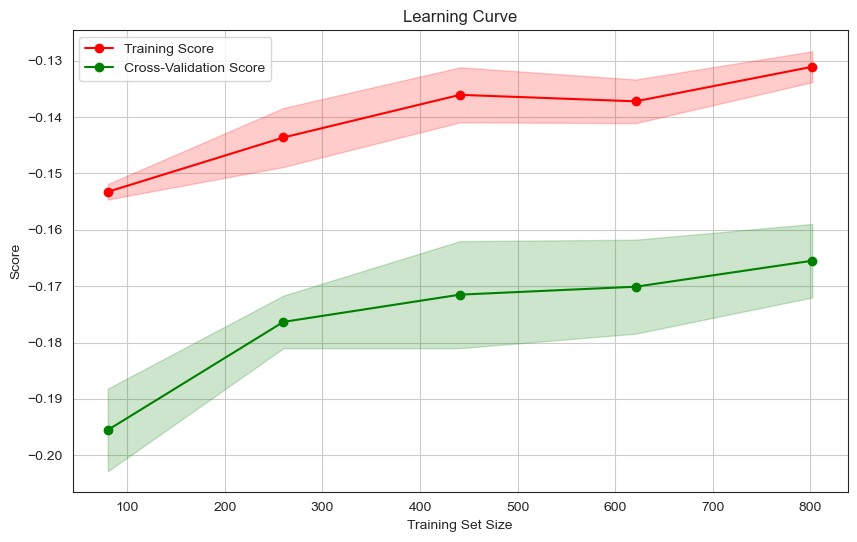

In [173]:
plot_learning_curve(pipe_knn_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## SVR
### With Transformer

In [174]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_tf = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over. 'Linear kernel' took so long time
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_tf = GridSearchCV(pipe_svr_tf, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_tf.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [175]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_tf = round(grid_search_svr_tf.cv_results_["std_test_score"][grid_search_svr_tf.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_tf.best_params_)
print("Best score: ", grid_search_svr_tf.best_score_, f" ({std_svr_tf})")

# valuate model on validation data
r2_train_svr_tf = grid_search_svr_tf.score(X_val, y_val)

best_model_svr_tf = grid_search_svr_tf.best_estimator_
y_pred_val_svr_tf = best_model_svr_tf.predict(X_val)

# Compute the evaluation metrics
mae_svr_tf, mse_svr_tf, rmse_svr_tf, r2_svr_tf, rmsle_svr_tf, mape_svr_tf = evaluate_model(y_pred_val_svr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_tf"
evaluation_metrics['best_params_'] = grid_search_svr_tf.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_tf:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_tf:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_tf:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_tf:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_tf:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_tf:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8887831135011034  (0.017)
model: svr_tf
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 13995.118073
MSE: 470109778.169501
RMSE: 21682.015086
R2_train: 0.901213
R2: 0.895501
RMSLE: 0.114345
MAPE: 8.267065


In [176]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_tf, mse_svr_tf, rmse_svr_tf, r2_svr_tf, rmsle_svr_tf, mape_svr_tf = evaluate_model_log(y_pred_val_svr_tf, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_tf"
evaluation_metrics_log['best_params_'] = grid_search_svr_tf.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_tf:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_tf:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_tf:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_tf:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_tf:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_tf:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_tf:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_tf
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.080997
MSE: 0.013075
RMSE: 0.114345
R2_train: 0.901213
R2: 0.901213
RMSLE: 0.008826
MAPE: 0.677580


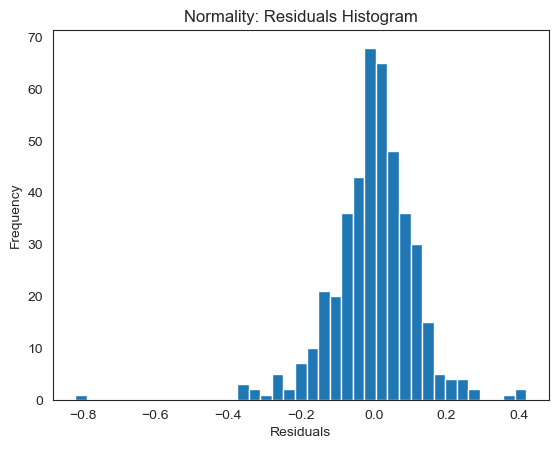

Shapiro-Wilk Test:
Test Statistic: 0.9361773133277893
p-value: 1.25012673823921e-12
The residuals do not appear to be normally distributed (reject H0)


In [177]:
residual_plot(y_val, y_pred_val_svr_tf, r2_train=r2_train_svr_tf, r2_test=r2_svr_tf)

In [178]:
plot_learning_curve(pipe_svr_tf, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

### With Transformer + Scaler

In [179]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts = GridSearchCV(pipe_svr_ts, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [180]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts = round(grid_search_svr_ts.cv_results_["std_test_score"][grid_search_svr_ts.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts.best_params_)
print("Best score: ", grid_search_svr_ts.best_score_, f" ({std_svr_ts})")

# valuate model on validation data
r2_train_svr_ts = grid_search_svr_ts.score(X_val, y_val)

best_model_svr_ts = grid_search_svr_ts.best_estimator_
y_pred_val_svr_ts = best_model_svr_ts.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts, mse_svr_ts, rmse_svr_ts, r2_svr_ts, rmsle_svr_ts, mape_svr_ts = evaluate_model(y_pred_val_svr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts"
evaluation_metrics['best_params_'] = grid_search_svr_ts.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8894584099263895  (0.0166)
model: svr_ts
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 13978.658700
MSE: 466247228.466212
RMSE: 21592.758704
R2_train: 0.900329
R2: 0.896360
RMSLE: 0.114856
MAPE: 8.285307


In [181]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_ts, mse_svr_ts, rmse_svr_ts, r2_svr_ts, rmsle_svr_ts, mape_svr_ts = evaluate_model_log(y_pred_val_svr_ts, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_ts"
evaluation_metrics_log['best_params_'] = grid_search_svr_ts.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_ts:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_ts:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_ts:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_ts:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_ts:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_ts:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_ts:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_ts
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.081283
MSE: 0.013192
RMSE: 0.114856
R2_train: 0.900329
R2: 0.900329
RMSLE: 0.008869
MAPE: 0.680049


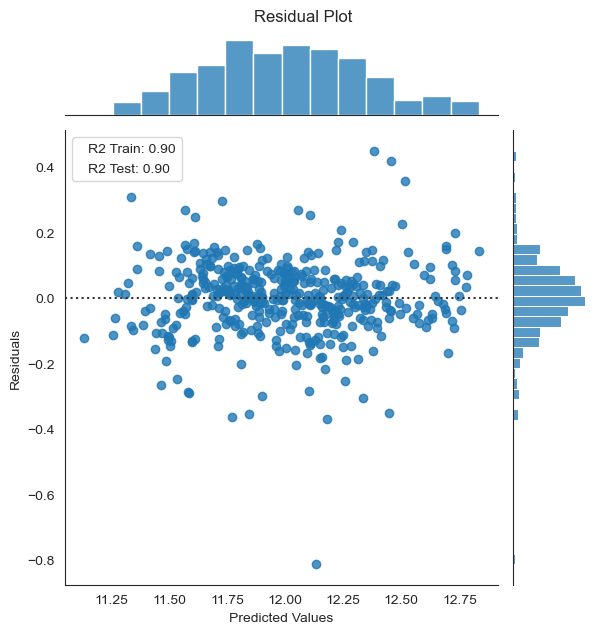

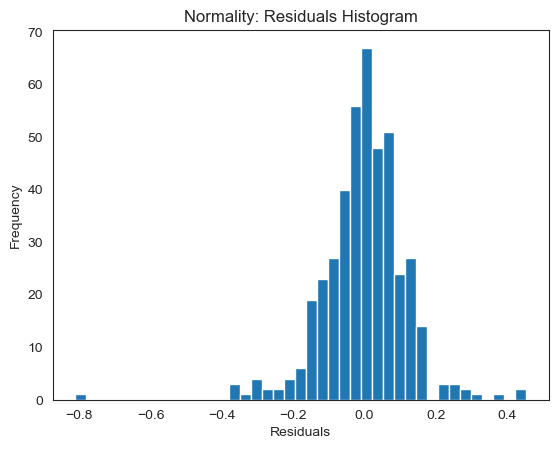

Shapiro-Wilk Test:
Test Statistic: 0.9334479570388794
p-value: 6.091760125850887e-13
The residuals do not appear to be normally distributed (reject H0)


In [182]:
residual_plot(y_val, y_pred_val_svr_ts, r2_train=r2_train_svr_ts, r2_test=r2_svr_ts)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

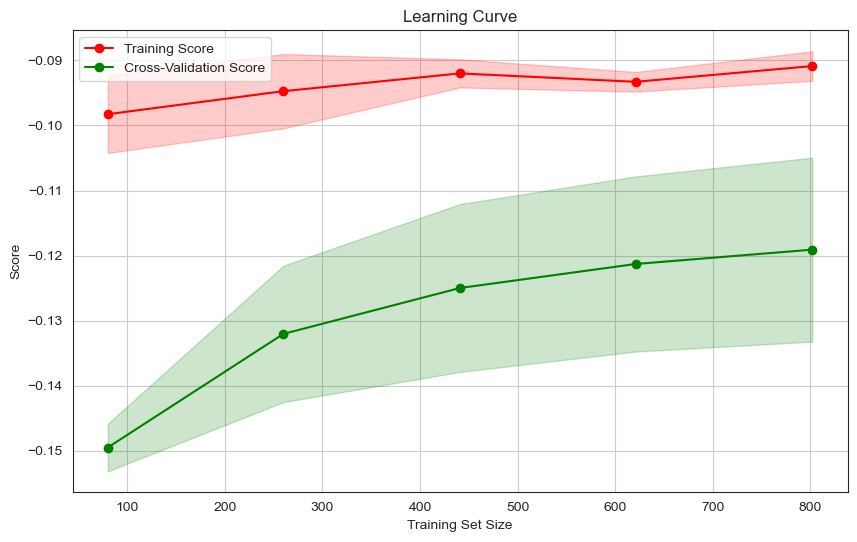

In [183]:
plot_learning_curve(pipe_svr_ts, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

### With Transformer + Scaler + PCA

In [184]:
#define ML models
svr = SVR()

#define the pipeline that includes the preprocessor and the estimator
pipe_svr_ts_pca = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=True,
                           pca_n_components=10, model_name="svr", model=svr)

# Define the hyperparameters to search over
param_grid_svr = {'svr__C': [10**i for i in range(-3, 4)],
                  'svr__gamma': [10**i for i in range(-3, 4)],
                  'svr__kernel': ['rbf', 'poly']
}

# Perform grid search with 5-fold cross-validation
grid_search_svr_ts_pca = GridSearchCV(pipe_svr_ts_pca, param_grid_svr, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_svr_ts_pca.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nom',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('label',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['MSSubClass',
                                                                          'MSZoning',
                                                                          'Alley',
                                                                          'LotShape',
                                                                          'LandContour',
                                                                          'LotConfig',
                                                                          'LandSlope',
                                                                          'Neighborhood',
                                                                          'Condition1',
                                                                          'BldgType',
                                                                          'HouseStyle...
                                                                          'EnclosedPorch',
                                                                          'ScreenPorch',
                                                                          'BsmtFullBath',
                                                                          'BsmtHalfBath',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'KitchenAbvGr',
                                                                          'TotRmsAbvGrd',
                                                                          'Fireplaces',
                                                                          'GarageCars',
                                                                          'MoSold',
                                                                          'YrSold'])])),
                                       ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'svr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'svr__kernel': ['rbf', 'poly']},
             scoring='r2', verbose=1)

In [185]:
evaluation_metrics = {}

# Print the best hyperparameters and the corresponding score
std_svr_ts_pca = round(grid_search_svr_ts_pca.cv_results_["std_test_score"][grid_search_svr_ts_pca.best_index_], 4)
print("Best hyperparameters: ", grid_search_svr_ts_pca.best_params_)
print("Best score: ", grid_search_svr_ts_pca.best_score_, f" ({std_svr_ts_pca})")

# valuate model on validation data
r2_train_svr_ts_pca = grid_search_svr_ts_pca.score(X_val, y_val)

best_model_svr_ts_pca = grid_search_svr_ts_pca.best_estimator_
y_pred_val_svr_ts_pca = best_model_svr_ts_pca.predict(X_val)

# Compute the evaluation metrics
mae_svr_ts_pca, mse_svr_ts_pca, rmse_svr_ts_pca, r2_svr_ts_pca, rmsle_svr_ts_pca, mape_svr_ts_pca = evaluate_model(y_pred_val_svr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "svr_ts_pca"
evaluation_metrics['best_params_'] = grid_search_svr_ts_pca.best_params_
evaluation_metrics['MAE'] = f'{mae_svr_ts_pca:.6f}'
evaluation_metrics['MSE'] = f'{mse_svr_ts_pca:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_svr_ts_pca:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_svr_ts_pca:.6f}'
evaluation_metrics['R2'] = f'{r2_svr_ts_pca:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_svr_ts_pca:.6f}'
evaluation_metrics['MAPE'] = f'{mape_svr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

Best hyperparameters:  {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
Best score:  0.8833750478276841  (0.0157)
model: svr_ts_pca
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 15102.681756
MSE: 517955026.519114
RMSE: 22758.625321
R2_train: 0.891548
R2: 0.884866
RMSLE: 0.119808
MAPE: 8.858122


In [186]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_svr_ts_pca, mse_svr_ts_pca, rmse_svr_ts_pca, r2_svr_ts_pca, rmsle_svr_ts_pca, mape_svr_ts_pca = evaluate_model_log(y_pred_val_svr_ts_pca, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "svr_ts_pca"
evaluation_metrics_log['best_params_'] = grid_search_svr_ts_pca.best_params_
evaluation_metrics_log['MAE'] = f'{mae_svr_ts_pca:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_svr_ts_pca:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_svr_ts_pca:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_svr_ts_pca:.6f}'
evaluation_metrics_log['R2'] = f'{r2_svr_ts_pca:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_svr_ts_pca:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_svr_ts_pca:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: svr_ts_pca
best_params_: {'svr__C': 1, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MAE: 0.087165
MSE: 0.014354
RMSE: 0.119808
R2_train: 0.891548
R2: 0.891548
RMSLE: 0.009244
MAPE: 0.728704


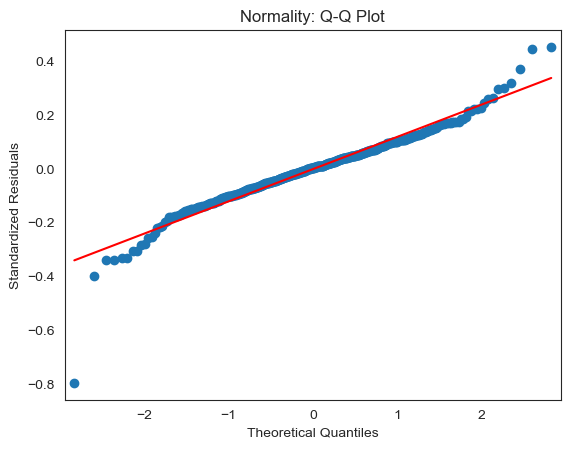

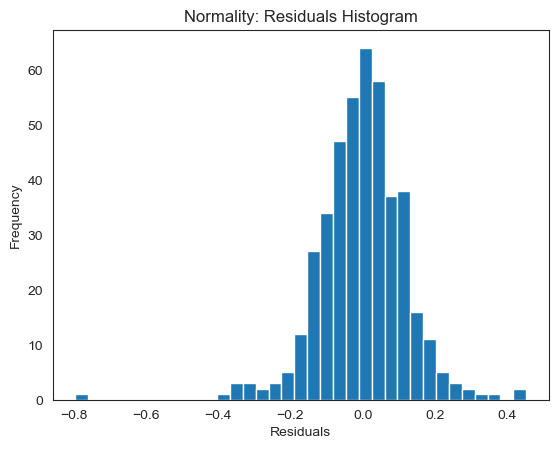

Shapiro-Wilk Test:
Test Statistic: 0.9513916969299316
p-value: 1.0551490237098449e-10
The residuals do not appear to be normally distributed (reject H0)


In [187]:
residual_plot(y_val, y_pred_val_svr_ts_pca, r2_train=r2_train_svr_ts_pca, r2_test=r2_svr_ts_pca)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

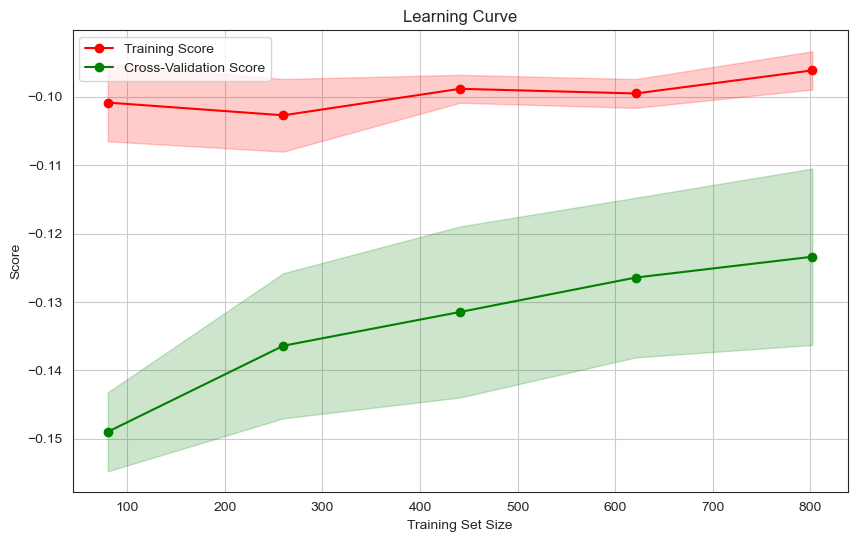

In [188]:
plot_learning_curve(pipe_svr_ts_pca, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Choose 5 Models for Ensemble Learning Model

voting, stacked, etc.

models:

- ElasticNet with transformed features (enet_tf)
- Lasso with transformed features (lasso_tf)
- Support Vector Regression with transformed and scaled features (svr_ts)
- Gradient Boosting with transformed and scaled features (gb_ts)

In [192]:
model1 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="enet", 
                         model=ElasticNet(
                             alpha=grid_search_enet_tf.best_params_["enet__alpha"],
                             l1_ratio=grid_search_enet_tf.best_params_["enet__l1_ratio"]
                         )
                        )

# svr_ts
model2 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                            use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="svr", 
                         model=SVR(
                             C = grid_search_svr_ts.best_params_["svr__C"],
                             gamma = grid_search_svr_ts.best_params_["svr__gamma"],
                             kernel = grid_search_svr_ts.best_params_["svr__kernel"]
                         )
                        )

# gb_ts
model3 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=True,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="gb", 
                         model=GradientBoostingRegressor(
                             subsample = random_search_gb_ts.best_params_["gb__subsample"],
#                              reg_lambda = random_search_gb_ts.best_params_["gb__reg_lambda"],
#                              reg_alpha = random_search_gb_ts.best_params_["gb__reg_alpha"],
                             n_estimators = random_search_gb_ts.best_params_["gb__n_estimators"],
                             min_samples_split= random_search_gb_ts.best_params_["gb__min_samples_split"],
                             min_samples_leaf= random_search_gb_ts.best_params_["gb__min_samples_leaf"],
                             max_depth = random_search_gb_ts.best_params_["gb__max_depth"],
                             learning_rate = random_search_gb_ts.best_params_["gb__learning_rate"],
#                              gamma = random_search_gb_ts.best_params_["gb__gamma"],
#                              colsample_bytree = random_search_gb_ts.best_params_["gb__colsample_bytree"],
                             loss= random_search_gb_ts.best_params_["gb__loss"]
                         )
                        )

# lasso_tf
model4 = create_pipeline(numeric_vars, nominal_vars, ordinal_vars,
                           use_transformer=True, use_scaler=False,
                           scaler_method='robust', include_pca=False,
                           pca_n_components=10, model_name="lasso", 
                         model=Lasso(alpha=grid_search_lasso_tf.best_params_["lasso__alpha"])
                        )


CPU times: total: 0 ns
Wall time: 0 ns


## Voting Regressor

In [193]:
from sklearn.ensemble import VotingRegressor

In [194]:
%%time
# Create the voting Regressor within a Pipeline
pipe_voting_reg = make_pipeline(
    VotingRegressor(estimators=[('enet', model1), 
                                ('svr', model2), 
                                ('gb', model3),
                                ('lasso', model4)
                               ])
)

# Fit the voting Regressor Pipeline to your training data
# voting_regressor_pipeline.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_voting_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.11 +/- 0.01
CPU times: total: 19.5 s
Wall time: 53.4 s


29468
29602
28985


In [195]:
evaluation_metrics = {}

pipe_voting_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
voting_reg_pred = pipe_voting_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_voting_reg = pipe_voting_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_voting_reg, mse_voting_reg, rmse_voting_reg, r2_voting_reg, rmsle_voting_reg, mape_voting_reg = evaluate_model(voting_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "voting_reg"
evaluation_metrics['MAE'] = f'{mae_voting_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_voting_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_voting_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_voting_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_voting_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_voting_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_voting_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_reg
MAE: 12710.501150
MSE: 411117241.064840
RMSE: 20276.026264
R2_train: 0.958025
R2: 0.908614
RMSLE: 0.107338
MAPE: 7.518837


In [196]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_voting_reg, mse_voting_reg, rmse_voting_reg, r2_voting_reg, rmsle_voting_reg, mape_voting_reg = evaluate_model_log(voting_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "voting_reg"
evaluation_metrics_log['MAE'] = f'{mae_voting_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_voting_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_voting_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_voting_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_voting_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_voting_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_voting_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: voting_reg
MAE: 0.073812
MSE: 0.011521
RMSE: 0.107338
R2_train: 0.958025
R2: 0.912950
RMSLE: 0.008288
MAPE: 0.617488


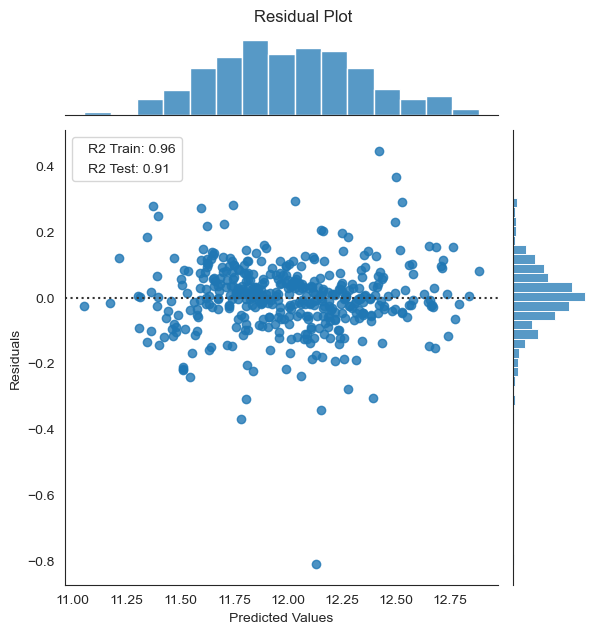

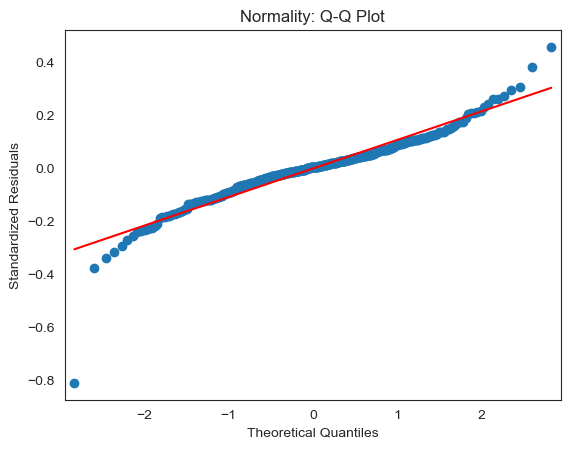

Shapiro-Wilk Test:
Test Statistic: 0.9234418869018555
p-value: 5.122474777794102e-14
The residuals do not appear to be normally distributed (reject H0)


In [197]:
residual_plot(y_val, voting_reg_pred, r2_train=r2_train_voting_reg, r2_test=r2_voting_reg)

In [198]:
plot_learning_curve(pipe_voting_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

## Stacking Regressor

In [199]:
from sklearn.ensemble import StackingRegressor

In [204]:
%%time

# Create the stacking Regressor within a Pipeline
pipe_stacking_reg = make_pipeline(
    StackingRegressor(estimators=[('enet', model1), 
                                ('svr', model2), 
                                ('xgb', model3),
                                ('lasso', model4)
                                 ],
                      final_estimator=LinearRegression(), n_jobs=-1)
)

# Fit the stacking Regressor Pipeline to your training data
# pipe_stacking_reg.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_stacking_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

RMSE: 0.12 +/- 0.01
CPU times: total: 3.06 s
Wall time: 3min 38s


In [205]:
evaluation_metrics = {}

pipe_stacking_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
stacking_reg = pipe_stacking_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_stacking_reg = pipe_stacking_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_stacking_reg, mse_stacking_reg, rmse_stacking_reg, r2_stacking_reg, rmsle_stacking_reg, mape_stacking_reg = evaluate_model(stacking_reg, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "stacking_reg"
evaluation_metrics['MAE'] = f'{mae_stacking_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_stacking_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_stacking_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_stacking_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_stacking_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_stacking_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_stacking_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

model: stacking_reg
MAE: 12851.201725
MSE: 417274547.697075
RMSE: 20427.299080
R2_train: 0.976360
R2: 0.907246
RMSLE: 0.109091
MAPE: 7.660141


model: stacking_reg
MAE: 15470.606441
MSE: 649020026.598092
RMSE: 25475.871459
R2_train: 0.953706
R2: 0.906992
RMSLE: 0.127869
MAPE: 9.107975

In [206]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_stacking_reg, mse_stacking_reg, rmse_stacking_reg, r2_stacking_reg, rmsle_stacking_reg, mape_stacking_reg = evaluate_model_log(stacking_reg, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "stacking_reg"
evaluation_metrics_log['MAE'] = f'{mae_stacking_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_stacking_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_stacking_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_stacking_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_stacking_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_stacking_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_stacking_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: stacking_reg
MAE: 0.075064
MSE: 0.011901
RMSE: 0.109091
R2_train: 0.976360
R2: 0.910083
RMSLE: 0.008428
MAPE: 0.628397


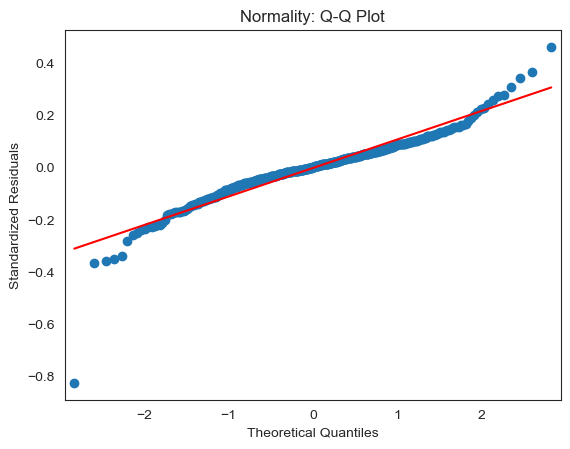

Shapiro-Wilk Test:
Test Statistic: 0.9180203676223755
p-value: 1.4684725603477528e-14
The residuals do not appear to be normally distributed (reject H0)


In [207]:
residual_plot(y_val, stacking_reg, r2_train=r2_train_stacking_reg, r2_test=r2_stacking_reg)

In [208]:
plot_learning_curve(pipe_stacking_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Simple Averaging Model

In [209]:
class SimpleAveragingModel(BaseEstimator, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        return np.mean(predictions, axis=1)

In [210]:
%%time

# Create the list of models
models = [model1, model2, model3, model4]

# Create the Simple Averaging Model pipeline
pipe_simple_avg_model = Pipeline([
    ('averaging', SimpleAveragingModel(models))
])

# Fit the stacking Regressor Pipeline to your training data
# pipe_simple_avg_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_simple_avg_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.11 +/- 0.01
CPU times: total: 27.2 s
Wall time: 33.5 s


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [211]:
evaluation_metrics = {}

pipe_simple_avg_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
simple_avg_model_pred = pipe_simple_avg_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_simple_avg_model = r2_score(y_train_val, pipe_simple_avg_model.predict(X_train_val))

# Compute the evaluation metrics
mae_simple_avg_model, mse_simple_avg_model, rmse_simple_avg_model, r2_simple_avg_model, rmsle_simple_avg_model, mape_simple_avg_model = evaluate_model(simple_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "simple_avg_model"
evaluation_metrics['MAE'] = f'{mae_simple_avg_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_simple_avg_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_simple_avg_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_simple_avg_model:.6f}'
evaluation_metrics['R2'] = f'{r2_simple_avg_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_simple_avg_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_simple_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: simple_avg_model
MAE: 12665.449122
MSE: 409625997.835917
RMSE: 20239.219299
R2_train: 0.957725
R2: 0.908946
RMSLE: 0.107227
MAPE: 7.495954


In [212]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_simple_avg_model, mse_simple_avg_model, rmse_simple_avg_model, r2_simple_avg_model, rmsle_simple_avg_model, mape_simple_avg_model = evaluate_model_log(simple_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "simple_avg_model"
evaluation_metrics_log['MAE'] = f'{mae_simple_avg_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_simple_avg_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_simple_avg_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_simple_avg_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_simple_avg_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_simple_avg_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_simple_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: simple_avg_model
MAE: 0.073565
MSE: 0.011498
RMSE: 0.107227
R2_train: 0.957725
R2: 0.913130
RMSLE: 0.008280
MAPE: 0.615438


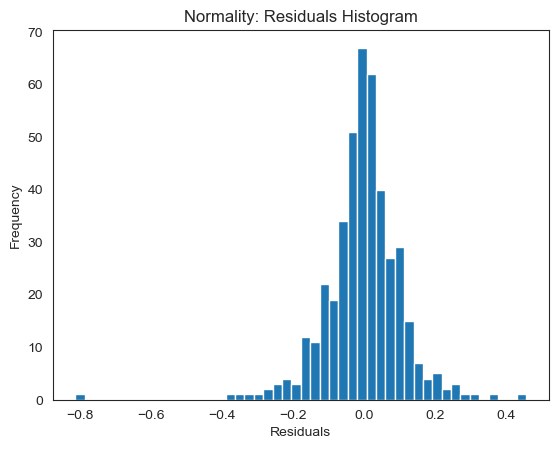

Shapiro-Wilk Test:
Test Statistic: 0.9219738841056824
p-value: 3.630746758472893e-14
The residuals do not appear to be normally distributed (reject H0)


In [216]:
residual_plot(y_val, simple_avg_model_pred, r2_train=r2_train_simple_avg_model, r2_test=r2_simple_avg_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

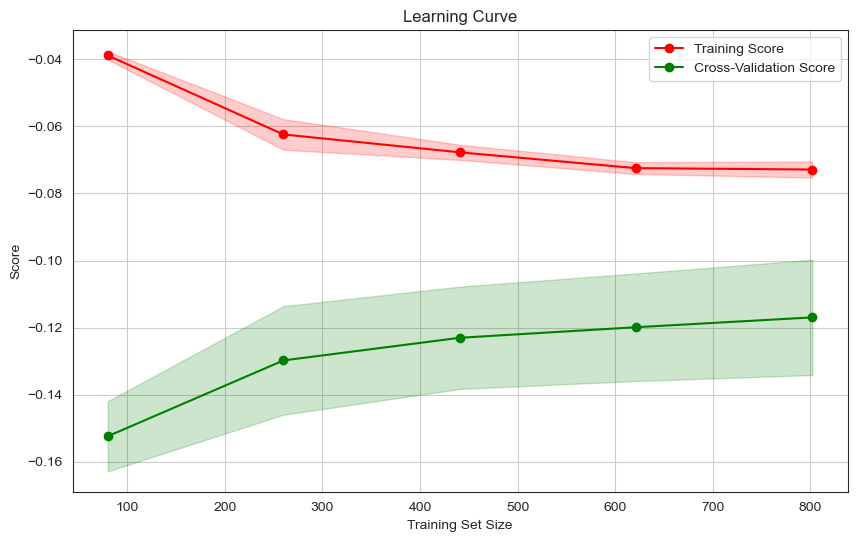

In [217]:
plot_learning_curve(pipe_simple_avg_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Voting Regressor with Weight

In [218]:
# Create the voting Regressor within a Pipeline
weights = [0.4, 0.1, 0.2, 0.3] 

pipe_voting_weight_reg = make_pipeline(
    VotingRegressor(estimators=[('enet', model1), 
                                ('svr', model2), 
                                ('gb', model3),
                                ('lasso', model4)
                               ], weights=weights)
)

# Fit the voting Regressor with Weight Pipeline to your training data
# voting_weight_regressor_pipeline.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_voting_weight_reg, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.11 +/- 0.01


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [219]:
evaluation_metrics = {}

pipe_voting_weight_reg.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
voting_weight_reg_pred = pipe_voting_weight_reg.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_voting_weight_reg = pipe_voting_weight_reg.score(X_train_val, y_train_val)

# Compute the evaluation metrics
mae_voting_weight_reg, mse_voting_weight_reg, rmse_voting_weight_reg, r2_voting_weight_reg, rmsle_voting_weight_reg, mape_voting_weight_reg = evaluate_model(voting_weight_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "voting_weight_reg"
evaluation_metrics['MAE'] = f'{mae_voting_weight_reg:.6f}'
evaluation_metrics['MSE'] = f'{mse_voting_weight_reg:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_voting_weight_reg:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_voting_weight_reg:.6f}'
evaluation_metrics['R2'] = f'{r2_voting_weight_reg:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_voting_weight_reg:.6f}'
evaluation_metrics['MAPE'] = f'{mape_voting_weight_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: voting_weight_reg
MAE: 12925.510936
MSE: 413170920.451410
RMSE: 20326.606221
R2_train: 0.945845
R2: 0.908158
RMSLE: 0.107715
MAPE: 7.603119


In [220]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_voting_weight_reg, mse_voting_weight_reg, rmse_voting_weight_reg, r2_voting_weight_reg, rmsle_voting_weight_reg, mape_voting_weight_reg = evaluate_model_log(voting_weight_reg_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "voting_weight_reg"
evaluation_metrics_log['MAE'] = f'{mae_voting_weight_reg:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_voting_weight_reg:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_voting_weight_reg:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_voting_weight_reg:.6f}'
evaluation_metrics_log['R2'] = f'{r2_voting_weight_reg:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_voting_weight_reg:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_voting_weight_reg:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: voting_weight_reg
MAE: 0.074731
MSE: 0.011603
RMSE: 0.107715
R2_train: 0.945845
R2: 0.912337
RMSLE: 0.008316
MAPE: 0.624802


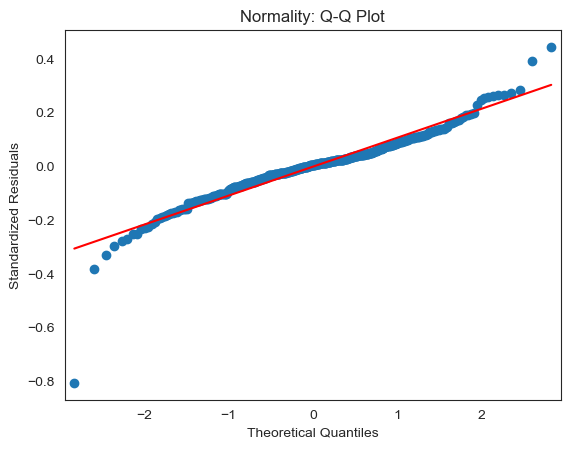

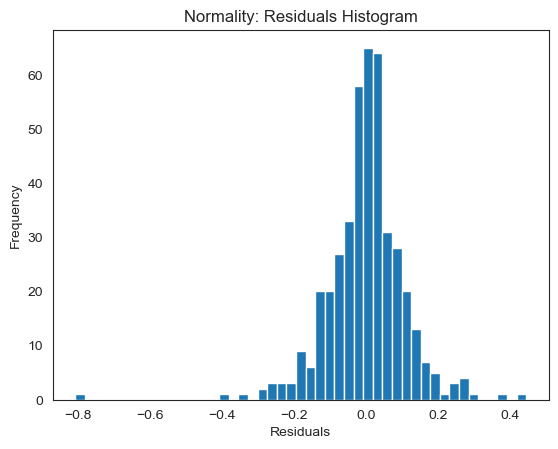

Shapiro-Wilk Test:
Test Statistic: 0.9274358749389648
p-value: 1.337951559439443e-13
The residuals do not appear to be normally distributed (reject H0)


In [221]:
residual_plot(y_val, voting_weight_reg_pred, r2_train=r2_train_voting_weight_reg, r2_test=r2_voting_weight_reg)

In [222]:
plot_learning_curve(pipe_voting_weight_reg, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

## Weighted Average Model

In [225]:
class WeightedAveragingModel:
    def __init__(self, models, weights):
        self.models = models
        self.weights = weights
    
    def fit(self, X, y):
        for model in self.models:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models])
        weighted_predictions = np.average(predictions, axis=1, weights=self.weights)
        return weighted_predictions

In [235]:
%%time

# Create the list of models
models = [model1, model2, model3, model4]

# Define the weights for each model
weights = [0.35, 0.1, 0.2, 0.35] 

# Create the weighted Averaging Model pipeline
pipe_weighted_avg_model = Pipeline([
    ('averaging', WeightedAveragingModel(models, weights))
])

# Fit the stacking Regressor Pipeline to your training data
# pipe_weighted_avg_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_weighted_avg_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.11 +/- 0.01
CPU times: total: 26.8 s
Wall time: 34.1 s


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [236]:
evaluation_metrics = {}

pipe_weighted_avg_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
weighted_avg_model_pred = pipe_weighted_avg_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_weighted_avg_model = r2_score(y_train_val, pipe_weighted_avg_model.predict(X_train_val))

# Compute the evaluation metrics
mae_weighted_avg_model, mse_weighted_avg_model, rmse_weighted_avg_model, r2_weighted_avg_model, rmsle_weighted_avg_model, mape_weighted_avg_model = evaluate_model(weighted_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "weighted_avg_model"
evaluation_metrics['MAE'] = f'{mae_weighted_avg_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_weighted_avg_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_weighted_avg_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_weighted_avg_model:.6f}'
evaluation_metrics['R2'] = f'{r2_weighted_avg_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_weighted_avg_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_weighted_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: weighted_avg_model
MAE: 12911.003943
MSE: 412891844.276309
RMSE: 20319.740261
R2_train: 0.945923
R2: 0.908220
RMSLE: 0.107598
MAPE: 7.599444


In [237]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_weighted_avg_model, mse_weighted_avg_model, rmse_weighted_avg_model, r2_weighted_avg_model, rmsle_weighted_avg_model, mape_weighted_avg_model = evaluate_model_log(weighted_avg_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "weighted_avg_model"
evaluation_metrics_log['MAE'] = f'{mae_weighted_avg_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_weighted_avg_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_weighted_avg_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_weighted_avg_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_weighted_avg_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_weighted_avg_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_weighted_avg_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: weighted_avg_model
MAE: 0.074689
MSE: 0.011577
RMSE: 0.107598
R2_train: 0.945923
R2: 0.912528
RMSLE: 0.008307
MAPE: 0.624476


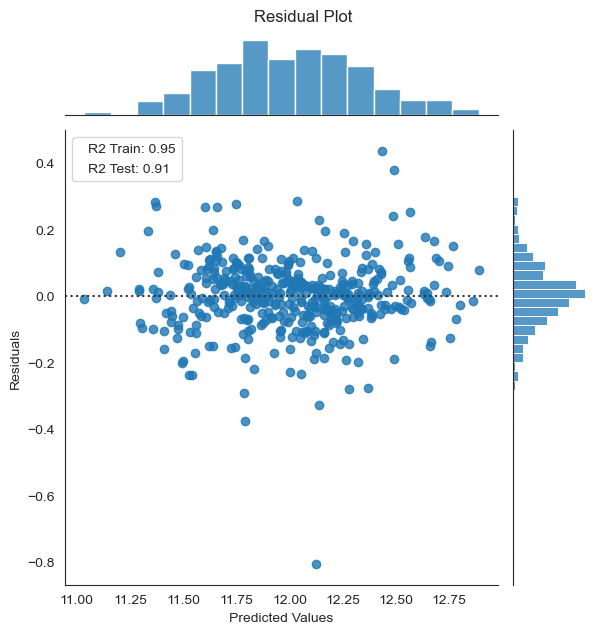

Shapiro-Wilk Test:
Test Statistic: 0.9279087781906128
p-value: 1.502609885475903e-13
The residuals do not appear to be normally distributed (reject H0)


In [238]:
residual_plot(y_val, weighted_avg_model_pred, r2_train=r2_train_weighted_avg_model, r2_test=r2_weighted_avg_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

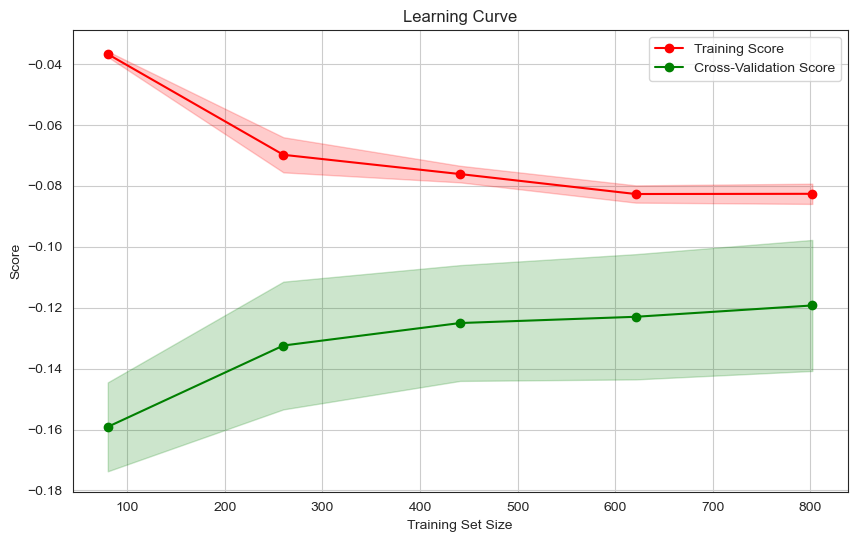

In [239]:
plot_learning_curve(pipe_weighted_avg_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

## Blending Model

In [240]:
class BlendingEnsembleModel(BaseEstimator):
    def __init__(self, models, meta_model):
        self.models = models
        self.meta_model = meta_model
    
    def fit(self, X, y):
        # Split the data into training, validation, and test sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Fit the individual base models on the training set
        for model in self.models:
            model.fit(X_train, y_train)
        
        # Generate predictions on the validation set using the base models
        meta_features = []
        for model in self.models:
            predictions = model.predict(X_val)
            meta_features.append(predictions)
        
        # Prepare the validation set predictions as features for the meta-model
        meta_features = np.column_stack(meta_features)
        
        # Train the meta-model on the validation set predictions
        self.meta_model.fit(meta_features, y_val)
        
        return self
    
    def predict(self, X):
        # Generate predictions on the test set using the base models
        meta_features = []
        for model in self.models:
            predictions = model.predict(X)
            meta_features.append(predictions)
        
        # Prepare the test set predictions as features for the meta-model
        meta_features = np.column_stack(meta_features)
        
        # Generate final predictions on the test set using the meta-model
        final_predictions = self.meta_model.predict(meta_features)
        
        return final_predictions
    
    def get_params(self, deep=True):
        return {'models': self.models, 'meta_model': self.meta_model}
    
    def set_params(self, **params):
        if 'models' in params:
            self.models = params['models']
        if 'meta_model' in params:
            self.meta_model = params['meta_model']
        return self


In [241]:
%%time

models=[model1, model2, model3, model4]

# Create an instance of the BlendingEnsembleModel
pipe_blending_model = BlendingEnsembleModel(models=models, 
                                       meta_model=LinearRegression())

# Fit the blending ensemble model Pipeline to your training data
# pipe_blending_model.fit(X_train, y_train)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
cv_scores = cross_val_score(pipe_blending_model, X_train_val, y_train_val, cv=kf, scoring='neg_mean_squared_error')

# Compute the root mean squared error
rmse_scores = np.sqrt(-cv_scores)

# Print the mean and standard deviation of the RMSE scores
print('RMSE: {:.2f} +/- {:.2f}'.format(rmse_scores.mean(), rmse_scores.std()))

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

RMSE: 0.12 +/- 0.02
CPU times: total: 21.1 s
Wall time: 30.2 s


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



In [242]:
evaluation_metrics = {}

pipe_blending_model.fit(X_train_val, y_train_val)  # Fit the pipeline on the training and validation data
blending_model_pred = pipe_blending_model.predict(X_val)  # Predict the target values for the test data

# Calculate R2 score for the training set
r2_train_blending_model = r2_score(y_train_val, pipe_blending_model.predict(X_train_val))

# Compute the evaluation metrics
mae_blending_model, mse_blending_model, rmse_blending_model, r2_blending_model, rmsle_blending_model, mape_blending_model = evaluate_model(blending_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics['model'] = "blending_model"
evaluation_metrics['MAE'] = f'{mae_blending_model:.6f}'
evaluation_metrics['MSE'] = f'{mse_blending_model:.6f}'
evaluation_metrics['RMSE'] = f'{rmse_blending_model:.6f}'
evaluation_metrics['R2_train'] = f'{r2_train_blending_model:.6f}'
evaluation_metrics['R2'] = f'{r2_blending_model:.6f}'
evaluation_metrics['RMSLE'] = f'{rmsle_blending_model:.6f}'
evaluation_metrics['MAPE'] = f'{mape_blending_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics.items():
    print(metric + ':', value)

evaluation_metrics_models.append(evaluation_metrics)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply



model: blending_model
MAE: 13505.682034
MSE: 423728906.242163
RMSE: 20584.676491
R2_train: 0.950914
R2: 0.905811
RMSLE: 0.111742
MAPE: 8.000426


In [243]:
evaluation_metrics_log = {}

# Compute the evaluation metrics
mae_blending_model, mse_blending_model, rmse_blending_model, r2_blending_model, rmsle_blending_model, mape_blending_model = evaluate_model_log(blending_model_pred, y_val)

# Store the evaluation metrics in a dictionary
evaluation_metrics_log['model'] = "blending_model"
evaluation_metrics_log['MAE'] = f'{mae_blending_model:.6f}'
evaluation_metrics_log['MSE'] = f'{mse_blending_model:.6f}'
evaluation_metrics_log['RMSE'] = f'{rmse_blending_model:.6f}'
evaluation_metrics_log['R2_train'] = f'{r2_train_blending_model:.6f}'
evaluation_metrics_log['R2'] = f'{r2_blending_model:.6f}'
evaluation_metrics_log['RMSLE'] = f'{rmsle_blending_model:.6f}'
evaluation_metrics_log['MAPE'] = f'{mape_blending_model:.6f}'

# Print the evaluation metrics
for metric, value in evaluation_metrics_log.items():
    print(metric + ':', value)

evaluation_metrics_log_models.append(evaluation_metrics_log)

model: blending_model
MAE: 0.078186
MSE: 0.012486
RMSE: 0.111742
R2_train: 0.950914
R2: 0.905660
RMSLE: 0.008632
MAPE: 0.653871


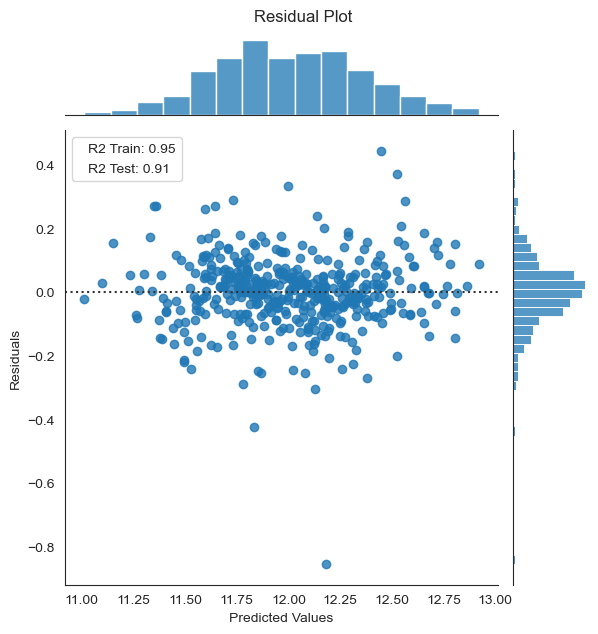

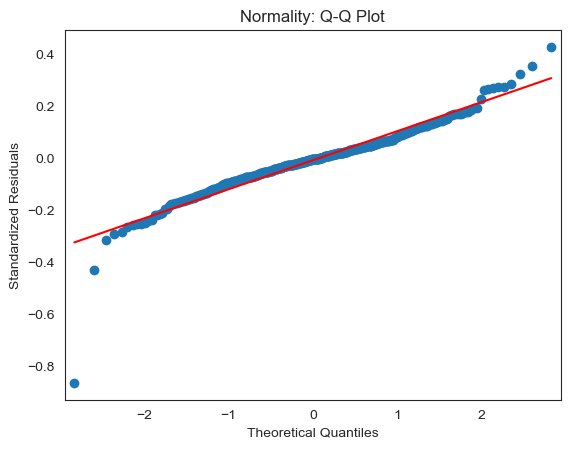

Shapiro-Wilk Test:
Test Statistic: 0.9285860657691956
p-value: 1.7759418610187316e-13
The residuals do not appear to be normally distributed (reject H0)


In [244]:
residual_plot(y_val, blending_model_pred, r2_train=r2_train_blending_model, r2_test=r2_blending_model)

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning:

overflow encountered in power

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning:

overflow encountered in reduce

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning:

overflow encountered in power

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:247: RuntimeWarning:

overflow encountered in reduce

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\e

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning:

overflow encountered in multiply

C:\Users\fahmi\anaconda3\envs\ml_p

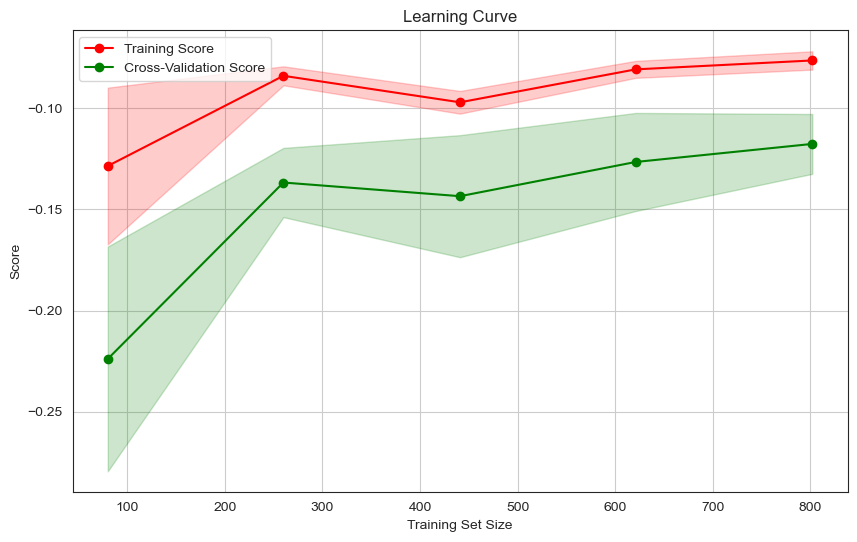

In [245]:
plot_learning_curve(pipe_blending_model, X_train_val, y_train_val, cv=5, scoring='neg_root_mean_squared_error')

# Comparison Model

. Here's a brief explanation of each metric:

- Mean Absolute Error (MAE): MAE represents the average absolute difference between the predicted values and the true values. It provides a measure of the average magnitude of errors without considering their direction. Lower values indicate better performance.

- Mean Squared Error (MSE): MSE calculates the average squared difference between the predicted values and the true values. It amplifies larger errors due to the squaring operation. Like MAE, lower values indicate better performance.

- Root Mean Squared Error (RMSE): RMSE is the square root of MSE and represents the average magnitude of the prediction errors in the same units as the target variable. It is commonly used as a more interpretable measure of the model's prediction error. Again, lower values indicate better performance.

- R2 (R-squared): R2 measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher values of R2 indicate better performance, with values close to 1 indicating that the model explains a large portion of the variance.

- R2_train: This is R2 calculated on the training data. It represents how well the model fits the training data and can be used to assess the model's training performance. It is important to also evaluate the model's performance on separate validation or test data to assess its generalization capability.

- RMSLE (Root Mean Squared Logarithmic Error): RMSLE is similar to RMSE, but it calculates the root mean squared logarithmic difference between the predicted and true values. It is commonly used when the target variable has a skewed distribution or when relative errors are more important than absolute errors.

- MAPE (Mean Absolute Percentage Error): MAPE measures the average percentage difference between the predicted and true values. It is commonly used when the relative errors are more important than absolute errors. Lower values of MAPE indicate better performance.

These metrics help assess different aspects of a regression model's performance, such as the average magnitude of errors, the proportion of explained variance, and the relative accuracy of predictions. The choice of which metrics to use depends on the specific problem, the nature of the target variable, and the evaluation criteria that are most relevant to your application.

In [246]:
models = pd.DataFrame(evaluation_metrics_models)
columns_to_convert = ['MAE', 'MSE', 'RMSE', 'R2_train', 'R2', 'RMSLE', 'MAPE']
models[columns_to_convert] = models[columns_to_convert].astype(float)
models.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

model           MAE           MSE          RMSE  R2_train  \
0     simple_avg_model  12665.449122  4.096260e+08  20239.219299  0.957725   
1           voting_reg  12710.501150  4.111172e+08  20276.026264  0.958025   
2   weighted_avg_model  12911.003943  4.128918e+08  20319.740261  0.945923   
3    voting_weight_reg  12925.510936  4.131709e+08  20326.606221  0.945845   
4         stacking_reg  12851.201725  4.172745e+08  20427.299080  0.976360   
5       blending_model  13505.682034  4.237289e+08  20584.676491  0.950914   
6              enet_tf  13701.440997  4.386189e+08  20943.229913  0.907622   
7             lasso_tf  13727.879111  4.397471e+08  20970.148758  0.907456   
8              enet_ts  13815.074762  4.420108e+08  21024.053062  0.906826   
9             lasso_ts  13860.472218  4.441667e+08  21075.262704  0.906458   
10               gb_ts  13677.415378  4.543319e+08  21315.062592  0.900214   
11              svr_ts  13978.658700  4.662472e+08  21592.758704  0.900329   
12              svr_tf  13995.118073  4.701098e+08  21682.015086  0.901213   
13              xgb_tf  14169.155026  4.757809e+08  21812.403070  0.893713   
14               gb_tf  14217.617840  5.006066e+08  22374.240632  0.895584   
15              xgb_ts  14728.387362  5.139188e+08  22669.777658  0.889779   
16          svr_ts_pca  15102.681756  5.179550e+08  22758.625321  0.891548   
17              krr_tf  15233.078584  5.294755e+08  23010.335021  0.881236   
18             lgbm_tf  14994.950322  5.331453e+08  23089.940085  0.889809   
19         enet_ts_pca  15394.908496  5.335195e+08  23098.042025  0.889526   
20              krr_ts  15298.736840  5.359195e+08  23149.935811  0.880450   
21        lasso_ts_pca  15432.840192  5.404479e+08  23247.534600  0.888485   
22             lgbm_ts  15035.035022  5.446566e+08  23337.879526  0.883735   
23           gb_ts_pca  16126.988280  5.832822e+08  24151.235798  0.873106   
24       linreg_ts_pca  16495.869703  5.898710e+08  24287.260001  0.915563   
25         lgbm_ts_pca  16342.667975  6.079819e+08  24657.289187  0.876518   
26          krr_ts_pca  16805.843808  6.115009e+08  24728.544099  0.868734   
27          xgb_ts_pca  15924.961382  6.182885e+08  24865.407309  0.868017   
28              knn_tf  18404.026267  7.882786e+08  28076.300291  0.841461   
29              knn_ts  18424.246417  8.066918e+08  28402.319968  0.840093   
30          knn_ts_pca  19779.245183  8.586863e+08  29303.349265  0.821288   

          R2     RMSLE       MAPE  \
0   0.908946  0.107227   7.495954   
1   0.908614  0.107338   7.518837   
2   0.908220  0.107598   7.599444   
3   0.908158  0.107715   7.603119   
4   0.907246  0.109091   7.660141   
5   0.905811  0.111742   8.000426   
6   0.902501  0.110574   8.004202   
7   0.902250  0.110673   8.018431   
8   0.901747  0.111049   8.063092   
9   0.901268  0.111268   8.087384   
10  0.899008  0.114922   8.213744   
11  0.896360  0.114856   8.285307   
12  0.895501  0.114345   8.267065   
13  0.894241  0.118607   8.416708   
14  0.888722  0.117558   8.382564   
15  0.885763  0.120782   8.711501   
16  0.884866  0.119808   8.858122   
17  0.882305  0.125375   8.992524   
18  0.881489  0.120765   8.711325   
19  0.881406  0.120920   8.858416   
20  0.880873  0.125789   9.011885   
21  0.879866  0.121488   8.915521   
22  0.878931  0.124049   8.849665   
23  0.870345  0.129595   9.503118   
24  0.868880  0.132573   9.597195   
25  0.864854  0.127841   9.427372   
26  0.864072  0.131809   9.735626   
27  0.862563  0.132168   9.225667   
28  0.824777  0.144856  10.630550   
29  0.820684  0.145479  10.579553   
30  0.809126  0.153796  11.562553   

                                         best_params_  
0                                                 NaN  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4                                                 NaN  

In [247]:
models_log = pd.DataFrame(evaluation_metrics_log_models)
columns_to_convert = ['MAE', 'MSE', 'RMSE', 'R2_train', 'R2', 'RMSLE', 'MAPE']
models_log[columns_to_convert] = models_log[columns_to_convert].astype(float)
models_log.sort_values(by="RMSE", ascending=True).reset_index(drop=True)

model           MAE           MSE          RMSE  R2_train  \
0     simple_avg_model  7.356500e-02  1.149800e-02  1.072270e-01  0.957725   
1           voting_reg  7.381200e-02  1.152100e-02  1.073380e-01  0.958025   
2   weighted_avg_model  7.468900e-02  1.157700e-02  1.075980e-01  0.945923   
3    voting_weight_reg  7.473100e-02  1.160300e-02  1.077150e-01  0.945845   
4         stacking_reg  7.506400e-02  1.190100e-02  1.090910e-01  0.976360   
5              enet_tf  7.890500e-02  1.222700e-02  1.105740e-01  0.907622   
6             lasso_tf  7.903200e-02  1.224900e-02  1.106730e-01  0.907456   
7              enet_ts  7.947000e-02  1.233200e-02  1.110490e-01  0.906826   
8       blending_model  7.818600e-02  1.248600e-02  1.117420e-01  0.950914   
9               svr_tf  8.099700e-02  1.307500e-02  1.143450e-01  0.901213   
10              svr_ts  8.128300e-02  1.319200e-02  1.148560e-01  0.900329   
11               gb_ts  8.066200e-02  1.320700e-02  1.149220e-01  0.900214   
12               gb_tf  8.249000e-02  1.382000e-02  1.175580e-01  0.895584   
13              xgb_tf  8.313100e-02  1.406800e-02  1.186070e-01  0.893713   
14          svr_ts_pca  8.716500e-02  1.435400e-02  1.198080e-01  0.891548   
15             lgbm_tf  8.578200e-02  1.458400e-02  1.207650e-01  0.889809   
16              xgb_ts  8.533600e-02  1.458800e-02  1.207820e-01  0.889779   
17         enet_ts_pca  8.761400e-02  1.462200e-02  1.209200e-01  0.889526   
18        lasso_ts_pca  8.806200e-02  1.475900e-02  1.214880e-01  0.888485   
19             lgbm_ts  8.701200e-02  1.538800e-02  1.240490e-01  0.883735   
20              krr_tf  8.929700e-02  1.571900e-02  1.253750e-01  0.881236   
21              krr_ts  8.953900e-02  1.582300e-02  1.257890e-01  0.880450   
22         lgbm_ts_pca  9.273400e-02  1.634300e-02  1.278410e-01  0.876518   
23           gb_ts_pca  9.371300e-02  1.679500e-02  1.295950e-01  0.873106   
24          krr_ts_pca  9.689200e-02  1.737400e-02  1.318090e-01  0.868734   
25          xgb_ts_pca  9.103300e-02  1.746800e-02  1.321680e-01  0.868017   
26       linreg_ts_pca  9.537400e-02  1.757600e-02  1.325730e-01  0.915563   
27              knn_tf  1.054250e-01  2.098300e-02  1.448560e-01  0.841461   
28              knn_ts  1.053520e-01  2.116400e-02  1.454790e-01  0.840093   
29          knn_ts_pca  1.138390e-01  2.365300e-02  1.537960e-01  0.821288   
30           linreg_tf  6.227533e+07  8.755224e+17  9.356935e+08  0.931809   
31           linreg_ts  3.968303e+08  1.947759e+19  4.413343e+09  0.931810   

              R2     RMSLE          MAPE  \
0   9.131300e-01  0.008280  6.154380e-01   
1   9.129500e-01  0.008288  6.174880e-01   
2   9.125280e-01  0.008307  6.244760e-01   
3   9.123370e-01  0.008316  6.248020e-01   
4   9.100830e-01  0.008428  6.283970e-01   
5   9.076220e-01  0.008532  6.592670e-01   
6   9.074560e-01  0.008539  6.603160e-01   
7   9.068260e-01  0.008569  6.639420e-01   
8   9.056600e-01  0.008632  6.538710e-01   
9   9.012130e-01  0.008826  6.775800e-01   
10  9.003290e-01  0.008869  6.800490e-01   
11  9.002140e-01  0.008891  6.757230e-01   
12  8.955840e-01  0.009069  6.898550e-01   
13  8.937130e-01  0.009164  6.953170e-01   
14  8.915480e-01  0.009244  7.287040e-01   
15  8.898090e-01  0.009312  7.165500e-01   
16  8.897790e-01  0.009330  7.138870e-01   
17  8.895260e-01  0.009325  7.311220e-01   
18  8.884850e-01  0.009370  7.352300e-01   
19  8.837350e-01  0.009577  7.275200e-01   
20  8.812360e-01  0.009704  7.467810e-01   
21  8.804500e-01  0.009734  7.486590e-01   
22  8.765180e-01  0.009851  7.740760e-01   
23  8.731060e-01  0.010009  7.836040e-01   
24  8.687340e-01  0.010184  8.091040e-01   
25  8.680170e-01  0.010208  7.603370e-01   
26  8.672070e-01  0.010267  7.965960e-01   
27  8.414610e-01  0.011169  8.803770e-01   
28  8.400930e-01  0.011210  8.793730e-01   
29  8.212880e-01  0.011862  9.512130e-01   
30 -6.615017e+18  1.834166  5.361211e+08   
31 -1.471631e+20  2.366922  3.4119

In [ ]:
models.info()

In [248]:
# models.to_csv("Comparison-model-result-with-takeout-outliers.csv", index=False)
# models_log.to_csv("Comparison-ylog-model-result-with-takeout-outliers.csv", index=False)